In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:03, 198.68it/s]
100%|██████████| 720/720 [00:08<00:00, 80.35it/s]
8280it [00:00, 212549.19it/s]
7920it [00:00, 205059.93it/s]
700it [00:03, 202.01it/s]
100%|██████████| 700/700 [00:08<00:00, 83.62it/s]
8280it [00:00, 222140.87it/s]
7920it [00:00, 70536.81it/s]
720it [00:01, 654.71it/s]
100%|██████████| 720/720 [00:09<00:00, 79.69it/s]
8280it [00:00, 229427.09it/s]
720it [00:03, 199.54it/s]
100%|██████████| 720/720 [00:09<00:00, 78.76it/s]
8280it [00:00, 216626.04it/s]
700it [00:03, 204.70it/s]
100%|██████████| 700/700 [00:08<00:00, 83.36it/s]
8280it [00:00, 63447.43it/s]
509it [00:02, 223.94it/s]
100%|██████████| 509/509 [00:02<00:00, 170.39it/s]
3664it [00:00, 226699.07it/s]
700it [00:04, 165.46it/s]
100%|██████████| 700/700 [00:08<00:00, 84.64it/s]
8280it [00:00, 223395.47it/s]
700it [00:04, 144.09it/s]
100%|██████████| 700/700 [00:08<00:00, 80.72it/s] 
8280it [00:00, 222325.74it/s]
710it [00:05, 120.92it/s]
100%|██████████| 710/710 [00:08<00:00, 82.06it/s]
8280it [00:00, 5

In [8]:
len(data_train), len(data_val), len(data_test)

(16560, 15840, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [13]:
# model_conf['device'] = 'cpu'

In [14]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [16]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.081821


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.025074
Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.020849


100%|██████████| 248/248 [00:19<00:00, 15.50it/s]


Mean val loss: 0.017971


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.019735


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.020394
EarlyStopping counter: 1 out of 5
Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.019615


100%|██████████| 248/248 [00:19<00:00, 12.82it/s]


Mean val loss: 0.015798


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.019322


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.016444
EarlyStopping counter: 1 out of 5
Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018935


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.016083
EarlyStopping counter: 2 out of 5
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018646


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.015053


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018501


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014629
Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018424


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.015244
EarlyStopping counter: 1 out of 5
Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.0183


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014732
EarlyStopping counter: 2 out of 5
Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018109


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014679
EarlyStopping counter: 3 out of 5
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.018139


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01476
EarlyStopping counter: 4 out of 5
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.01789


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.014347


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017826


100%|██████████| 248/248 [00:19<00:00, 12.80it/s]


Mean val loss: 0.014354


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017818


100%|██████████| 248/248 [00:19<00:00, 12.76it/s]


Mean val loss: 0.013891


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.01767


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014546
EarlyStopping counter: 1 out of 5
Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017646


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.013946
EarlyStopping counter: 2 out of 5
Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.01751


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014331
EarlyStopping counter: 3 out of 5
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017627


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.012569


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017182


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.013067
EarlyStopping counter: 1 out of 5
Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017403


100%|██████████| 248/248 [00:19<00:00, 12.81it/s]


Mean val loss: 0.012355


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017197


100%|██████████| 248/248 [00:19<00:00, 12.77it/s]


Mean val loss: 0.012354


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017378
Epoch    22: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014625
EarlyStopping counter: 1 out of 5
Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017047


100%|██████████| 248/248 [00:19<00:00, 12.77it/s]


Mean val loss: 0.011946


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017265


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.013916
EarlyStopping counter: 1 out of 5
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017179


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.012499
EarlyStopping counter: 2 out of 5
Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017025


100%|██████████| 248/248 [00:19<00:00, 12.79it/s]


Mean val loss: 0.011441


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.017039


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.012236
EarlyStopping counter: 1 out of 5
Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016925


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011825
EarlyStopping counter: 2 out of 5
Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016843


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011944
EarlyStopping counter: 3 out of 5
Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016767


100%|██████████| 248/248 [00:19<00:00, 15.47it/s]


Mean val loss: 0.011153


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016895


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01134
EarlyStopping counter: 1 out of 5
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016819


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011371
EarlyStopping counter: 2 out of 5
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016884
Epoch    33: reducing learning rate of group 0 to 5.6250e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011204
EarlyStopping counter: 3 out of 5
Epoch 34...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.01685


100%|██████████| 248/248 [00:19<00:00, 12.73it/s]


Mean val loss: 0.010923


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 35...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016761


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011125
EarlyStopping counter: 1 out of 5
Epoch 36...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016717


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01171
EarlyStopping counter: 2 out of 5
Epoch 37...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016815


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01103
EarlyStopping counter: 3 out of 5
Epoch 38...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016612


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011419
EarlyStopping counter: 4 out of 5
Epoch 39...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.016639


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011287
EarlyStopping counter: 5 out of 5


100%|██████████| 259/259 [02:41<00:00,  1.92it/s]


## Dump experiment results

In [17]:
import pickle
import json

In [18]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [19]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [20]:
# model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [20]:
from itertools import chain

In [21]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [22]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

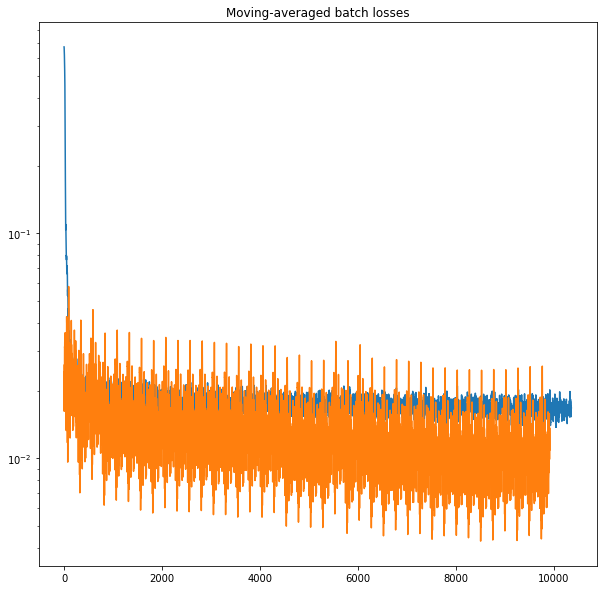

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')
plt.yscale('log')
# plt.ylim([1e-2, 1])
plt.show()

In [24]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

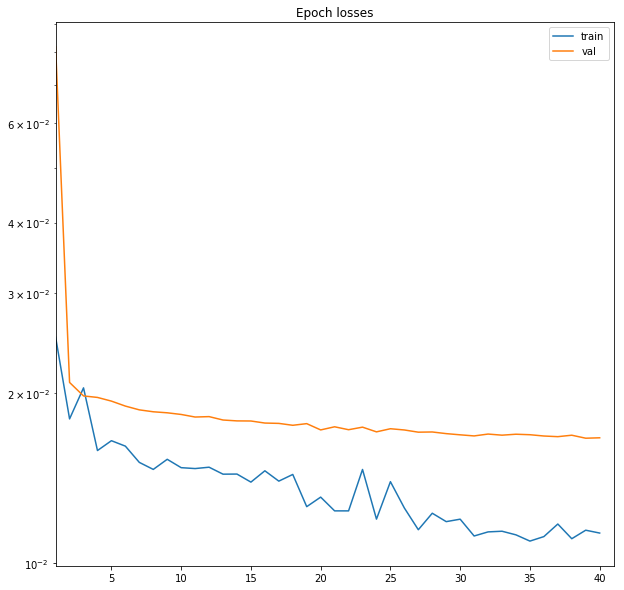

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [26]:
import os

In [30]:
import torch

In [27]:
from visualization_utils import output_to_binary, plot_sample

In [31]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

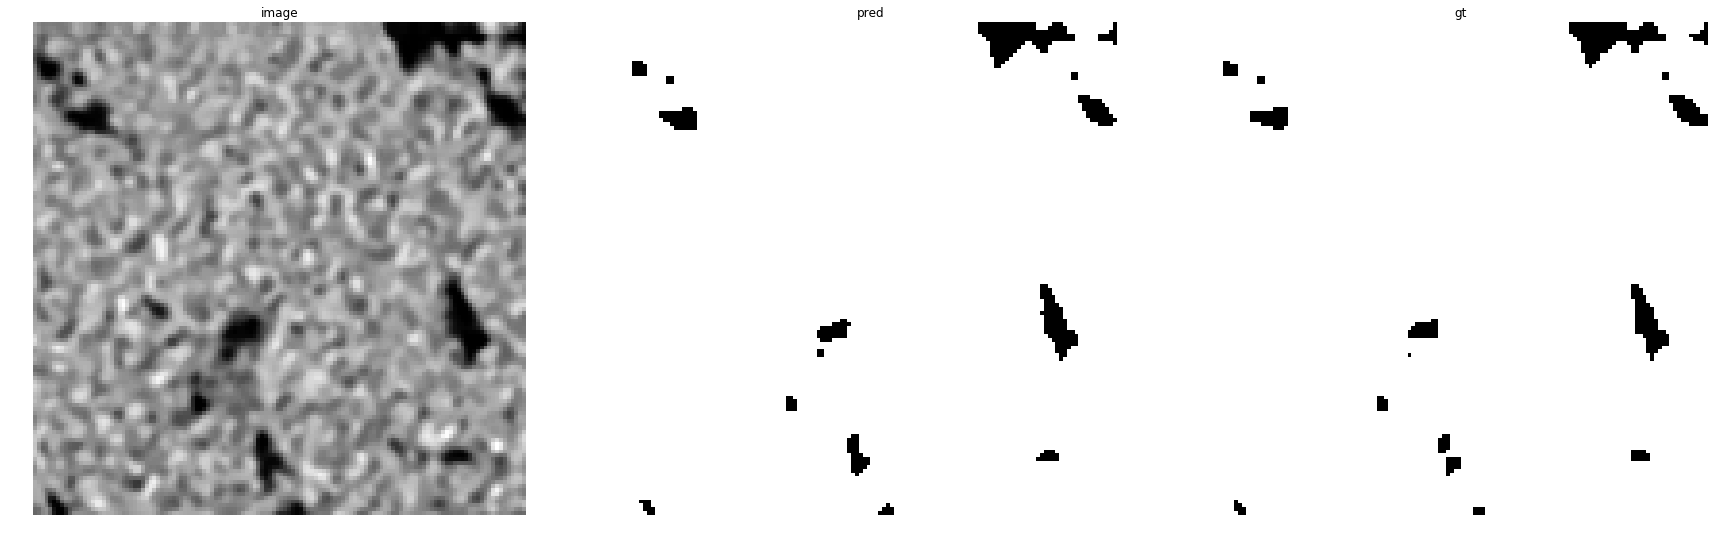

accuracy    : 0.99737548828125
precision   : 0.9994336416839721
recall      : 0.9978637848705705
f1          : 0.9986480963309964
pr_auc      : 0.9999962698202034
iou         : 0.9972998430141288


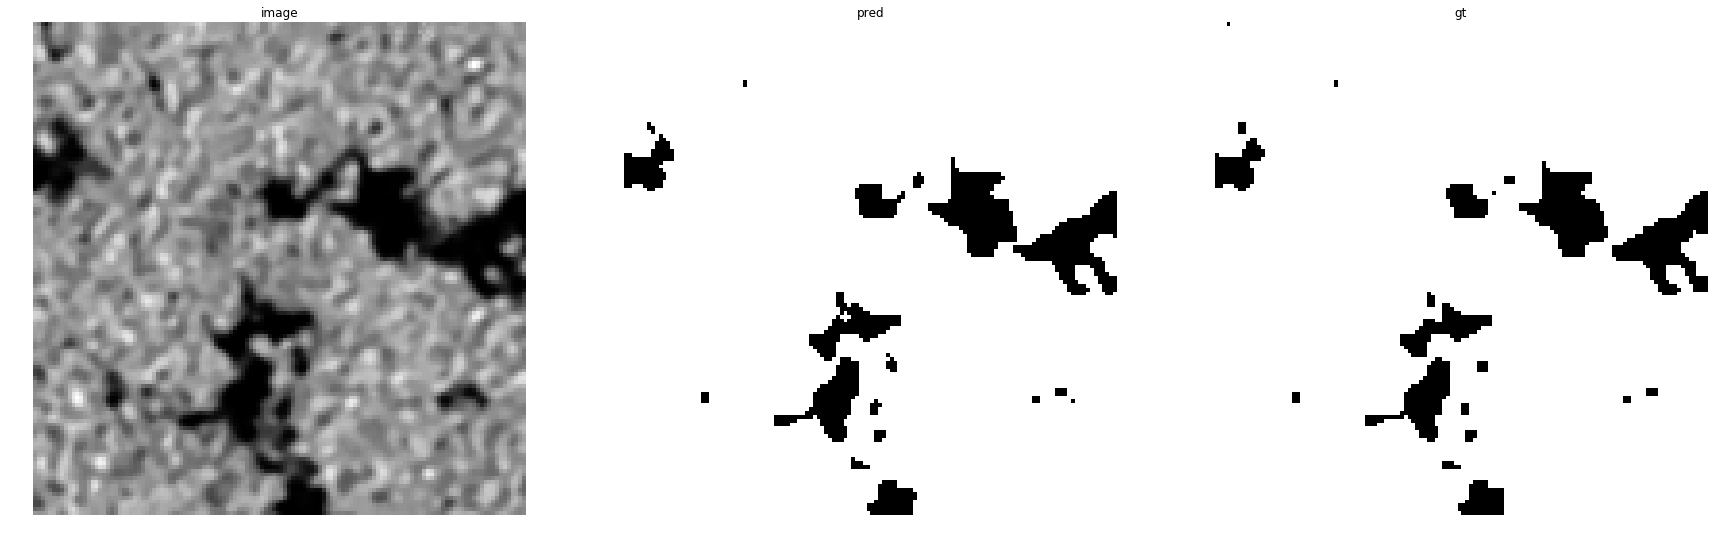

accuracy    : 0.99542236328125
precision   : 0.9994699880747316
recall      : 0.9955784333135352
f1          : 0.9975204152477931
pr_auc      : 0.9999857426042023
iou         : 0.9950530967614274


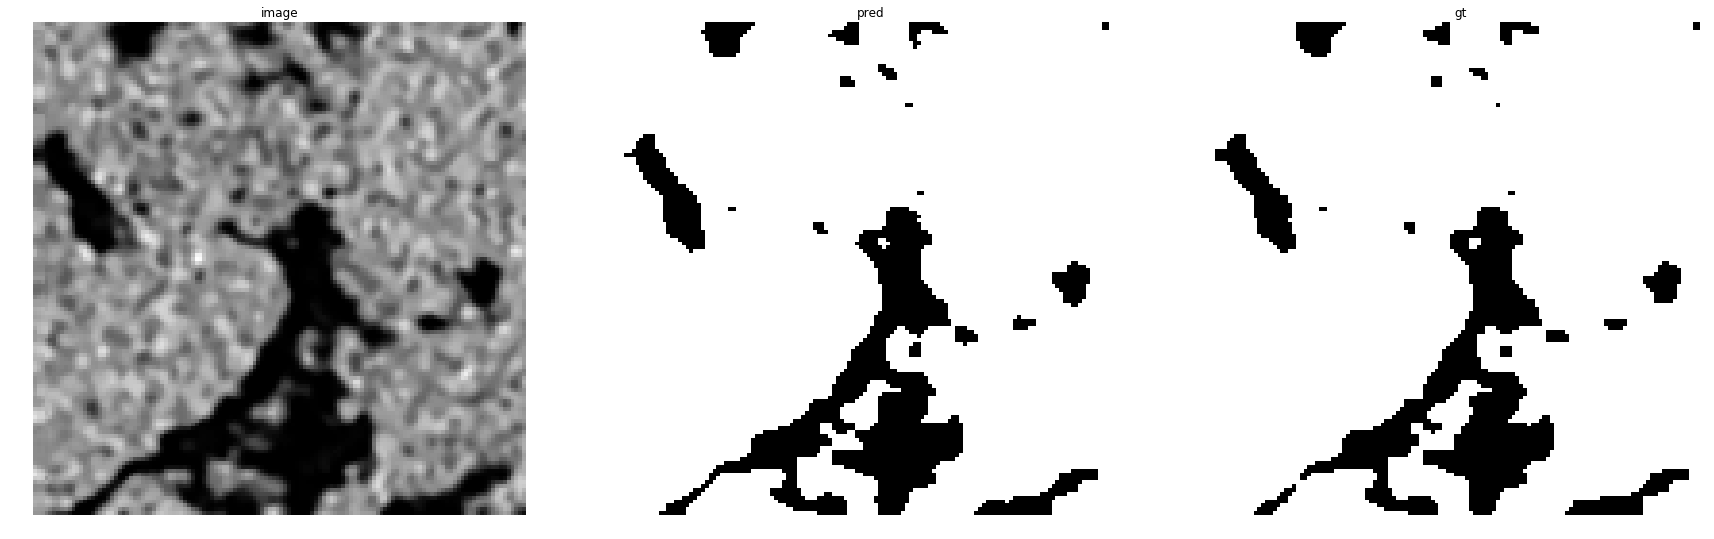

accuracy    : 0.99322509765625
precision   : 0.9987865810135618
recall      : 0.9933271810889472
f1          : 0.9960494002918461
pr_auc      : 0.9999604448908348
iou         : 0.9921298922291548


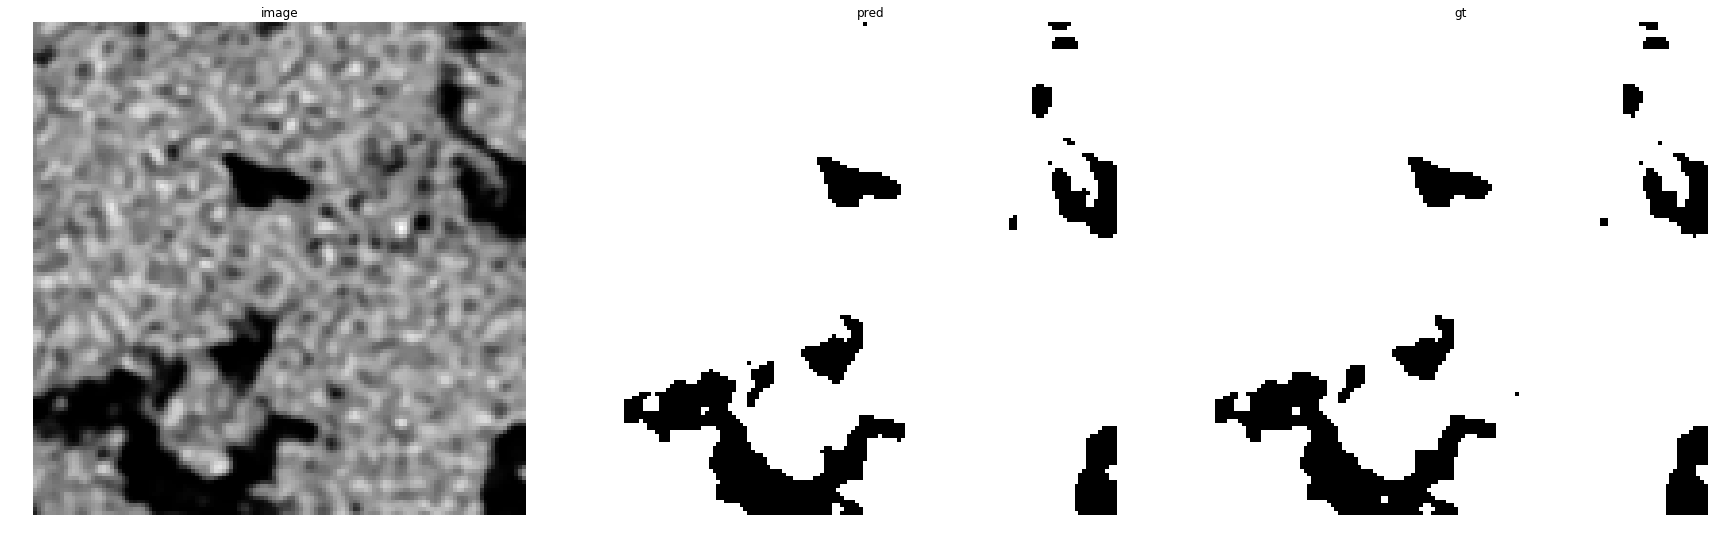

accuracy    : 0.99505615234375
precision   : 0.9992467817036428
recall      : 0.9952260792470845
f1          : 0.9972323777633512
pr_auc      : 0.9999807054690983
iou         : 0.9944800327109172


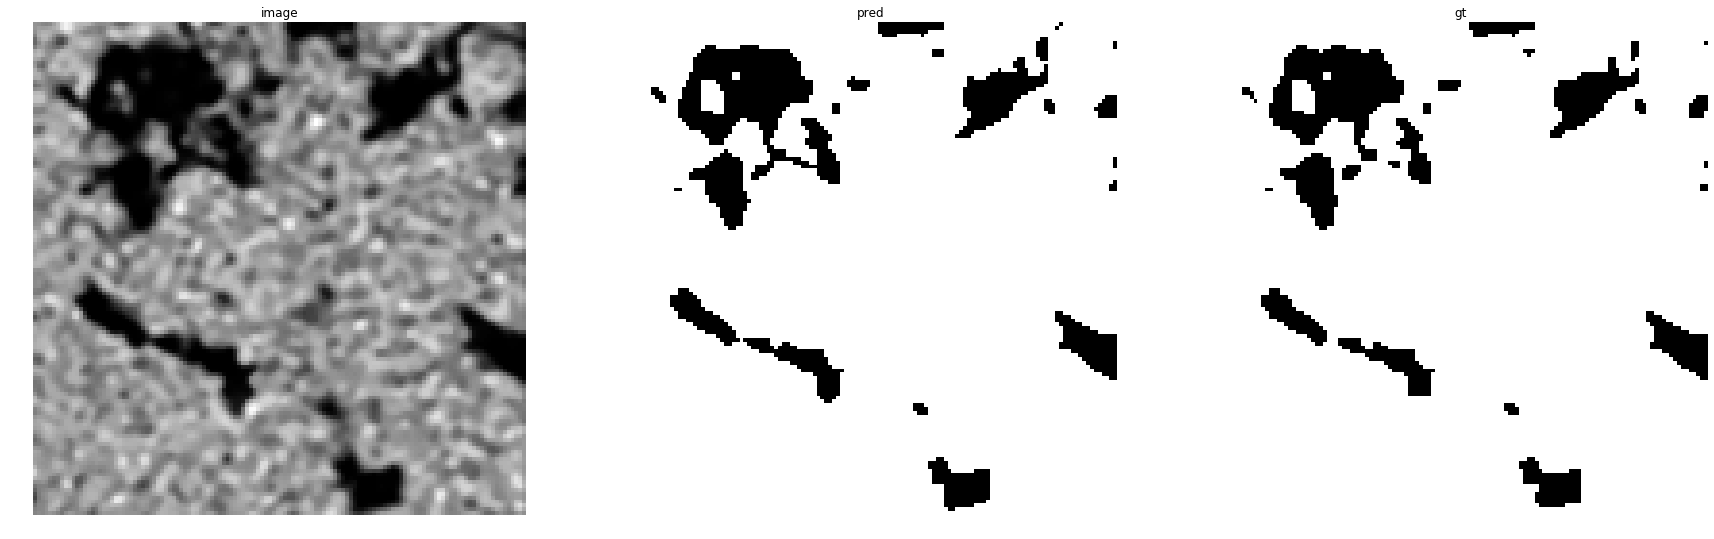

accuracy    : 0.9940185546875
precision   : 0.9995883926733896
recall      : 0.9937257041533111
f1          : 0.9966484268125856
pr_auc      : 0.9999775242926285
iou         : 0.9933192446656214


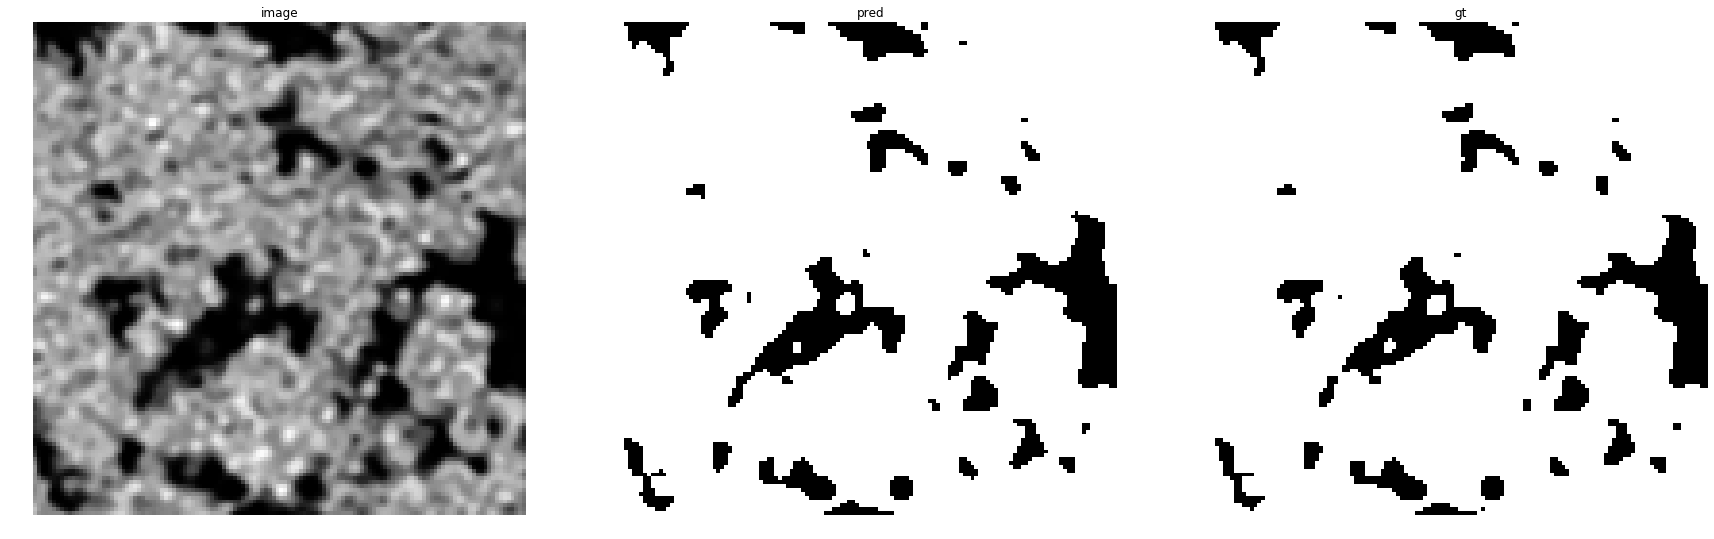

accuracy    : 0.9925537109375
precision   : 0.9986627252252253
recall      : 0.992793171004758
f1          : 0.995719298245614
pr_auc      : 0.9999569821065849
iou         : 0.9914750890923066


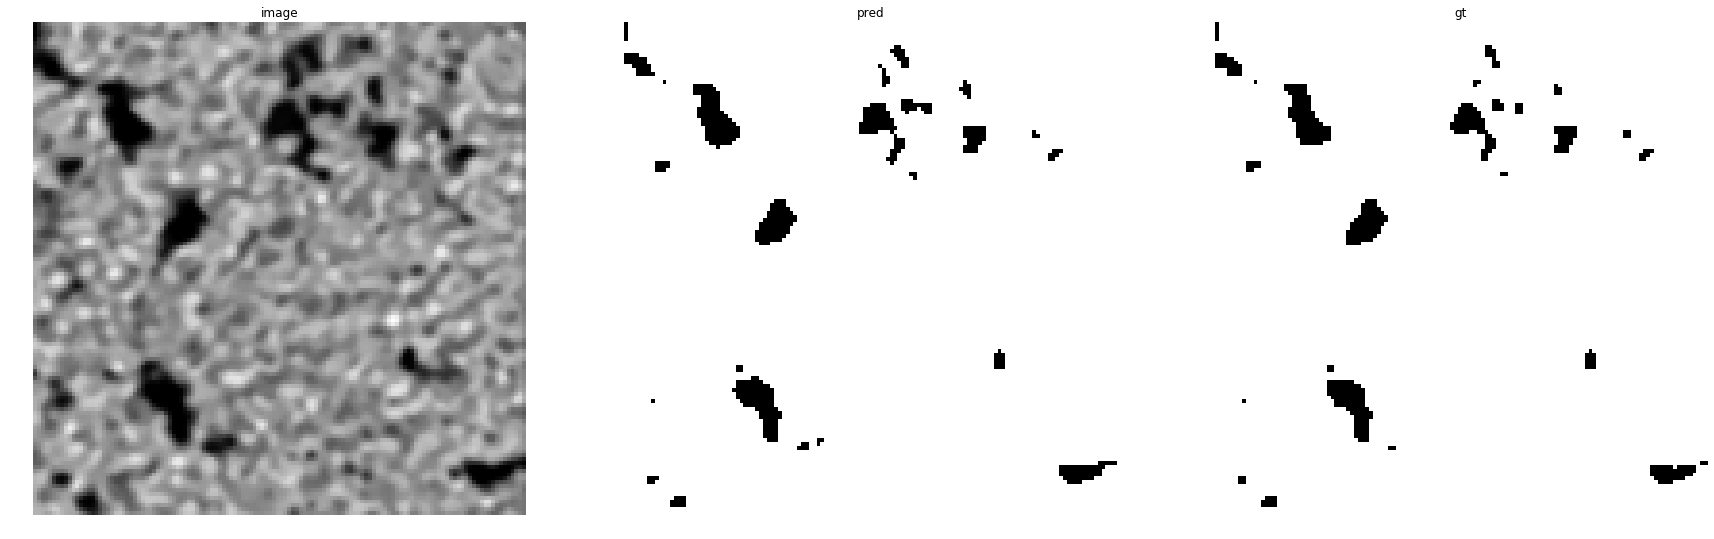

accuracy    : 0.99578857421875
precision   : 0.9993656834760546
recall      : 0.9962691286202099
f1          : 0.9978150036416606
pr_auc      : 0.9999914578851672
iou         : 0.9956395348837209


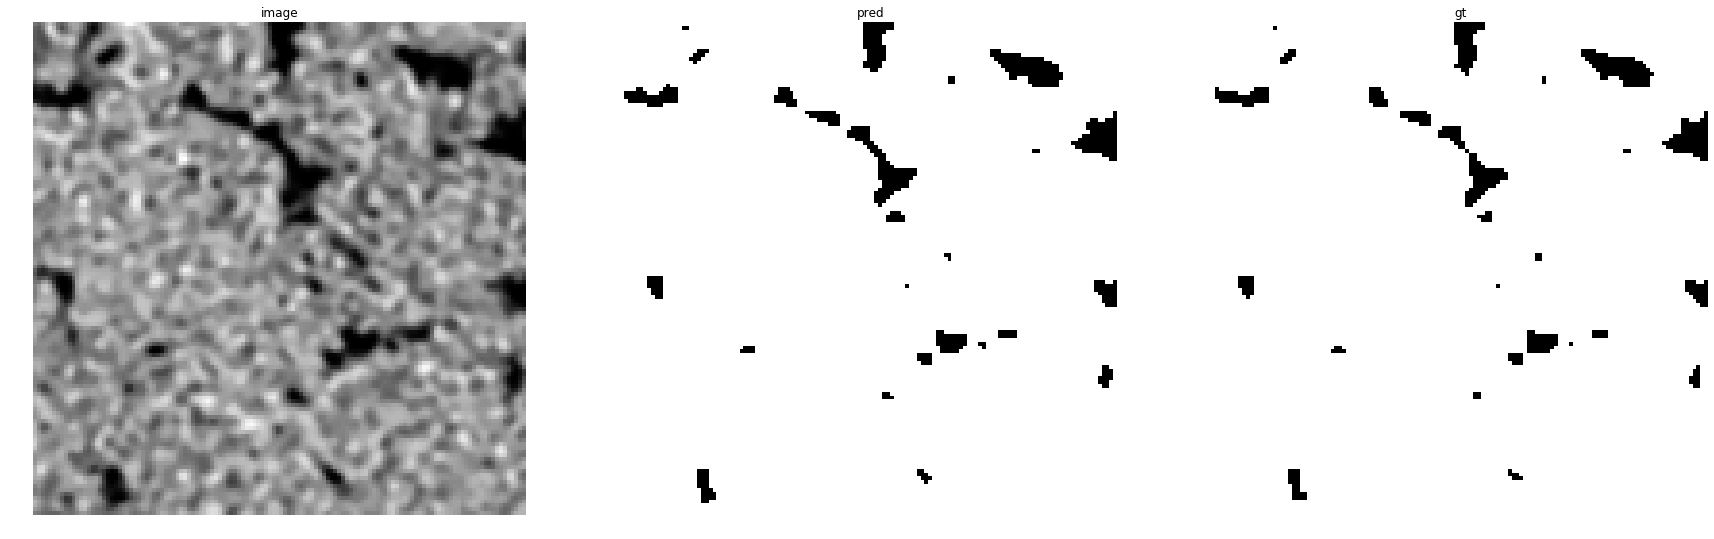

accuracy    : 0.9962158203125
precision   : 0.9993633411854587
recall      : 0.9966982030605118
f1          : 0.998028992878942
pr_auc      : 0.9999932488412887
iou         : 0.9960657402119424


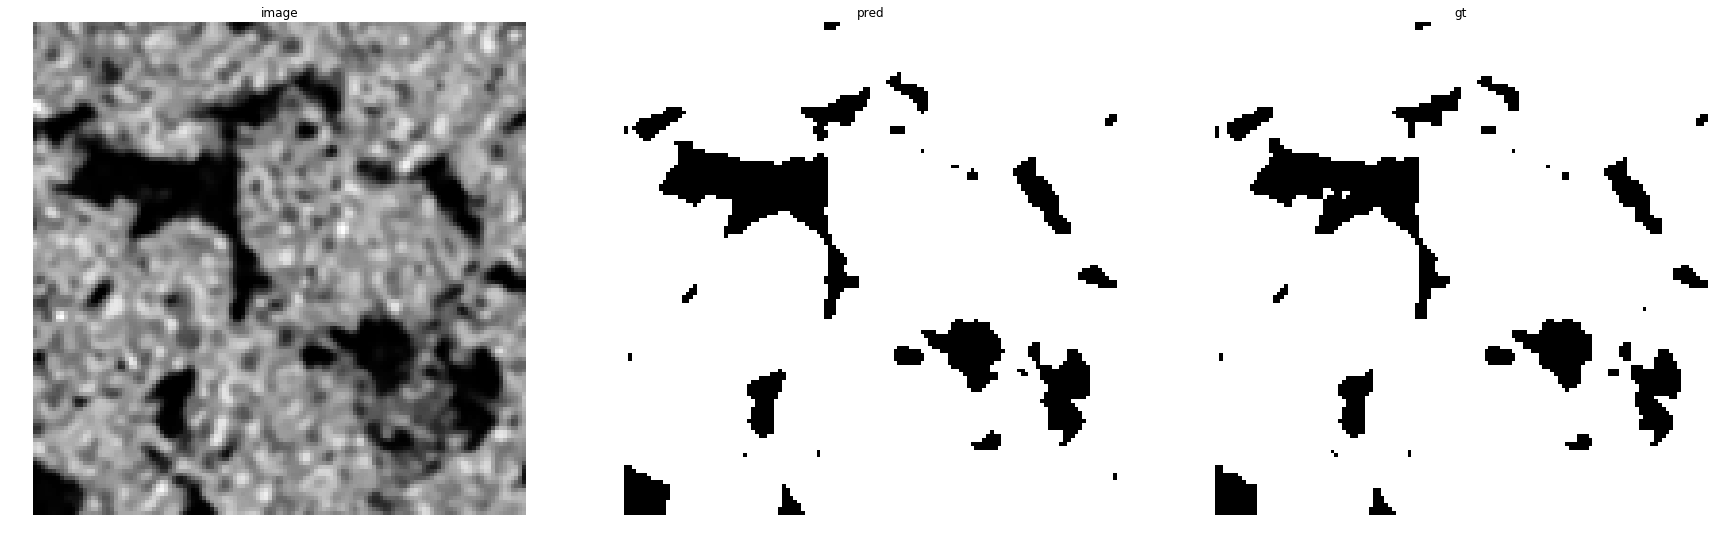

accuracy    : 0.99212646484375
precision   : 0.998688750862664
recall      : 0.992455935806872
f1          : 0.9955625881462626
pr_auc      : 0.9999601862538013
iou         : 0.9911643835616438


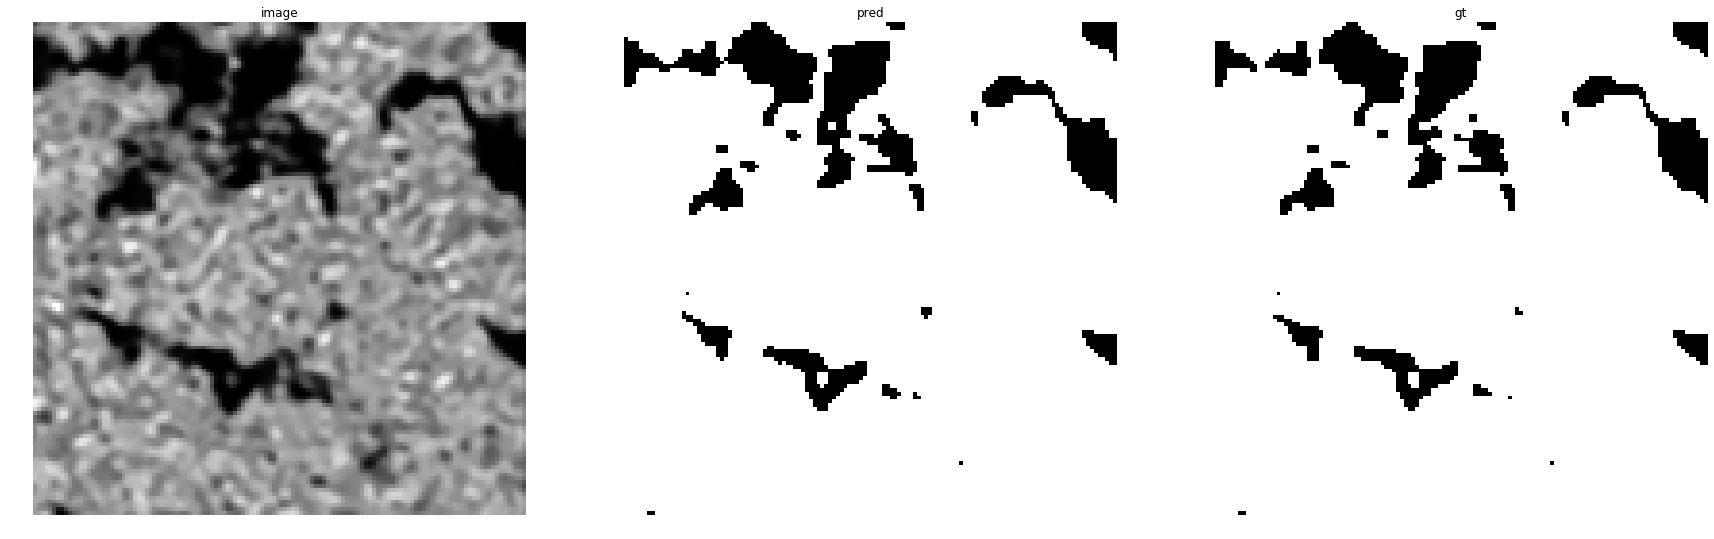

accuracy    : 0.9947509765625
precision   : 0.9995207777093175
recall      : 0.9946181620001362
f1          : 0.9970634432834801
pr_auc      : 0.9999777251471635
iou         : 0.9941440827999455


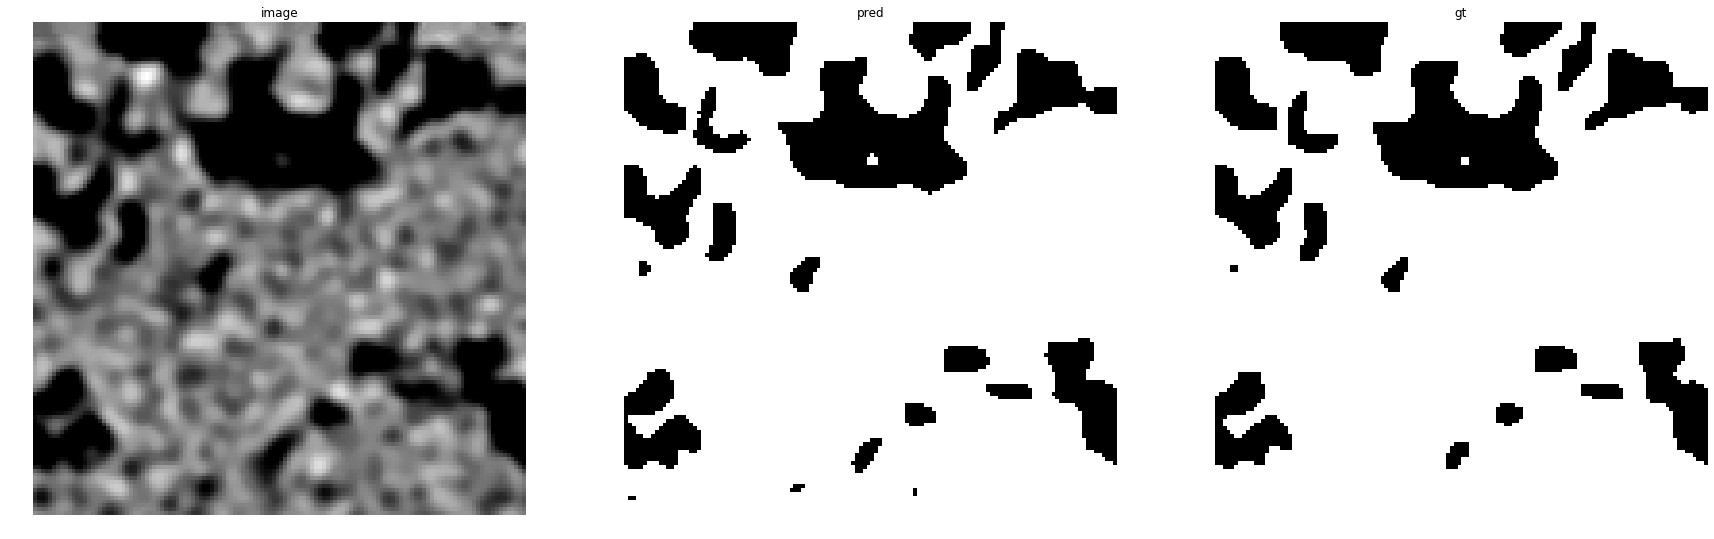

accuracy    : 0.989990234375
precision   : 0.997398224670952
recall      : 0.990124582193862
f1          : 0.9937480939310767
pr_auc      : 0.999901287422713
iou         : 0.9875738748295196


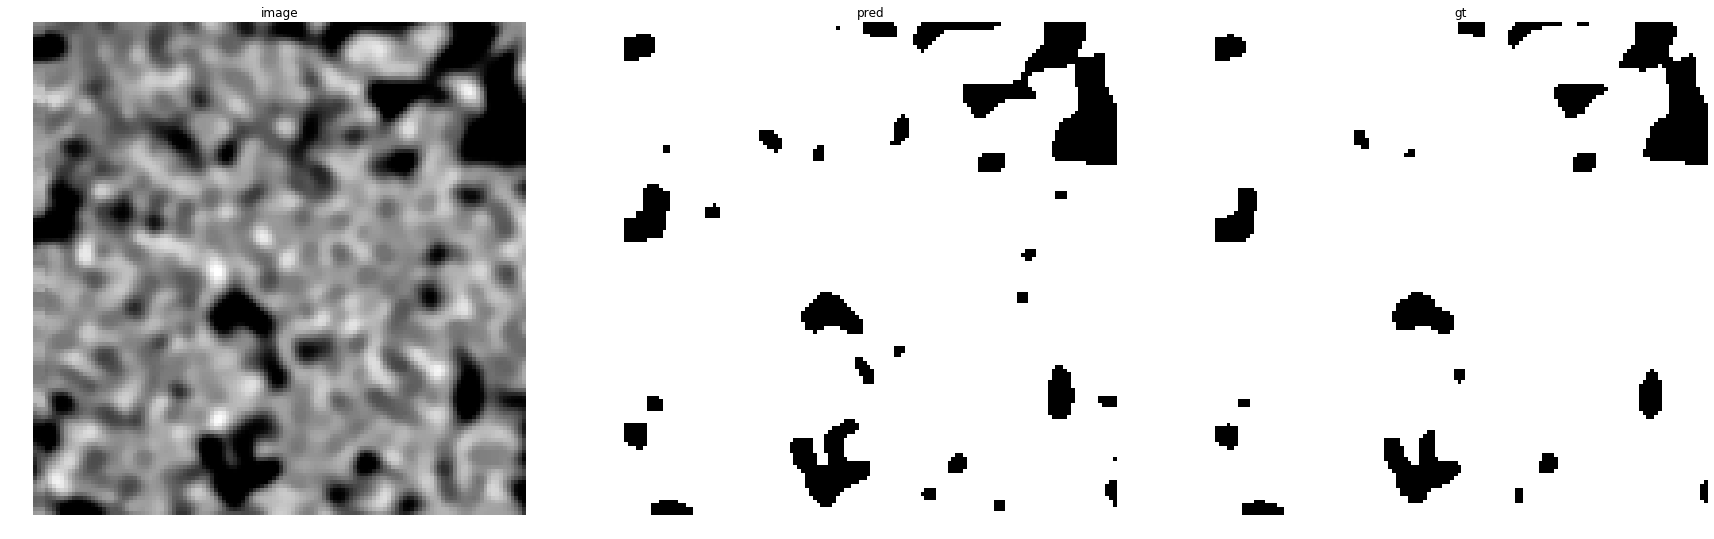

accuracy    : 0.97796630859375
precision   : 0.9990527099262467
recall      : 0.9770381154049762
f1          : 0.9879227861229133
pr_auc      : 0.9998252925893648
iou         : 0.97613380933492


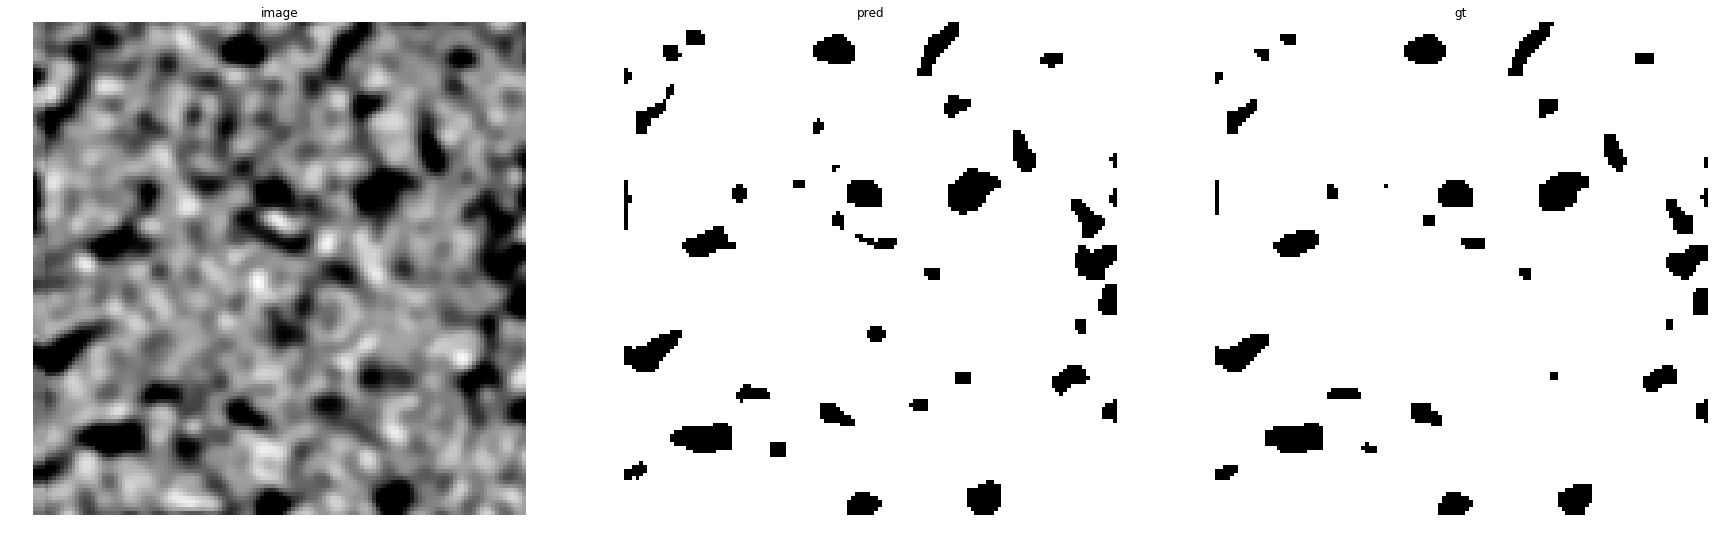

accuracy    : 0.98541259765625
precision   : 0.999004711034437
recall      : 0.9853403141361257
f1          : 0.9921254653882903
pr_auc      : 0.9998975436935265
iou         : 0.9843739784243217


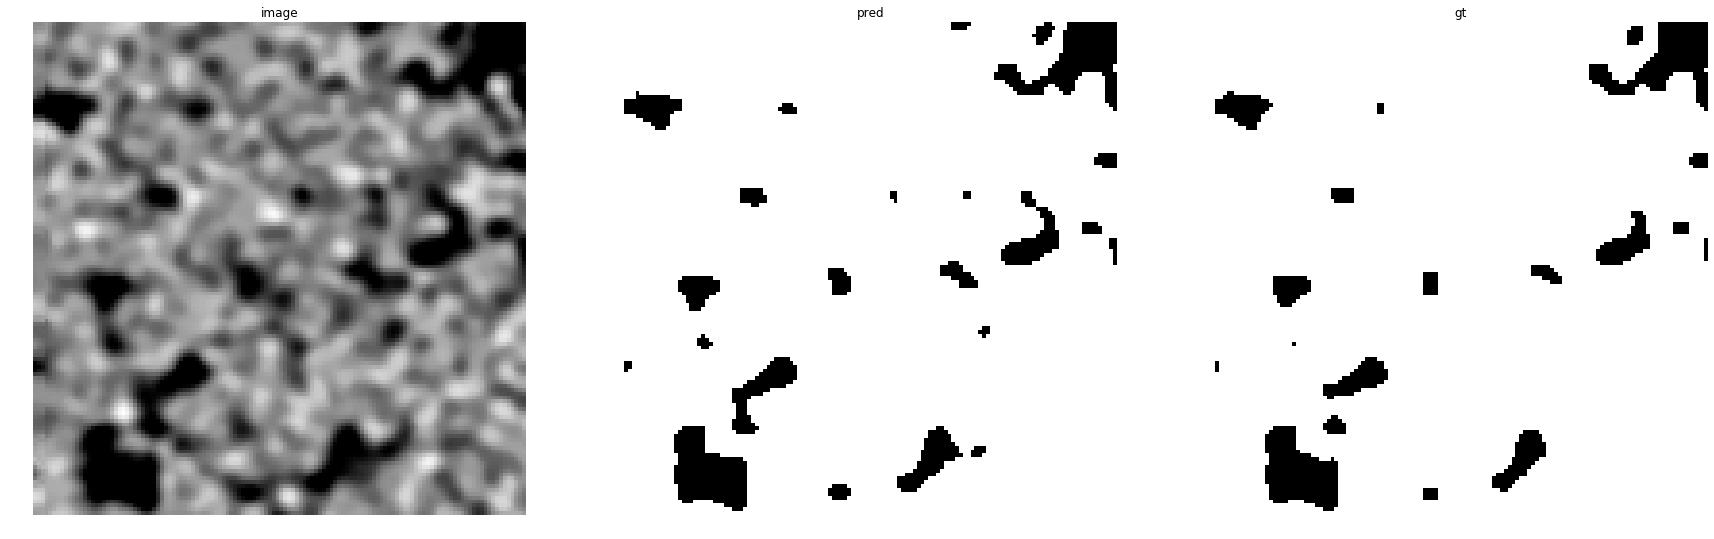

accuracy    : 0.9871826171875
precision   : 0.998800079994667
recall      : 0.9873476112026359
f1          : 0.9930408271474019
pr_auc      : 0.9998917320021428
iou         : 0.9861778450602251


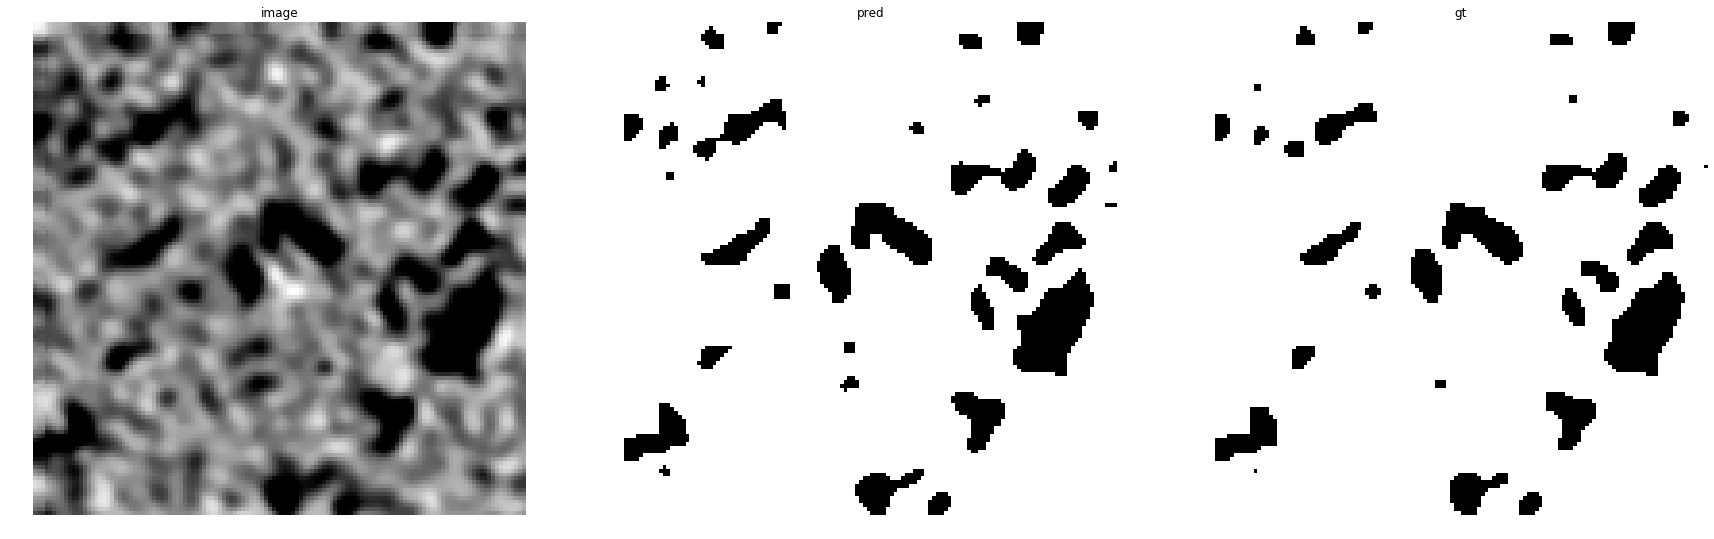

accuracy    : 0.98492431640625
precision   : 0.9986181164927797
recall      : 0.9845367847411444
f1          : 0.9915274585805921
pr_auc      : 0.9998550975559618
iou         : 0.9831972789115646


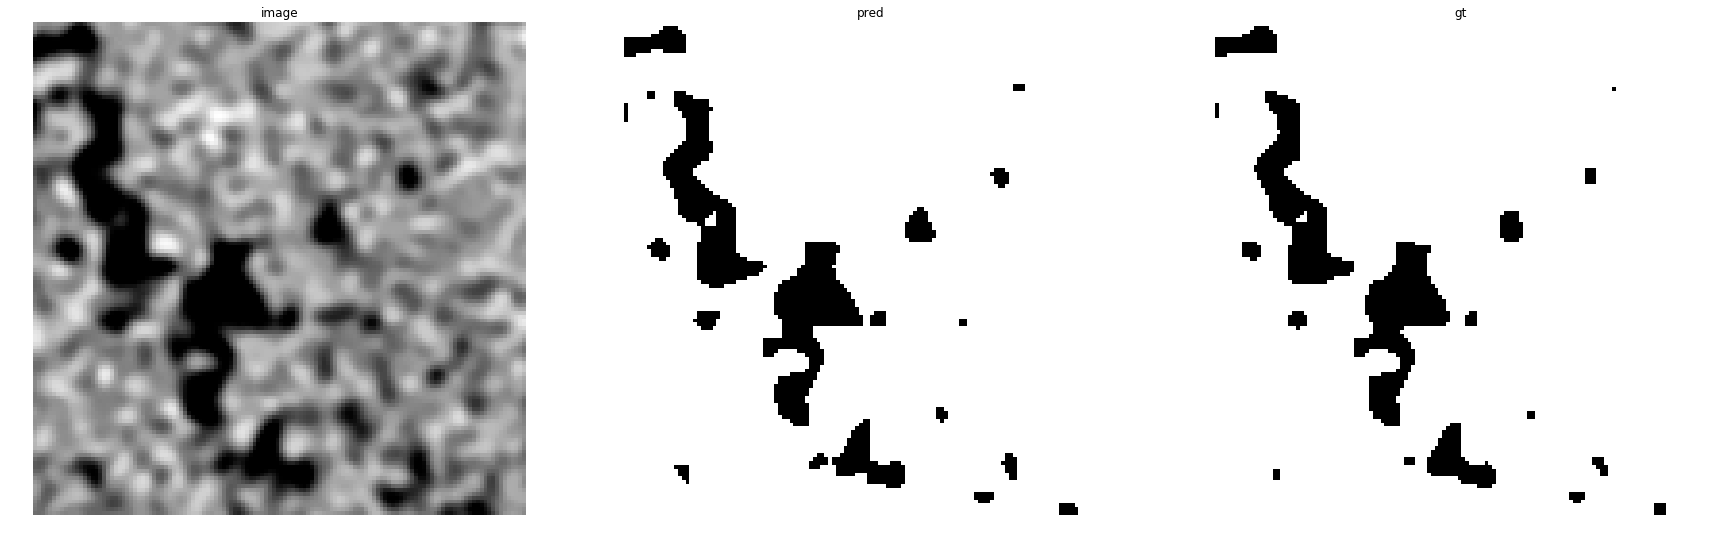

accuracy    : 0.99114990234375
precision   : 0.9987228607918263
recall      : 0.9915910304324613
f1          : 0.9951441679782994
pr_auc      : 0.9999518345129205
iou         : 0.9903352662800773


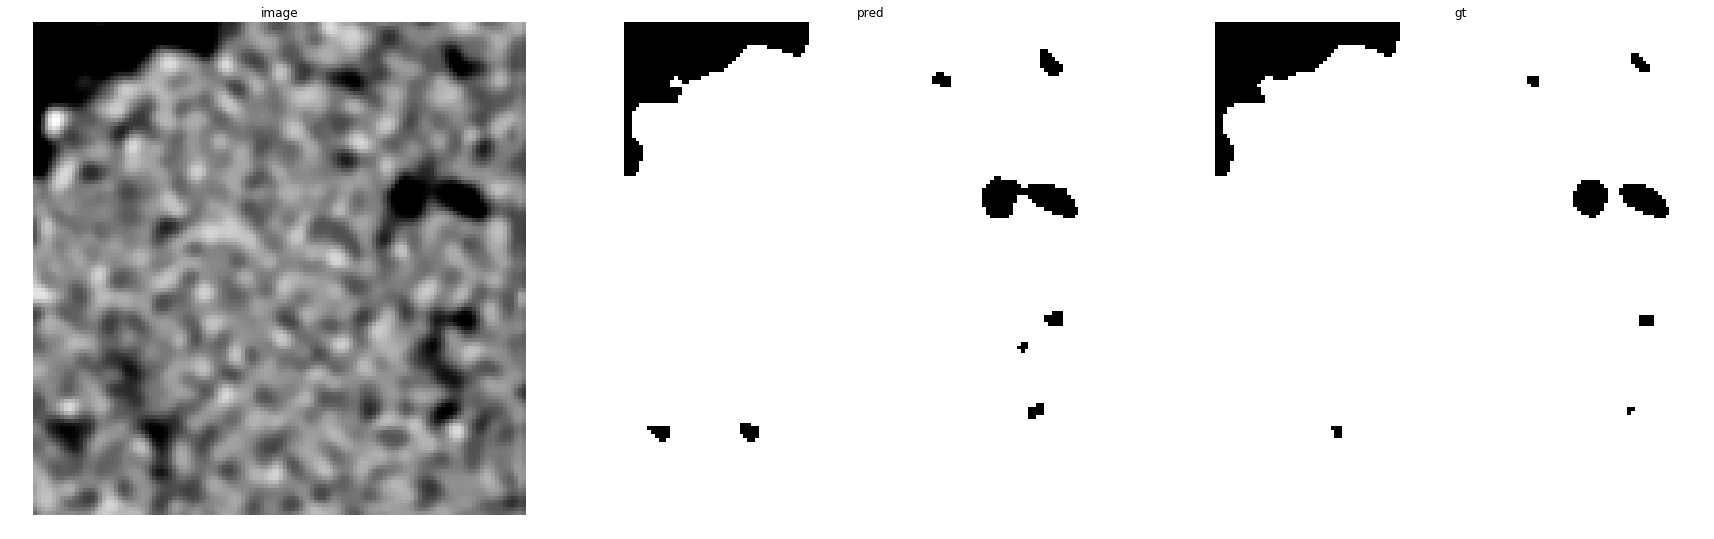

accuracy    : 0.99322509765625
precision   : 0.9997403946002077
recall      : 0.9931016697827348
f1          : 0.9964099744493677
pr_auc      : 0.9999776810581283
iou         : 0.9928456332581372


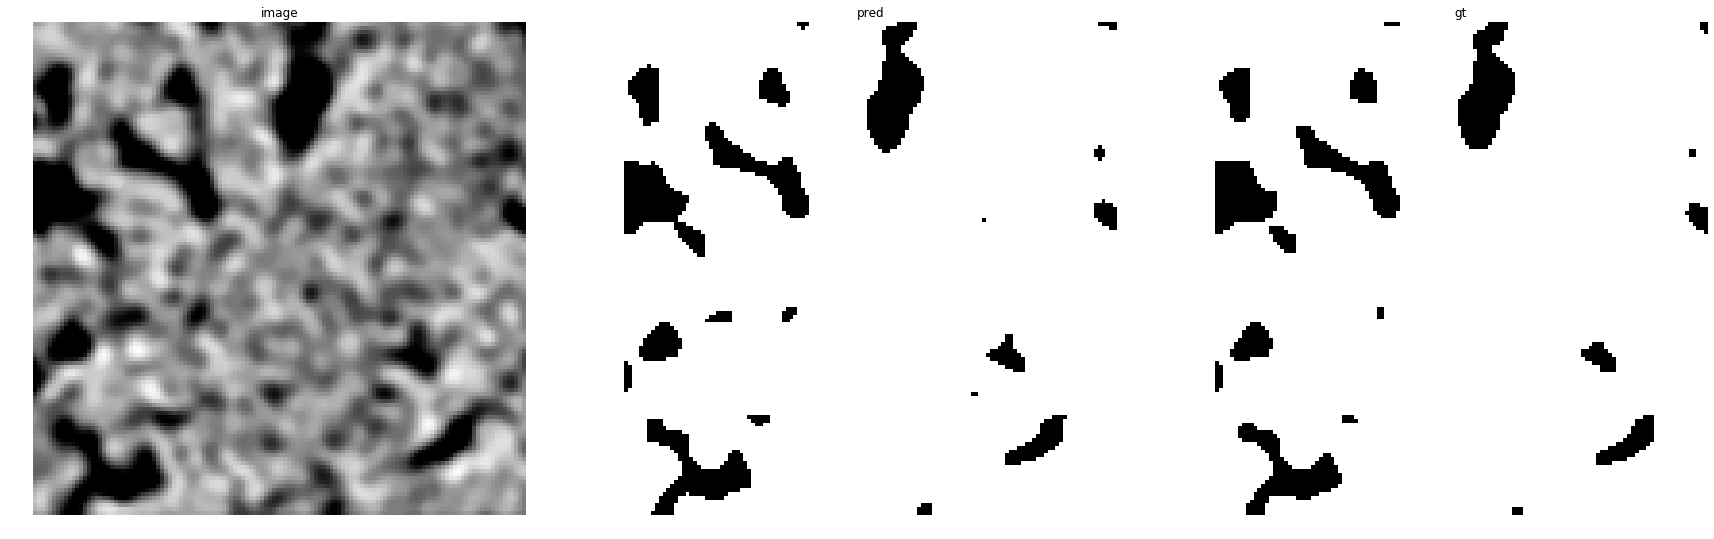

accuracy    : 0.99090576171875
precision   : 0.9982498653742595
recall      : 0.9917742259078446
f1          : 0.9950015096111913
pr_auc      : 0.9999439123804099
iou         : 0.9900527405033713


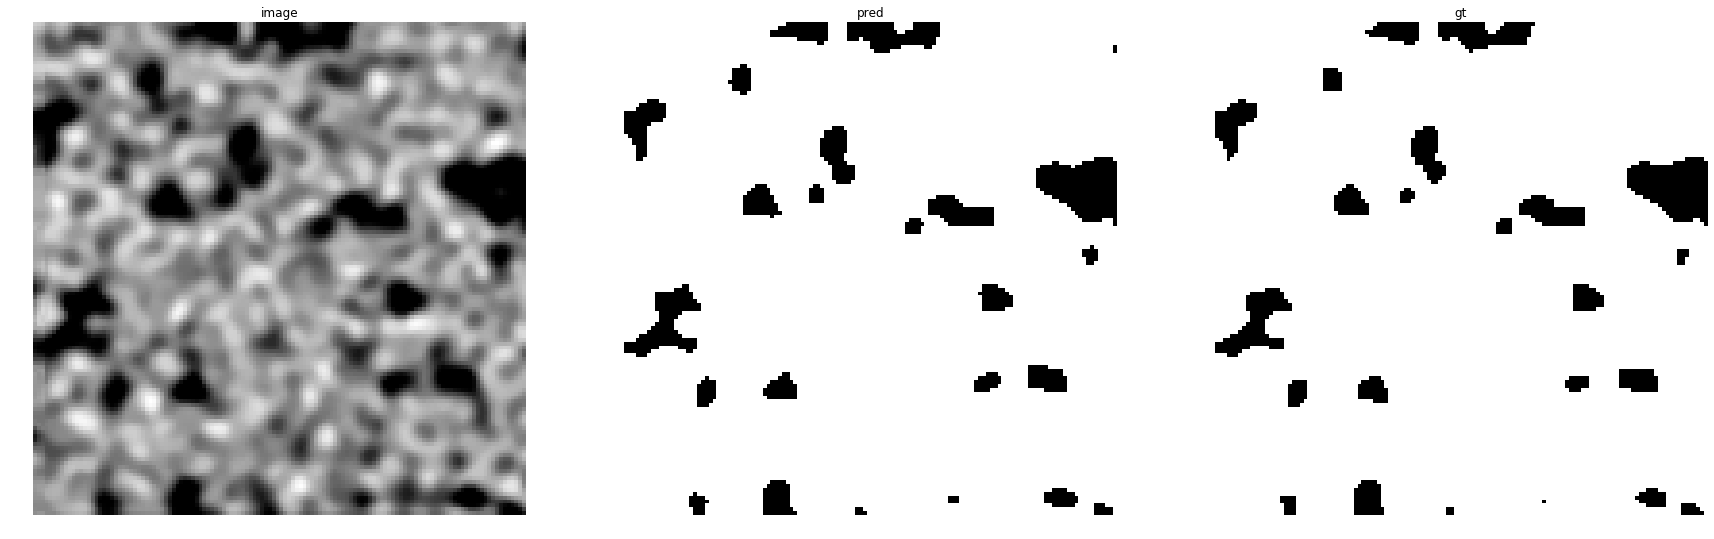

accuracy    : 0.99298095703125
precision   : 0.9985314731993858
recall      : 0.9938214190805209
f1          : 0.9961708787000966
pr_auc      : 0.9999614493558108
iou         : 0.9923709698819159


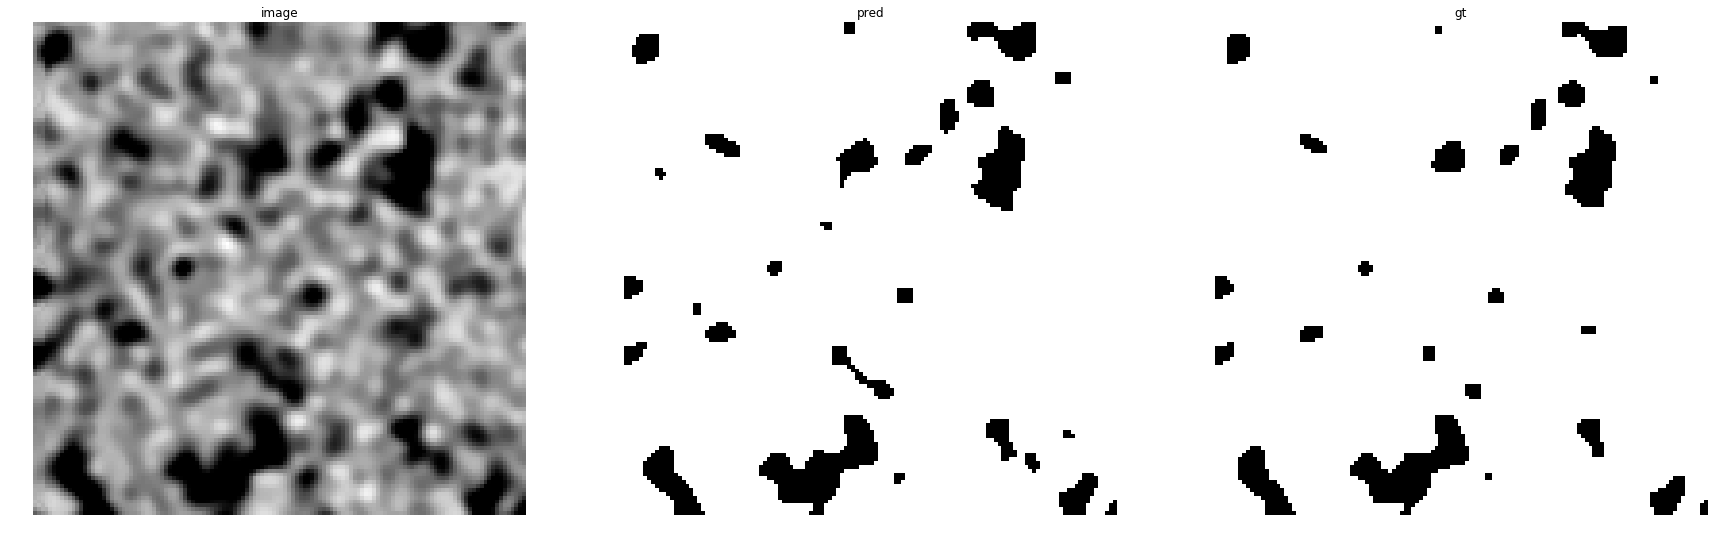

accuracy    : 0.98736572265625
precision   : 0.9992670575692963
recall      : 0.9870993220562101
f1          : 0.9931459223204528
pr_auc      : 0.9999115349306565
iou         : 0.9863851617995264


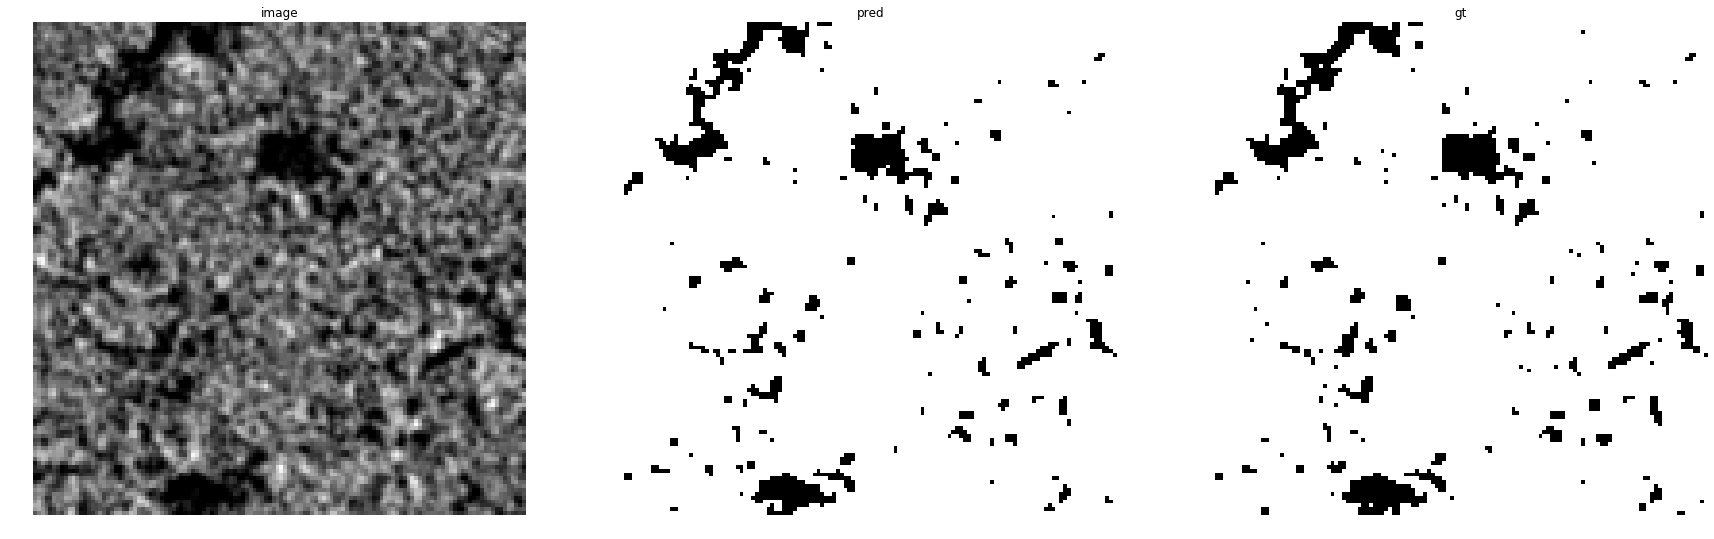

accuracy    : 0.98760986328125
precision   : 0.9900288638152716
recall      : 0.9966321072442713
f1          : 0.9933195116332643
pr_auc      : 0.999887252544805
iou         : 0.9867276887871853


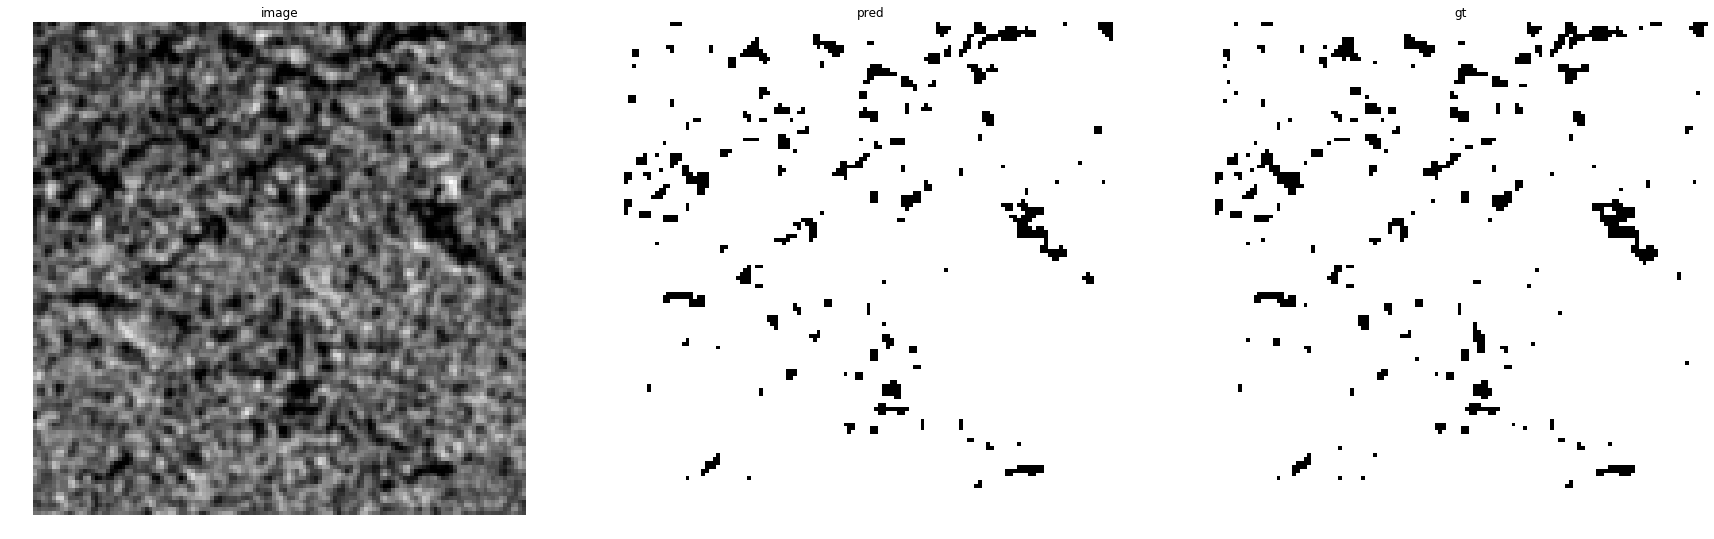

accuracy    : 0.98956298828125
precision   : 0.9923659225044906
recall      : 0.9966497004059017
f1          : 0.9945031984313222
pr_auc      : 0.9999103916973474
iou         : 0.9890664961636829


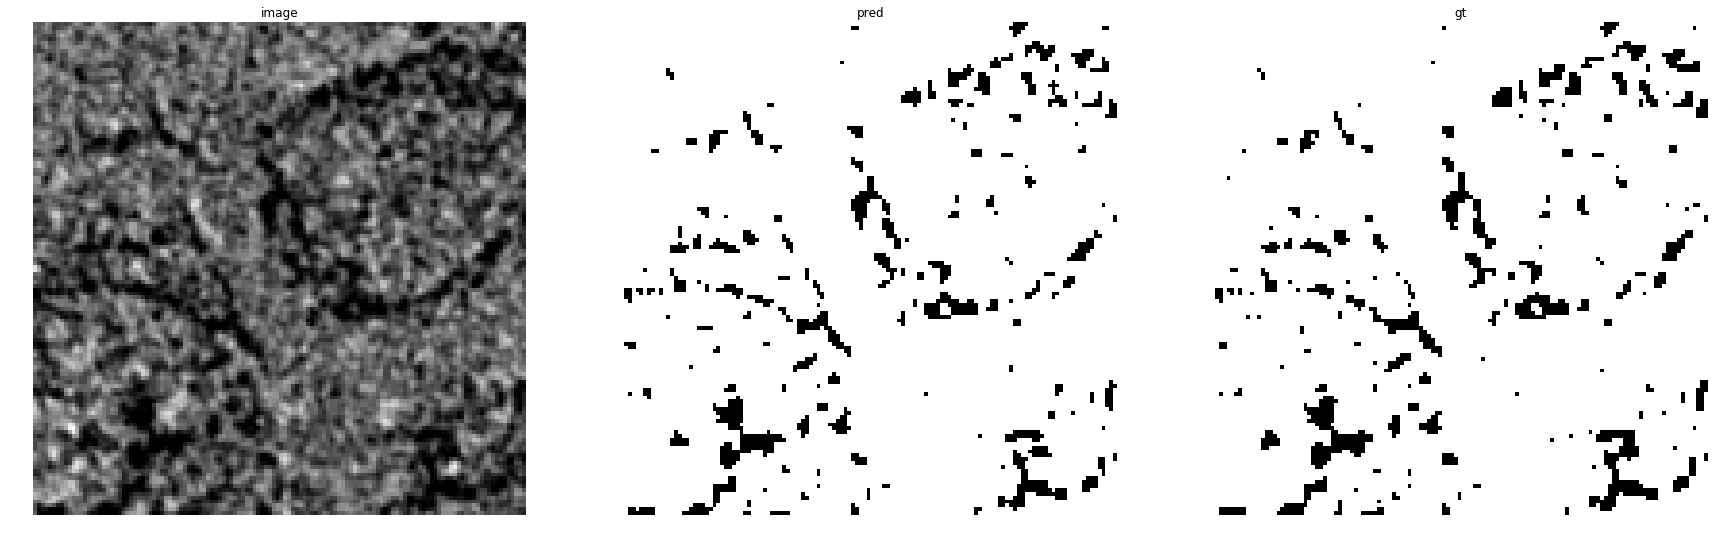

accuracy    : 0.986083984375
precision   : 0.9893139841688654
recall      : 0.995618693574084
f1          : 0.9924563260984647
pr_auc      : 0.9998234463911115
iou         : 0.985025614081177


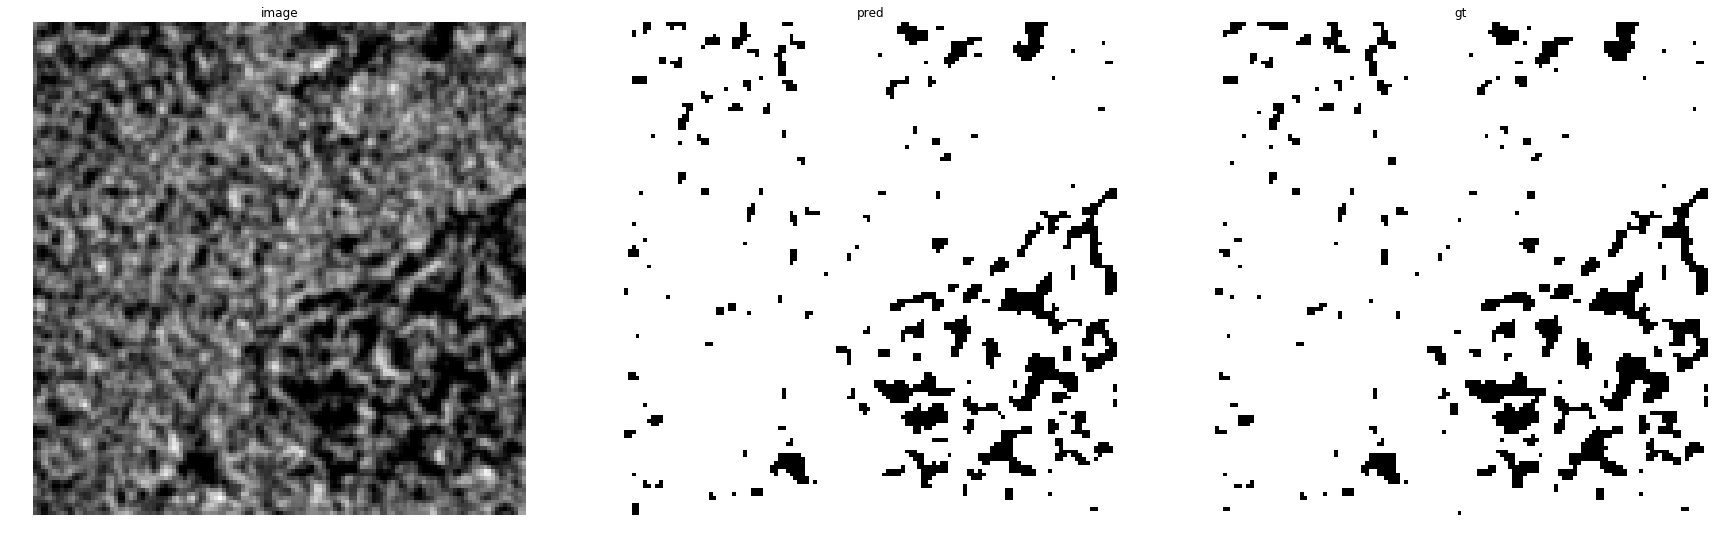

accuracy    : 0.9820556640625
precision   : 0.9853356652764698
recall      : 0.9948383591415376
f1          : 0.9900642108820547
pr_auc      : 0.9997456481003384
iou         : 0.9803239191540624


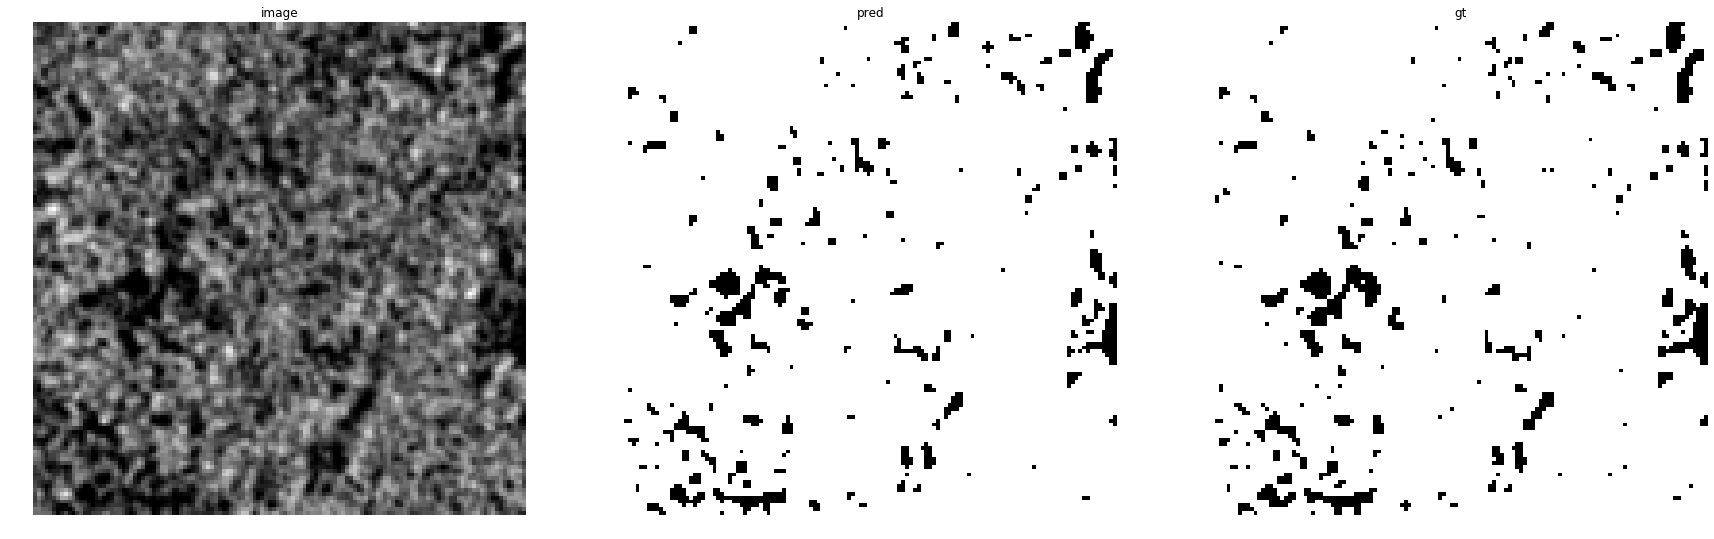

accuracy    : 0.98602294921875
precision   : 0.9894311064718163
recall      : 0.9956016543031576
f1          : 0.99250678969929
pr_auc      : 0.9998218933631132
iou         : 0.9851250405975966


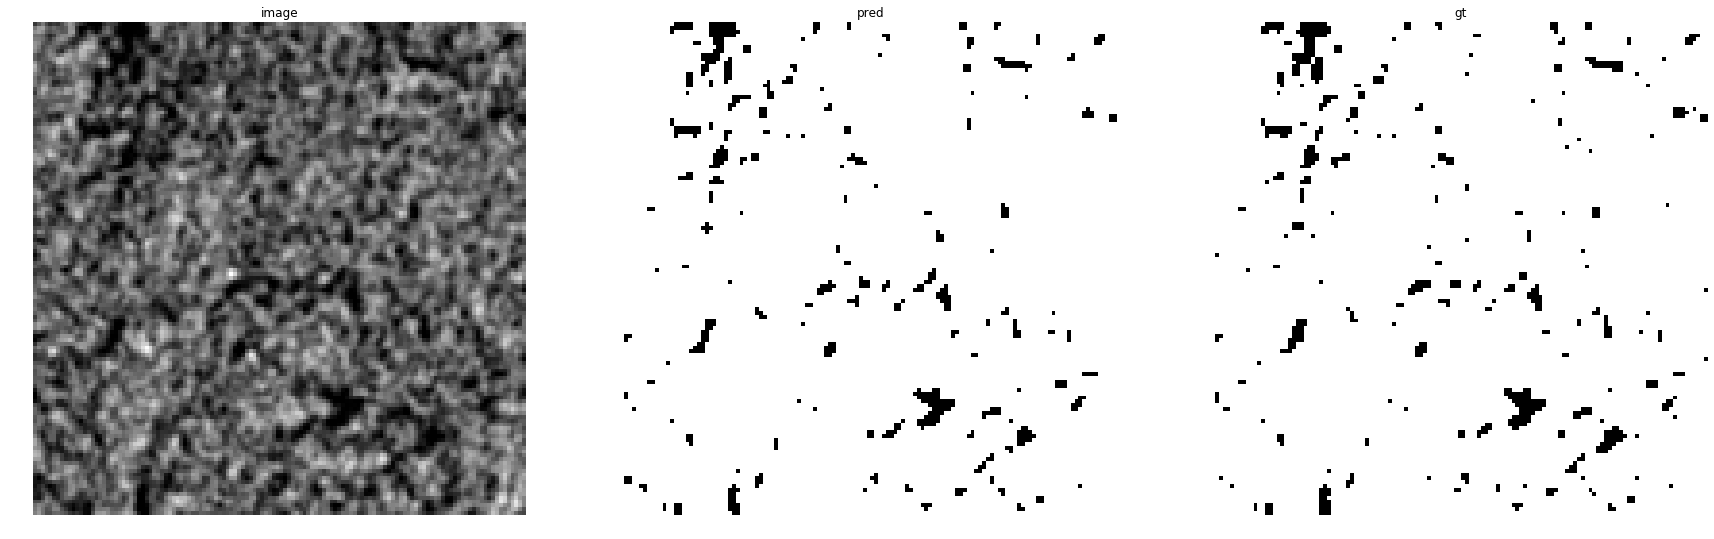

accuracy    : 0.99041748046875
precision   : 0.9935073201782304
recall      : 0.9964885398710337
f1          : 0.9949956969368565
pr_auc      : 0.9999291390905268
iou         : 0.9900412305740565


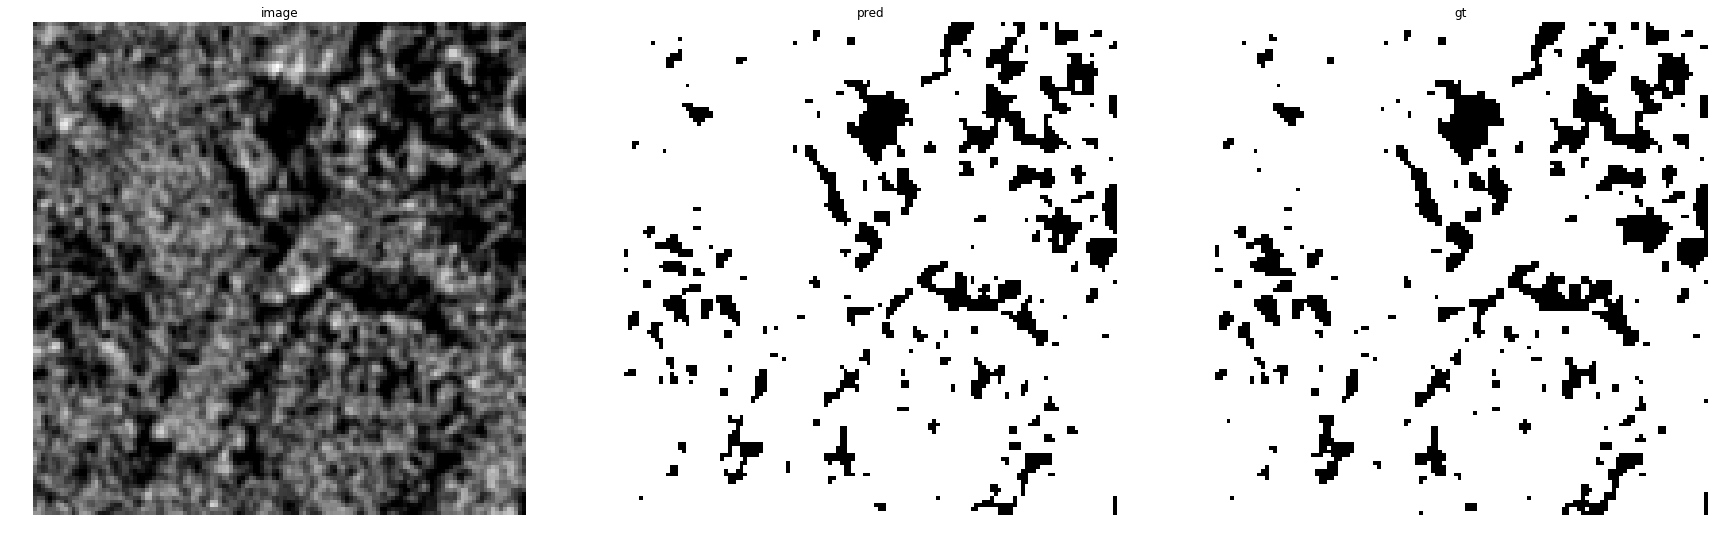

accuracy    : 0.97674560546875
precision   : 0.977850984790075
recall      : 0.9953624429223744
f1          : 0.98652901035958
pr_auc      : 0.9995712996024435
iou         : 0.9734161317331845


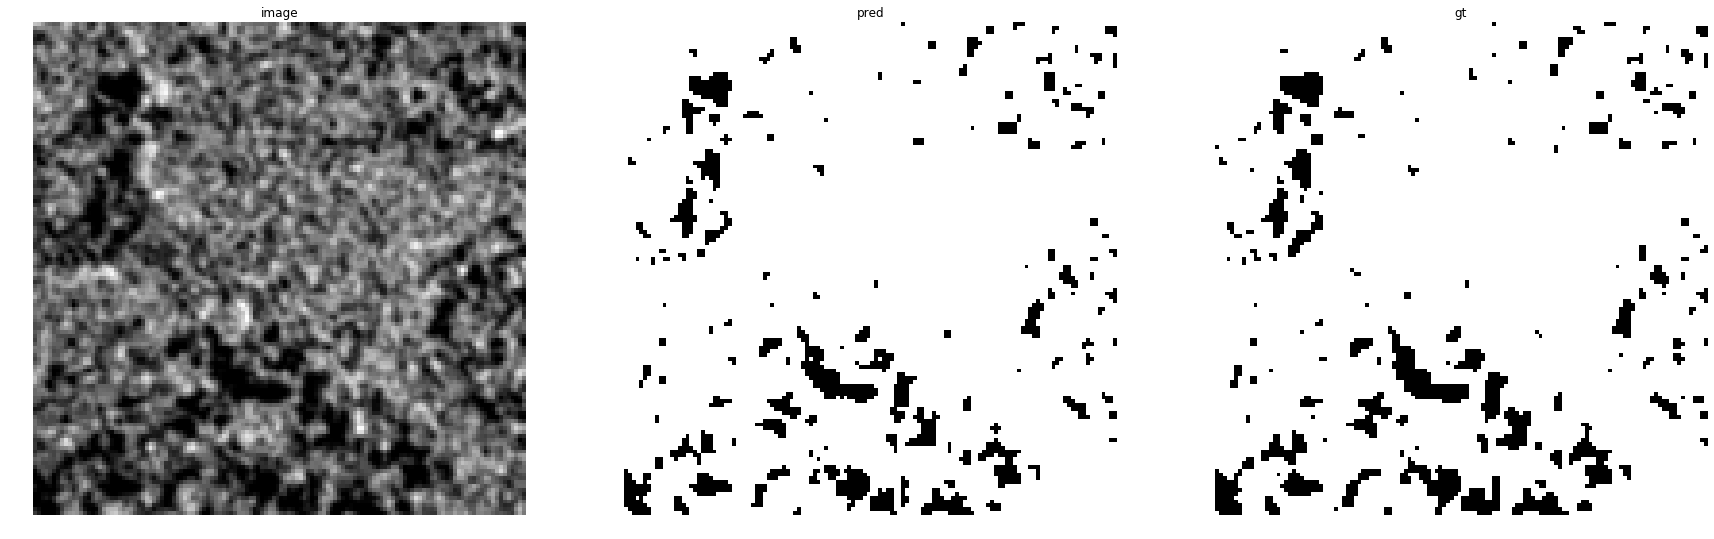

accuracy    : 0.98370361328125
precision   : 0.9846504457403311
recall      : 0.9974198804997284
f1          : 0.9909940297500589
pr_auc      : 0.9998036478427949
iou         : 0.9821488266363576


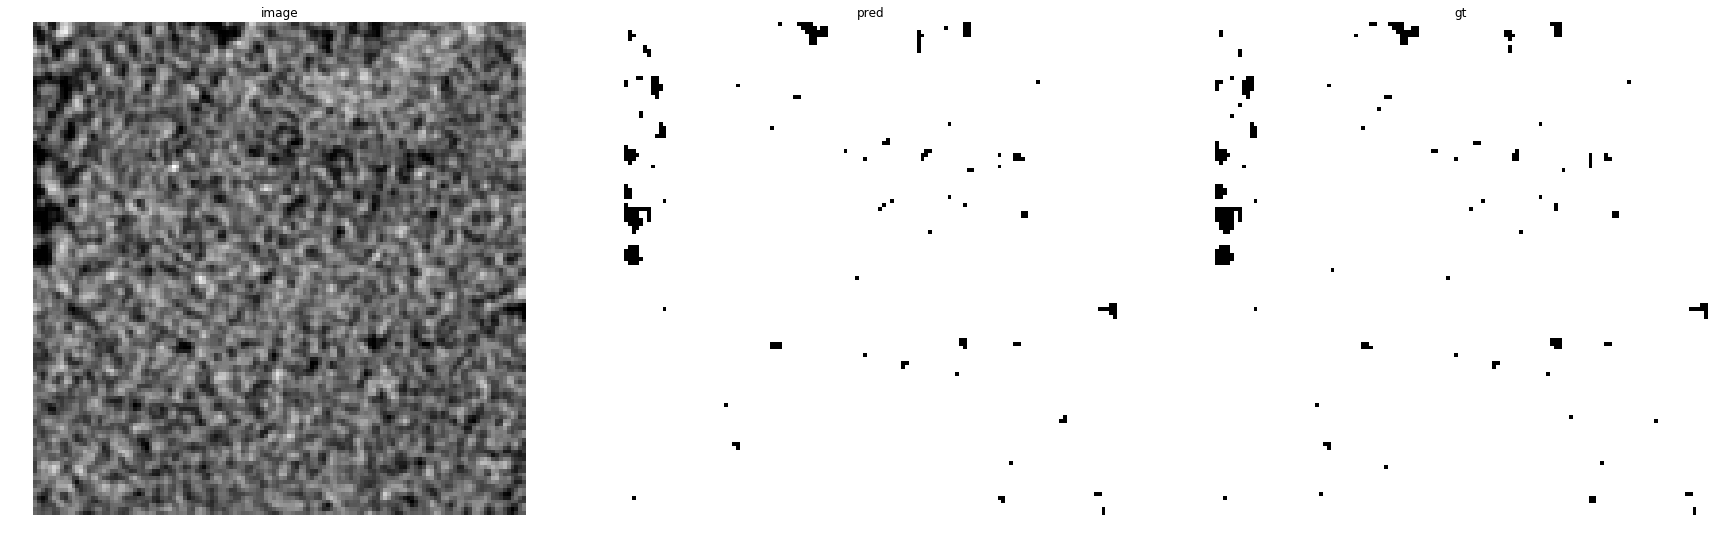

accuracy    : 0.99652099609375
precision   : 0.9978334880841845
recall      : 0.9986370957749969
f1          : 0.9982351301978513
pr_auc      : 0.9999866706040128
iou         : 0.996476478951598


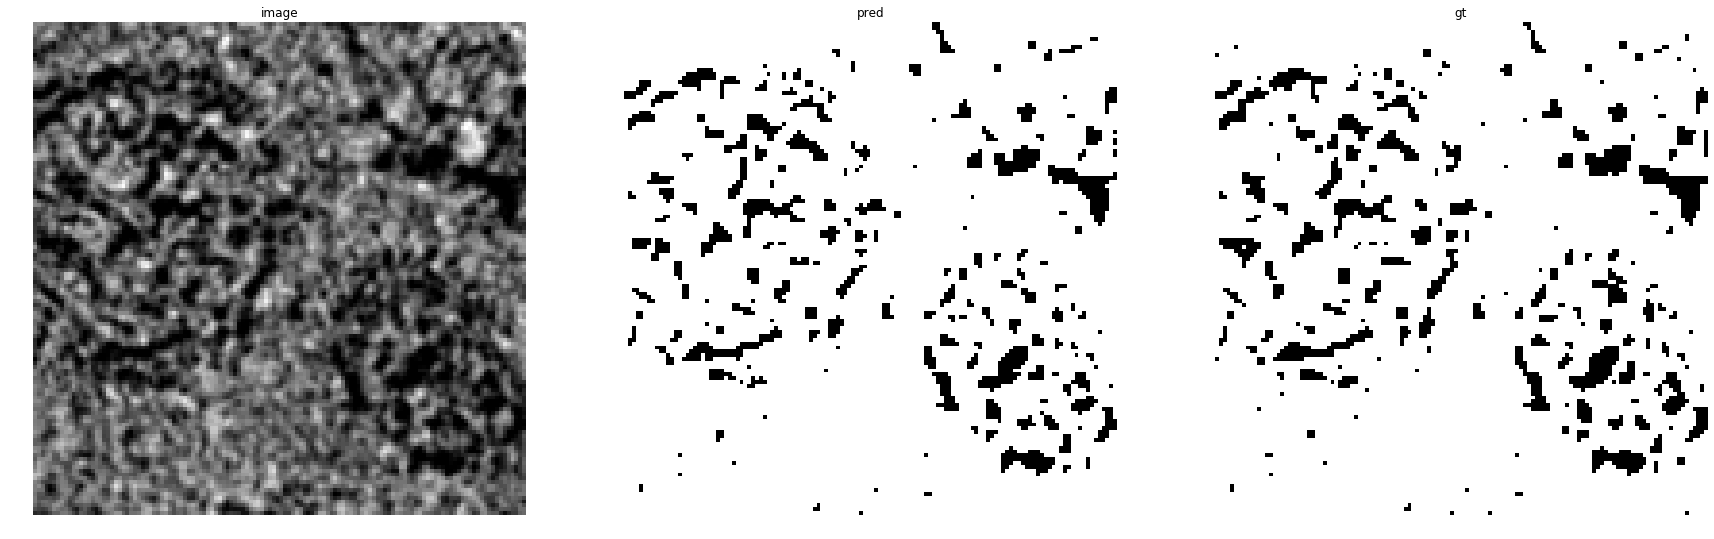

accuracy    : 0.97998046875
precision   : 0.9826966139648504
recall      : 0.9949845413947097
f1          : 0.9888024033865902
pr_auc      : 0.999673026913298
iou         : 0.9778528021607023


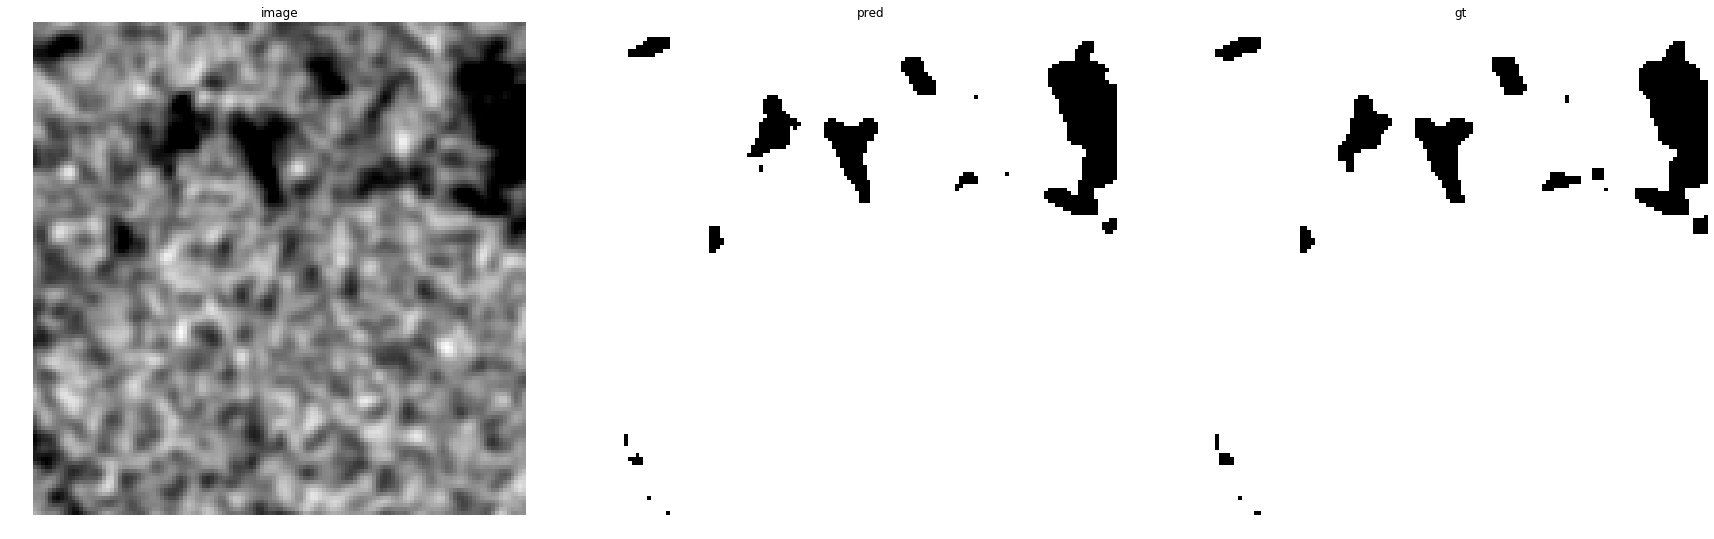

accuracy    : 0.99310302734375
precision   : 0.992942242942243
recall      : 0.9997392268074842
f1          : 0.9963291427086379
pr_auc      : 0.9999819178328764
iou         : 0.9926851372345935


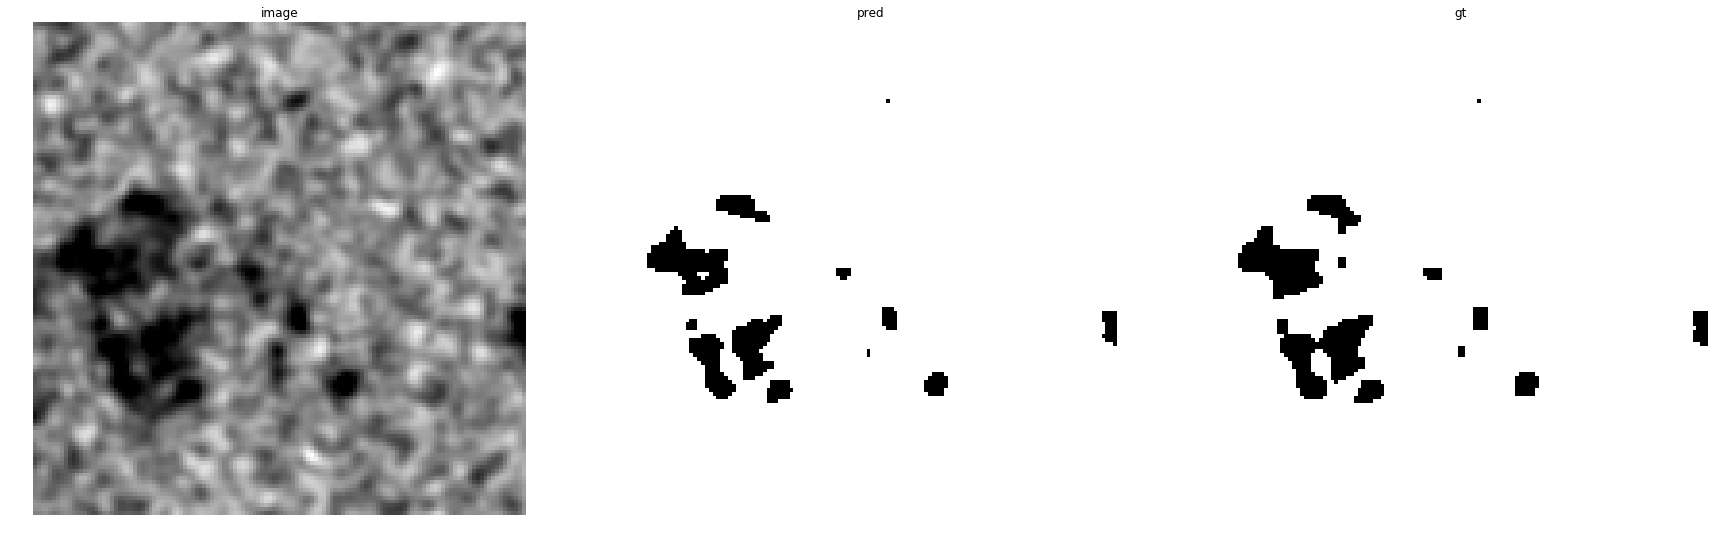

accuracy    : 0.99359130859375
precision   : 0.9935254538529897
recall      : 0.9998083679335675
f1          : 0.9966570091375083
pr_auc      : 0.9999770642772294
iou         : 0.9933362949800089


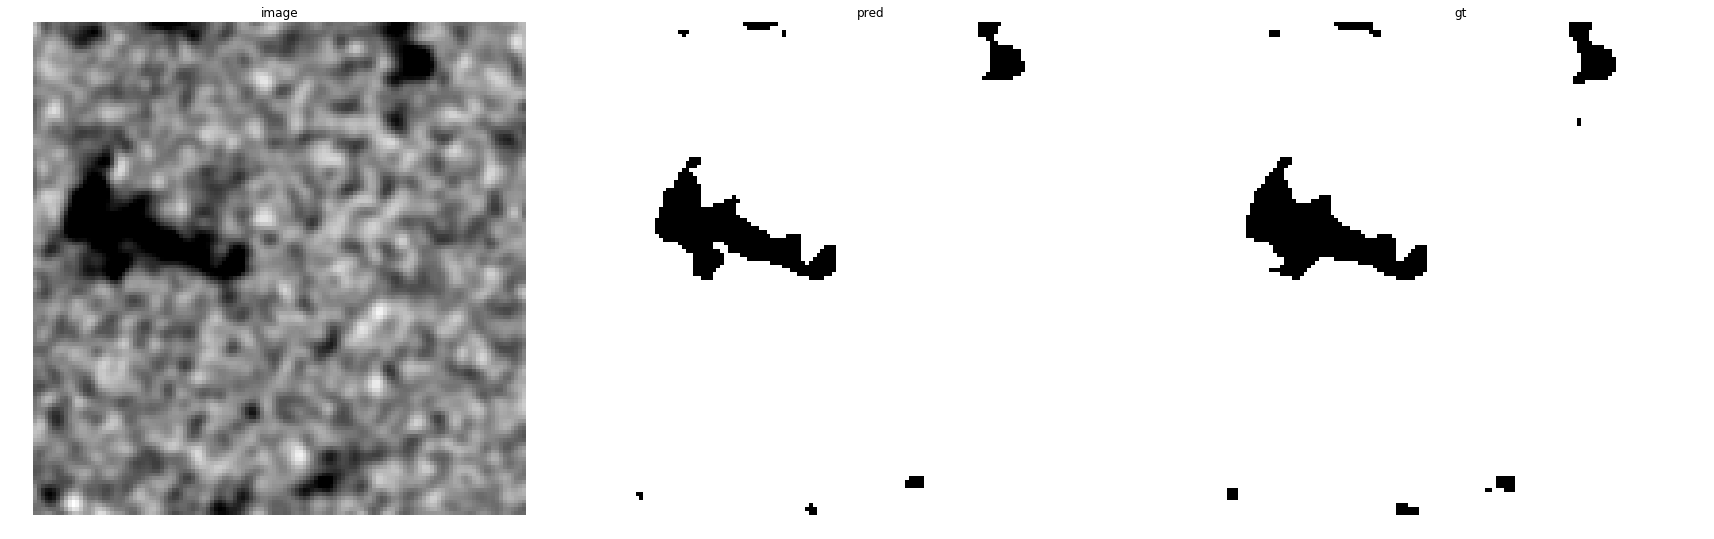

accuracy    : 0.9937744140625
precision   : 0.993686627128372
recall      : 0.9998075072184793
f1          : 0.9967376703127999
pr_auc      : 0.9999858460216012
iou         : 0.9934965570007651


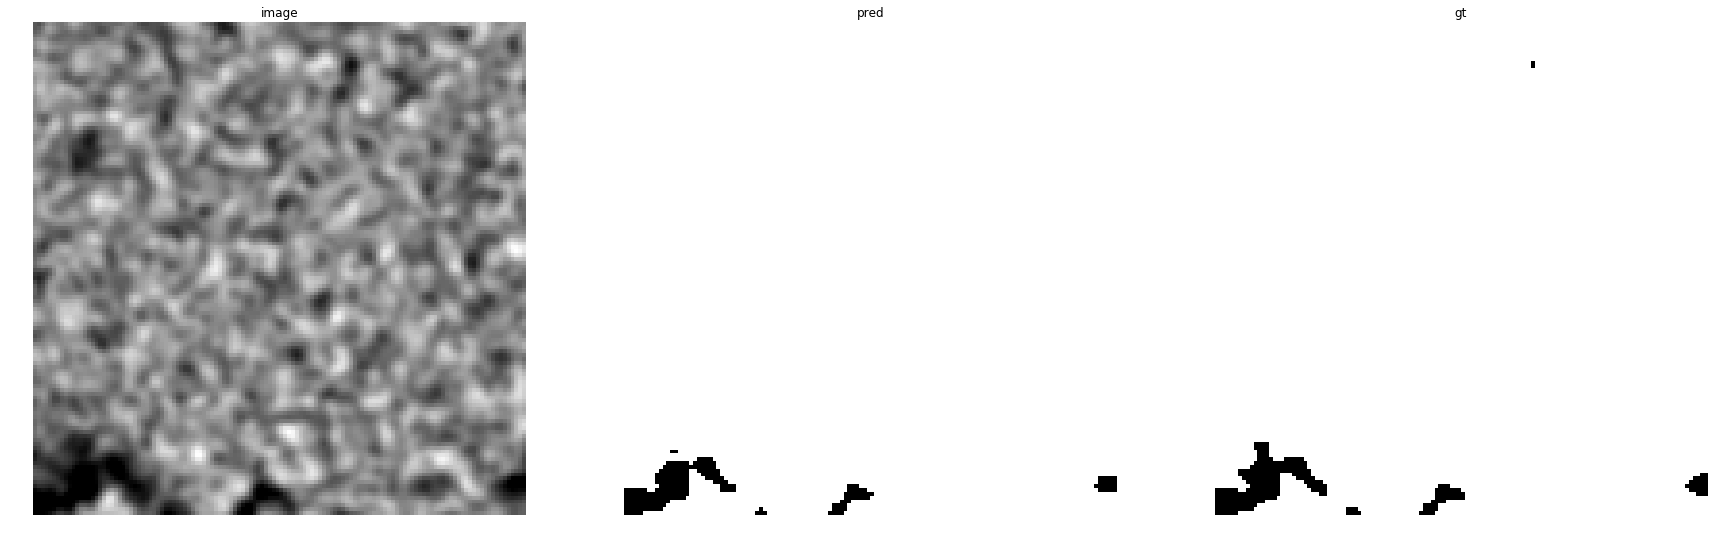

accuracy    : 0.99700927734375
precision   : 0.9970245474832631
recall      : 0.9999378302766553
f1          : 0.9984790638482788
pr_auc      : 0.9999935564064083
iou         : 0.9969627471641976


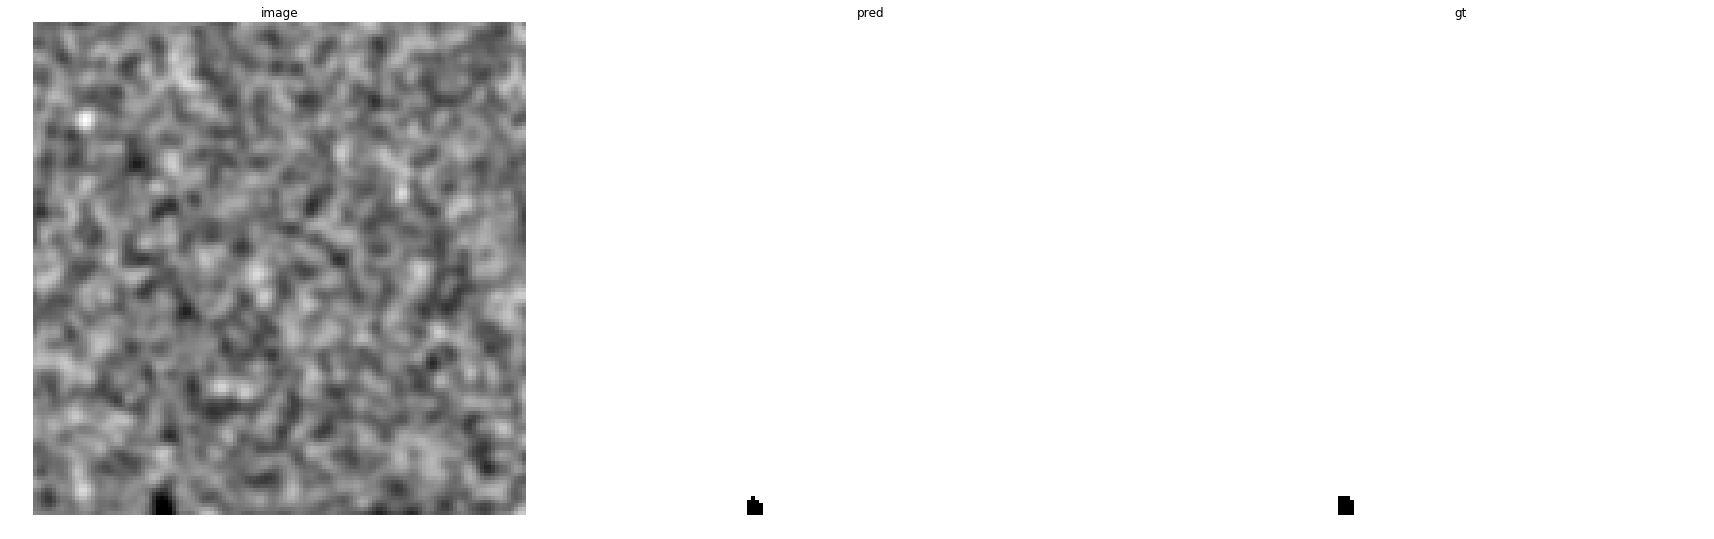

accuracy    : 0.99981689453125
precision   : 0.9998167155425219
recall      : 1.0
f1          : 0.9999083493721932
pr_auc      : 1.0
iou         : 0.9998167155425219


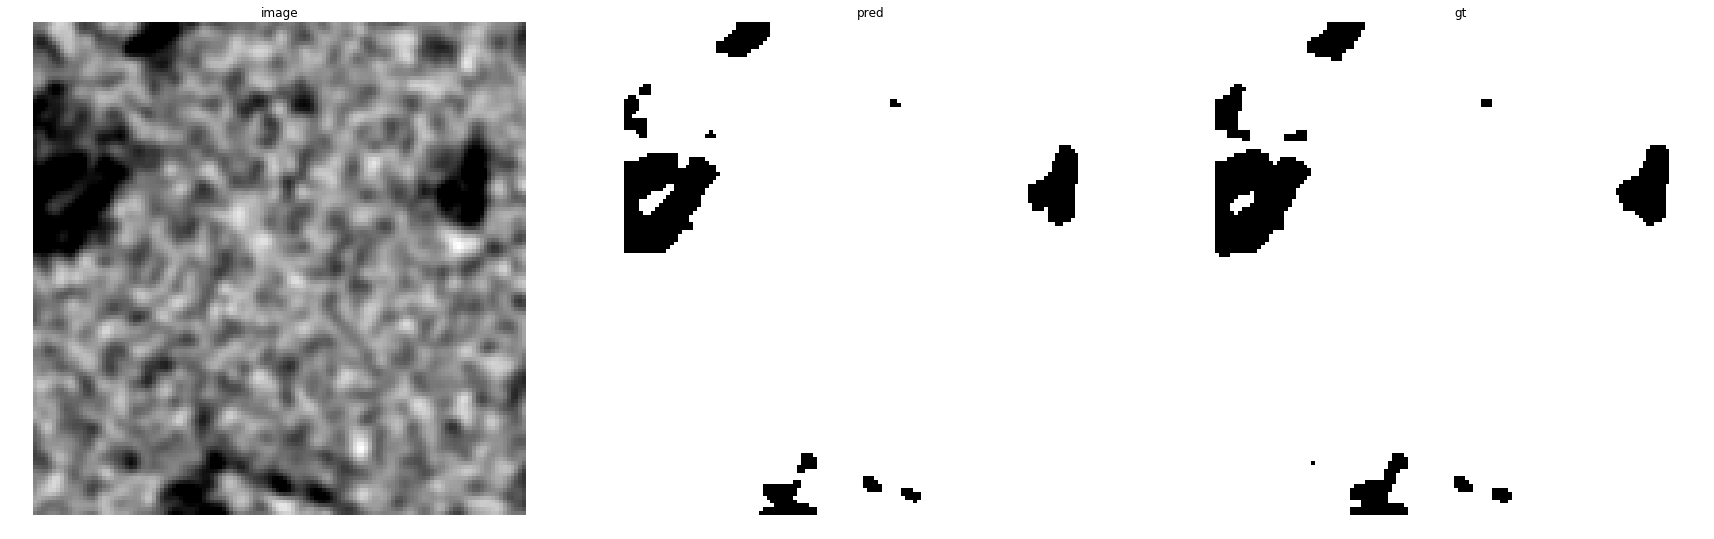

accuracy    : 0.99249267578125
precision   : 0.9921940519966453
recall      : 0.9998699778962423
f1          : 0.9960172263057344
pr_auc      : 0.9999790679814236
iou         : 0.9920660517319229


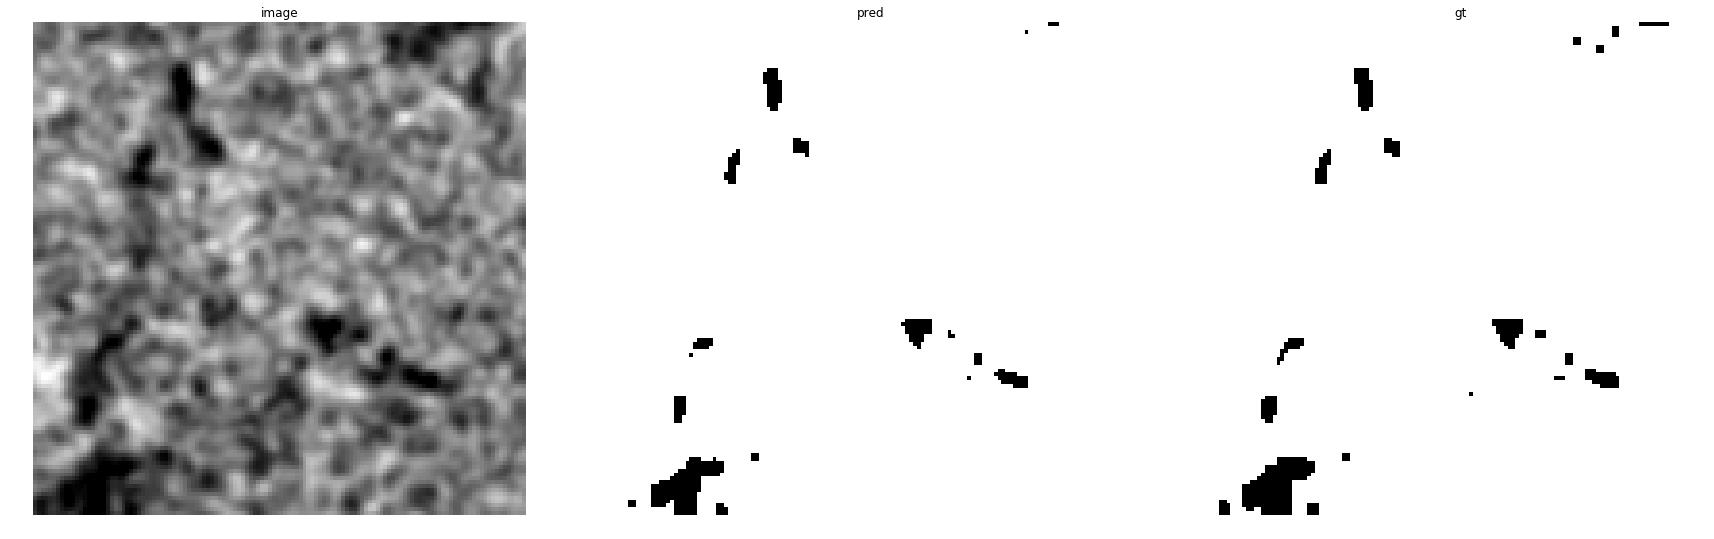

accuracy    : 0.99493408203125
precision   : 0.9948212391589193
recall      : 1.0
f1          : 0.9974038972819117
pr_auc      : 0.9999925479746996
iou         : 0.9948212391589193


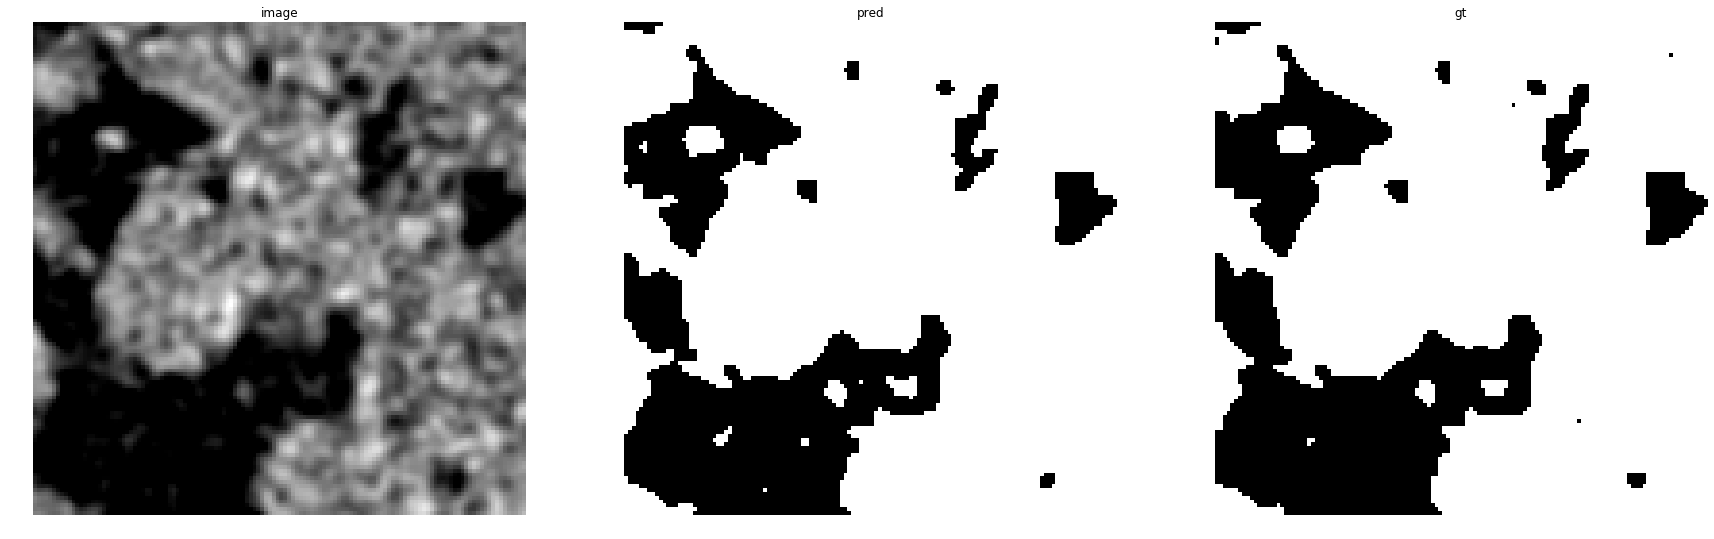

accuracy    : 0.98565673828125
precision   : 0.9812376563528638
recall      : 0.9994132931020032
f1          : 0.9902420794751485
pr_auc      : 0.9998775698927467
iou         : 0.9806727526934781


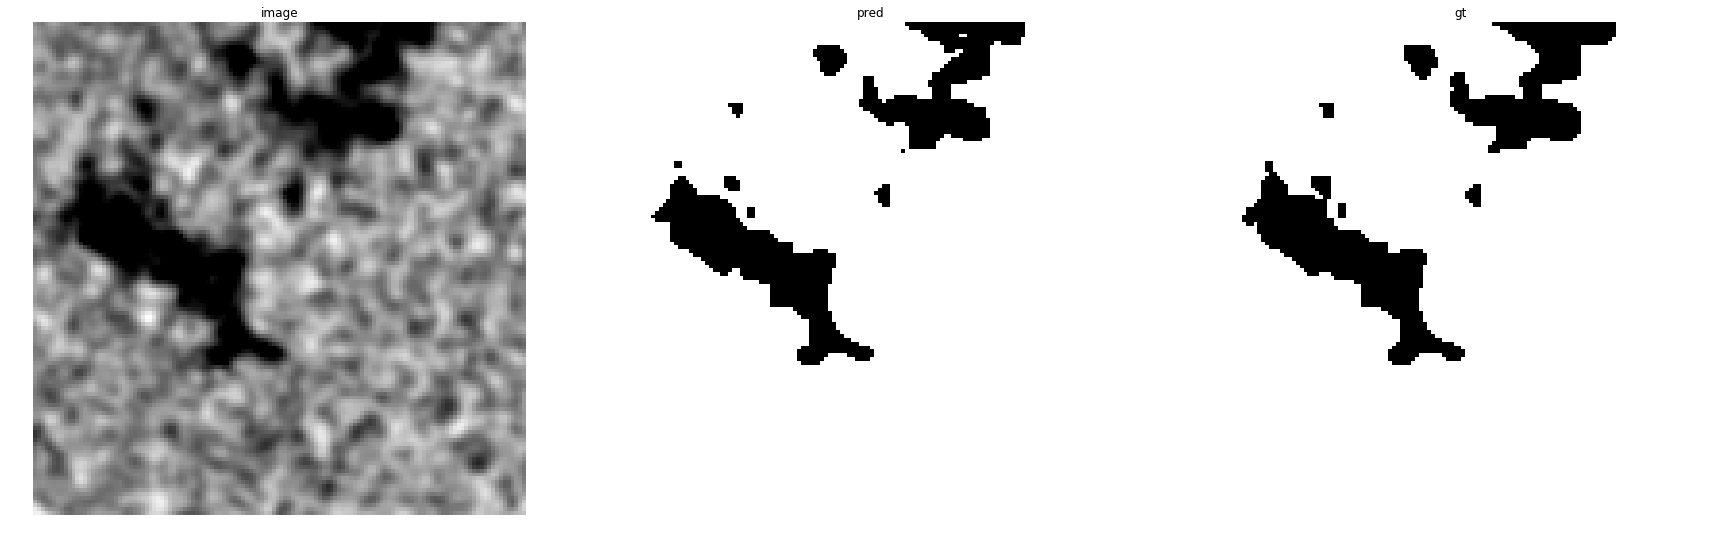

accuracy    : 0.992919921875
precision   : 0.9925780986438162
recall      : 0.9995923082149895
f1          : 0.9960728553050309
pr_auc      : 0.9999789299610842
iou         : 0.9921764348823093


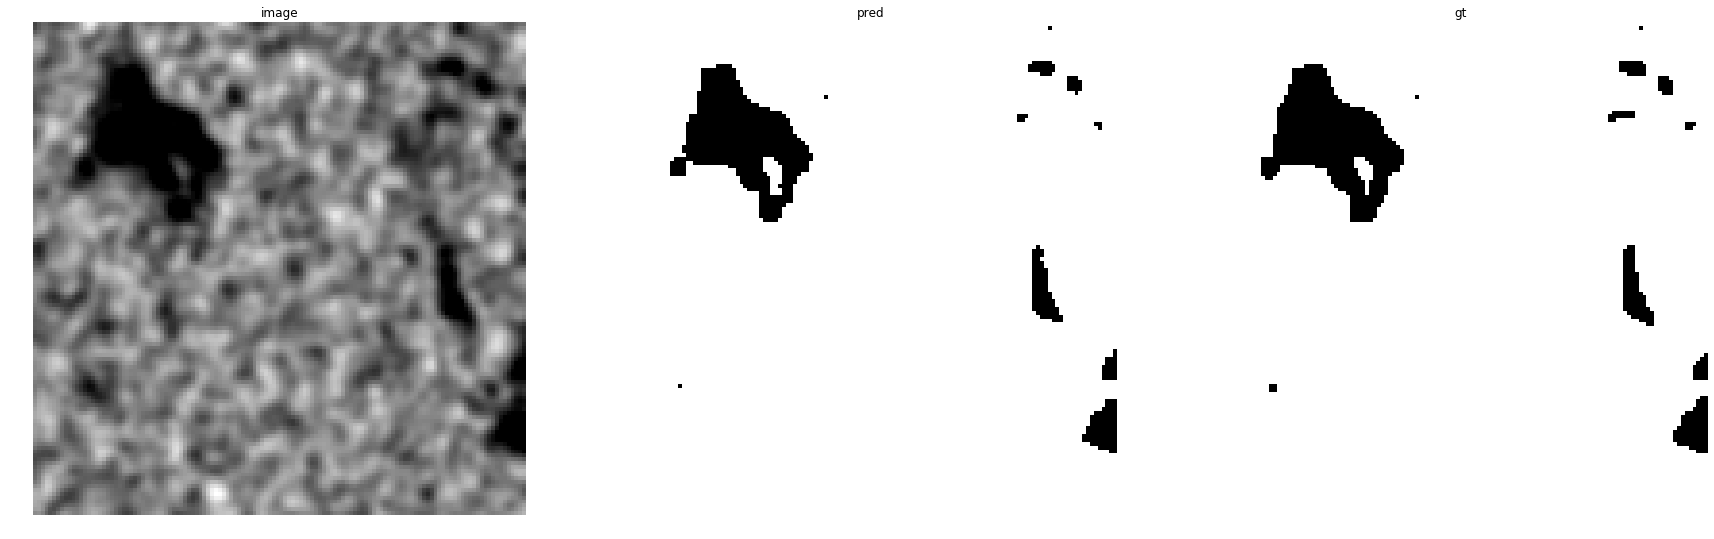

accuracy    : 0.994873046875
precision   : 0.9947562633521072
recall      : 0.999804801873902
f1          : 0.9972741433021807
pr_auc      : 0.9999880717693208
iou         : 0.9945631067961165


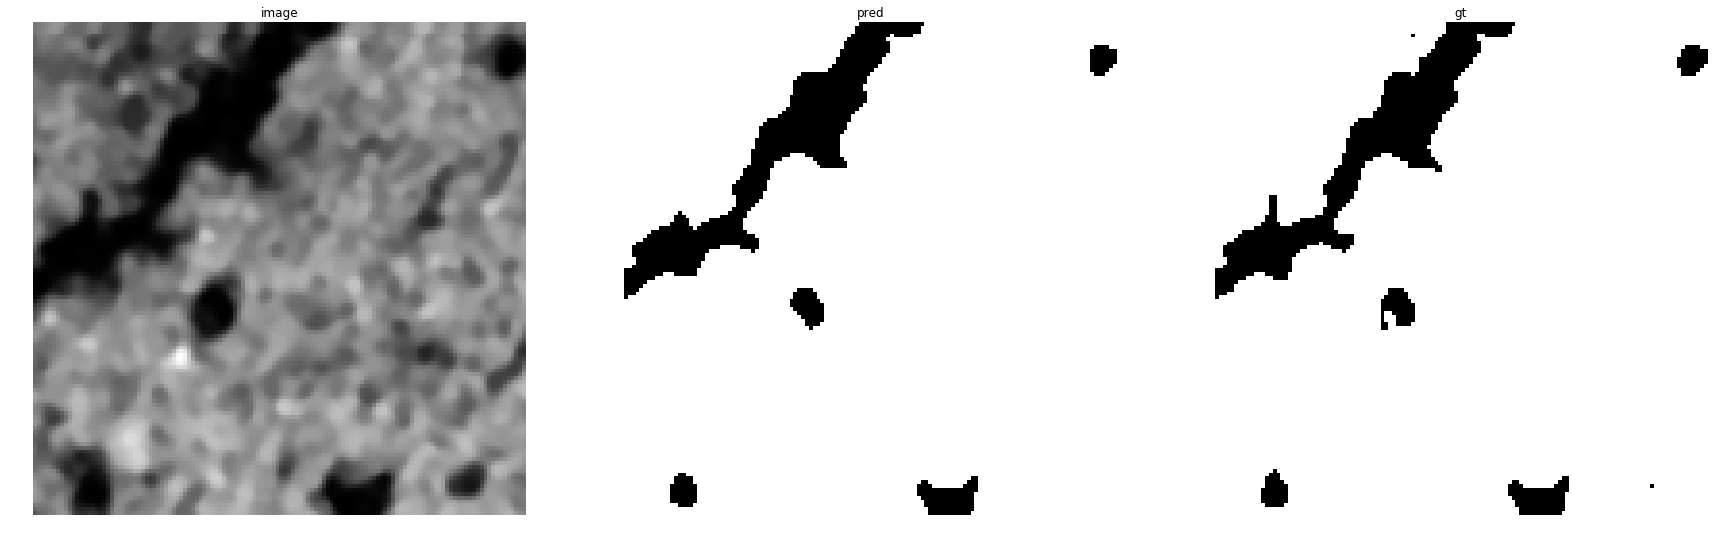

accuracy    : 0.9957275390625
precision   : 0.9966022651565623
recall      : 0.9987314728268126
f1          : 0.9976657329598505
pr_auc      : 0.9999724591292699
iou         : 0.9953423381462506


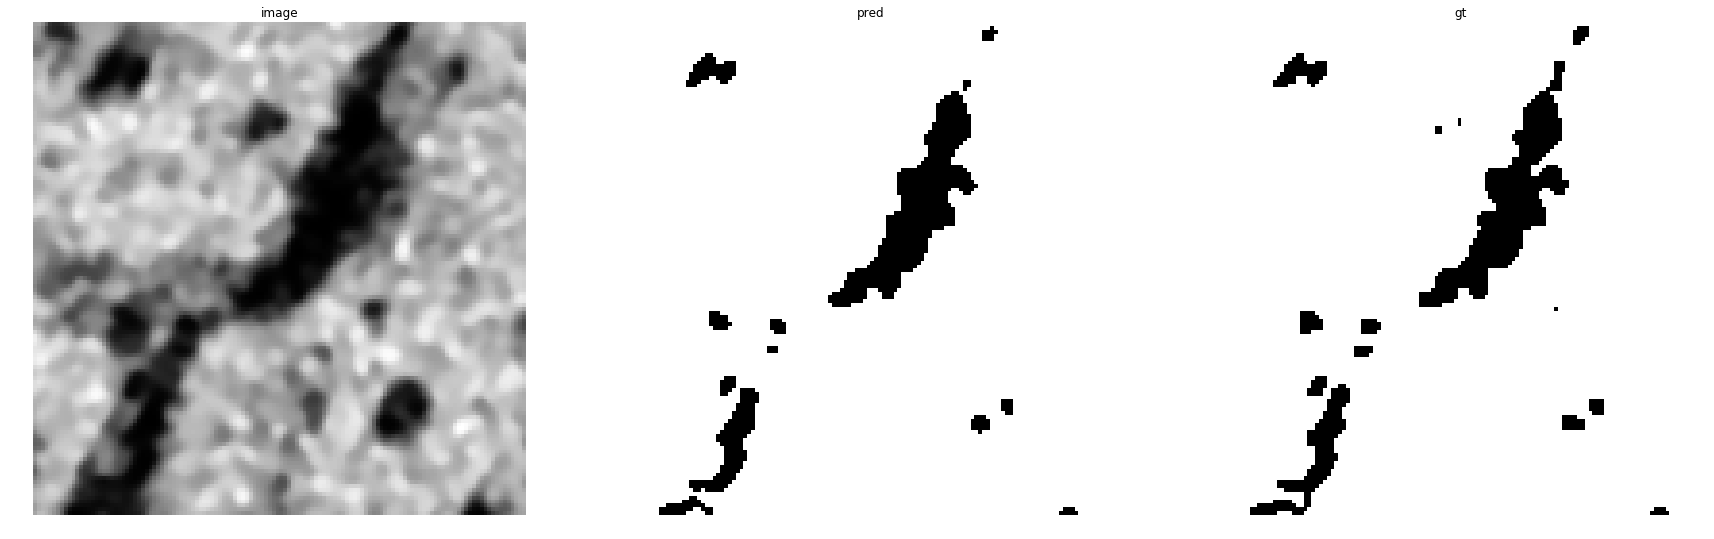

accuracy    : 0.99041748046875
precision   : 0.991837534282356
recall      : 0.9978976414164641
f1          : 0.9948583592598658
pr_auc      : 0.9999306815890673
iou         : 0.9897693209956993


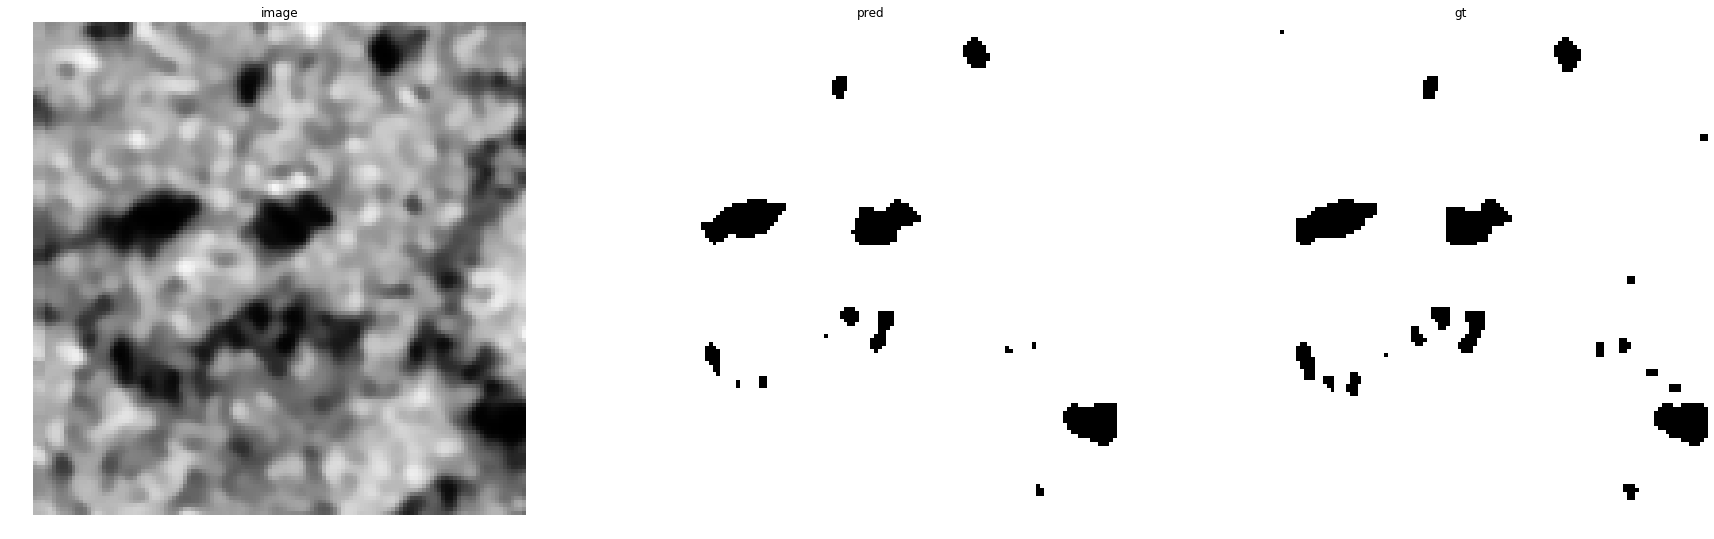

accuracy    : 0.9920654296875
precision   : 0.9924769250221267
recall      : 0.9992998090388288
f1          : 0.9958766810454199
pr_auc      : 0.999965951773178
iou         : 0.991787225977636


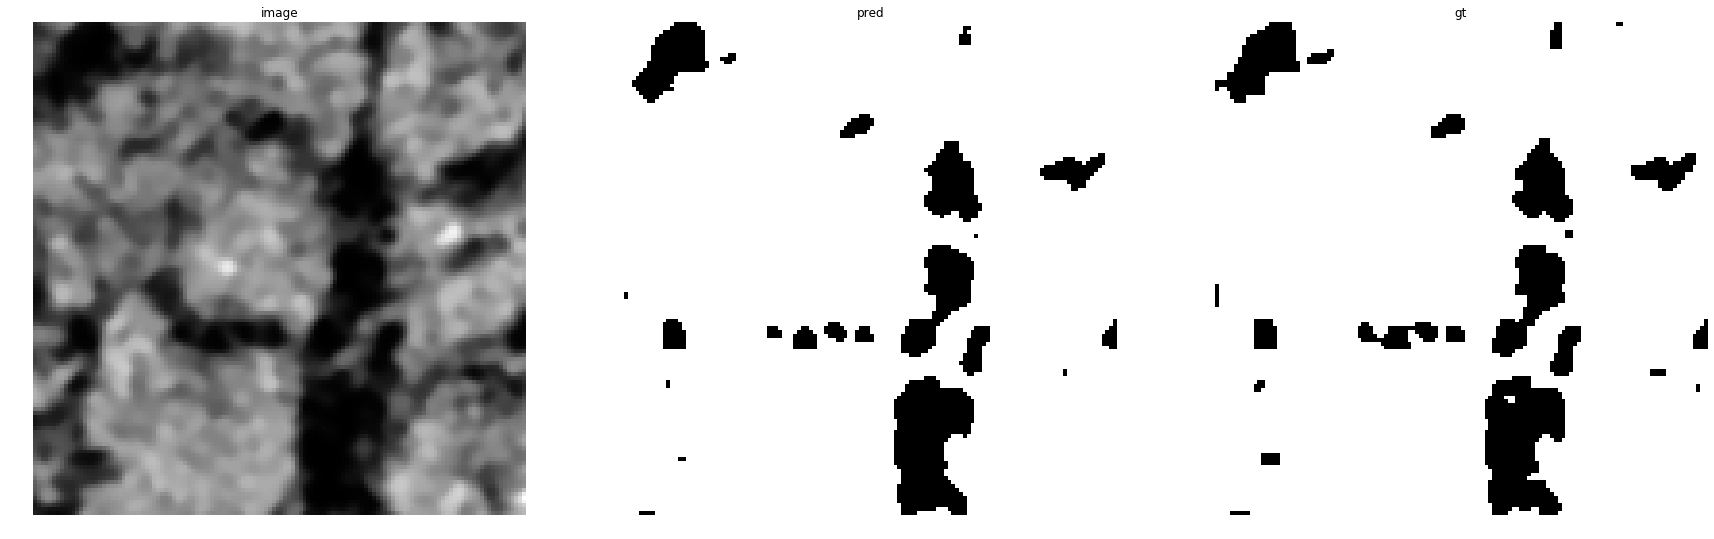

accuracy    : 0.98883056640625
precision   : 0.9890414665494148
recall      : 0.9985657697035925
f1          : 0.9937807986406118
pr_auc      : 0.9999096704876468
iou         : 0.987638476087544


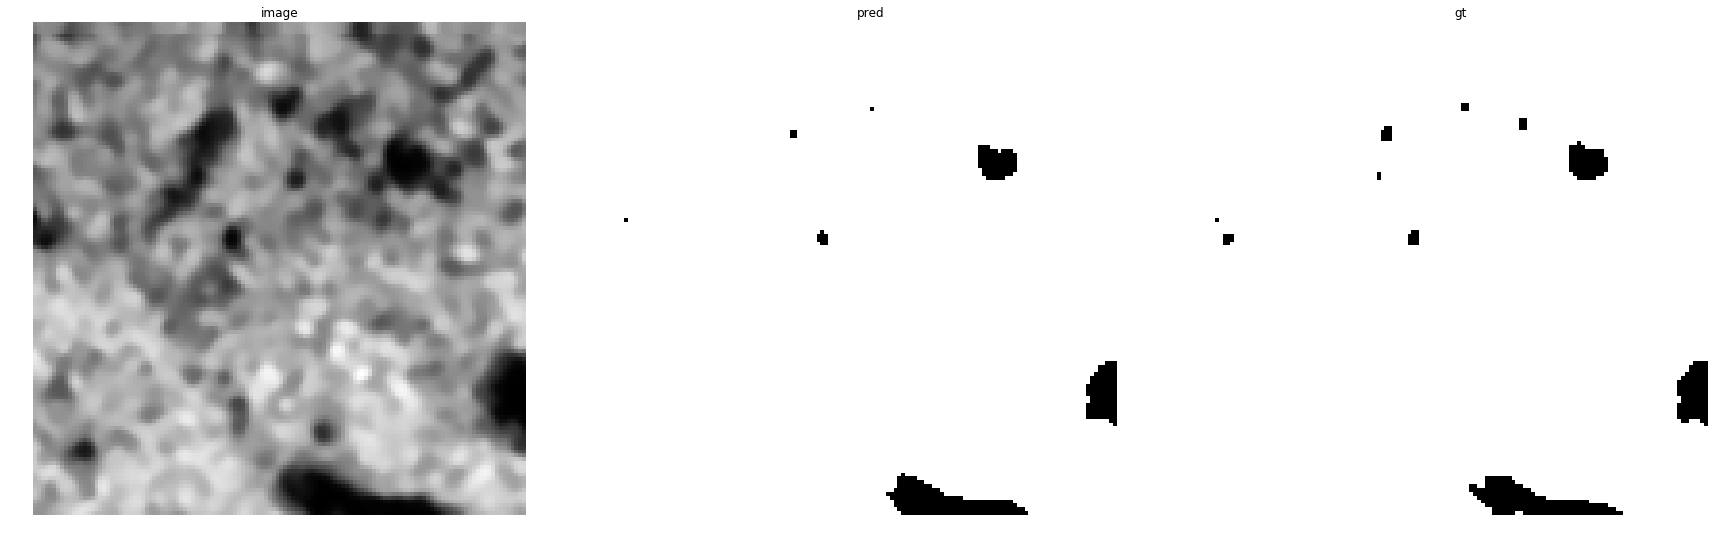

accuracy    : 0.99627685546875
precision   : 0.9968736322140936
recall      : 0.9993105177384982
f1          : 0.9980905875356059
pr_auc      : 0.9999914880596704
iou         : 0.9961884528867783


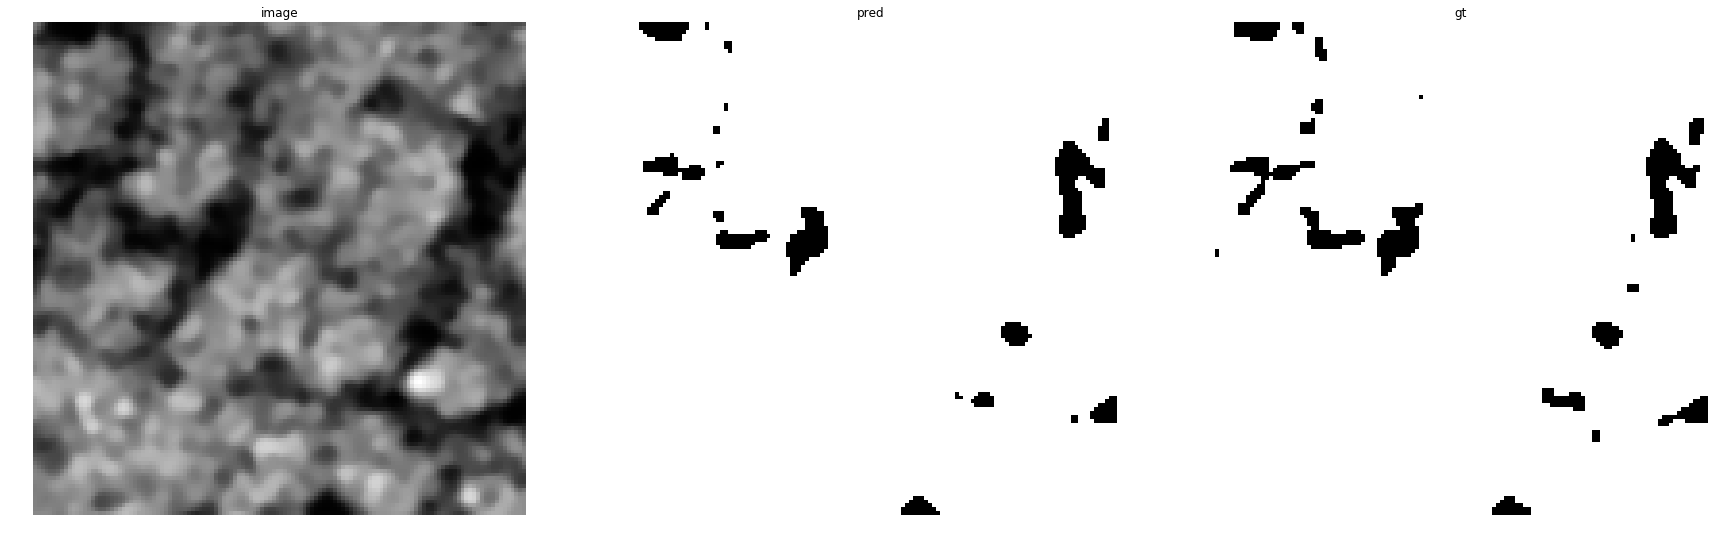

accuracy    : 0.98919677734375
precision   : 0.9893285904846598
recall      : 0.9994224845995893
f1          : 0.9943499217927027
pr_auc      : 0.999945201236626
iou         : 0.9887633316404266


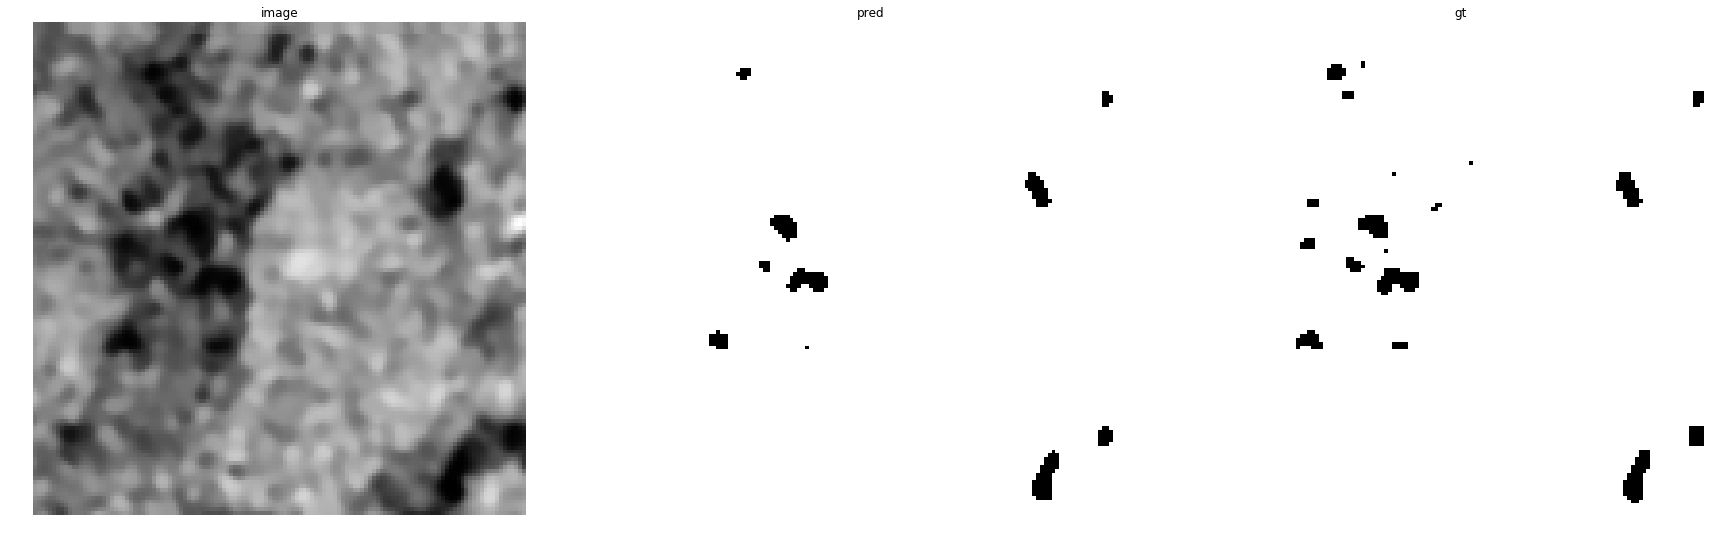

accuracy    : 0.994873046875
precision   : 0.9949241720829465
recall      : 0.9998755832037325
f1          : 0.9973937325473161
pr_auc      : 0.9999809208806573
iou         : 0.9948010150399208


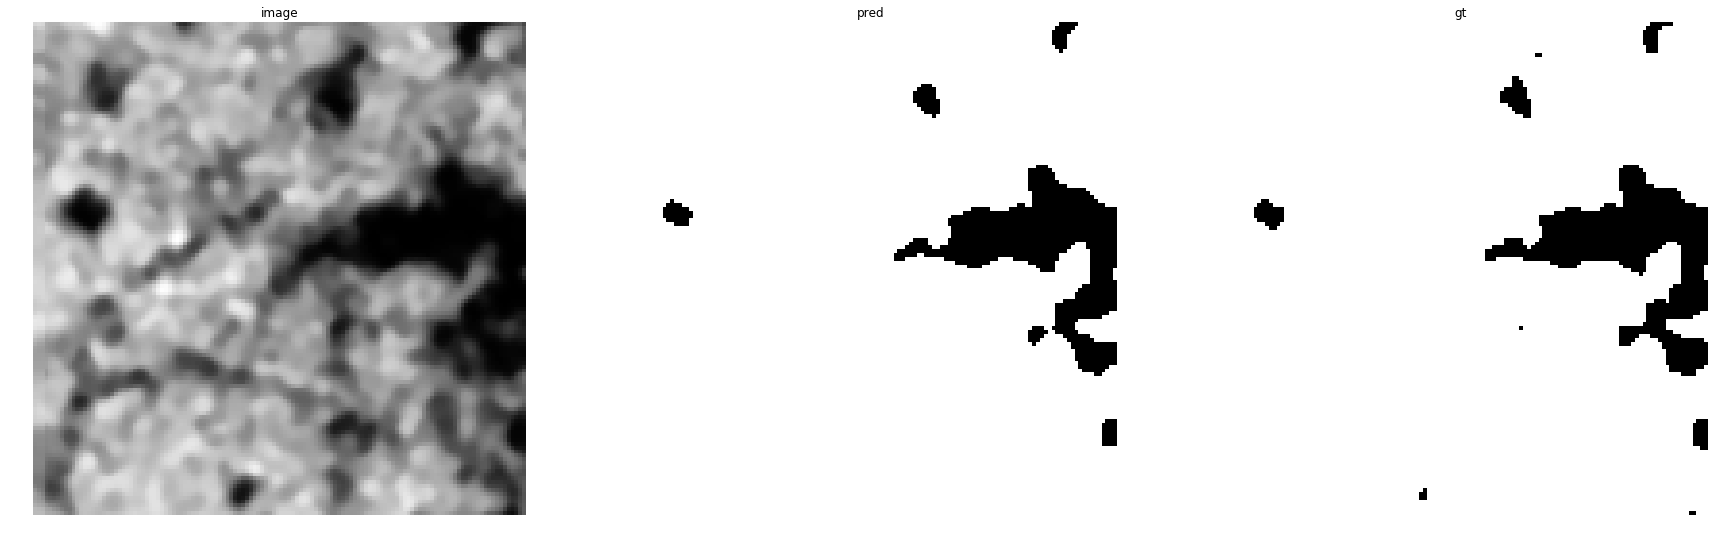

accuracy    : 0.99456787109375
precision   : 0.9951948393891522
recall      : 0.9989428477039973
f1          : 0.9970653213308273
pr_auc      : 0.9999795208145179
iou         : 0.9941478169384534


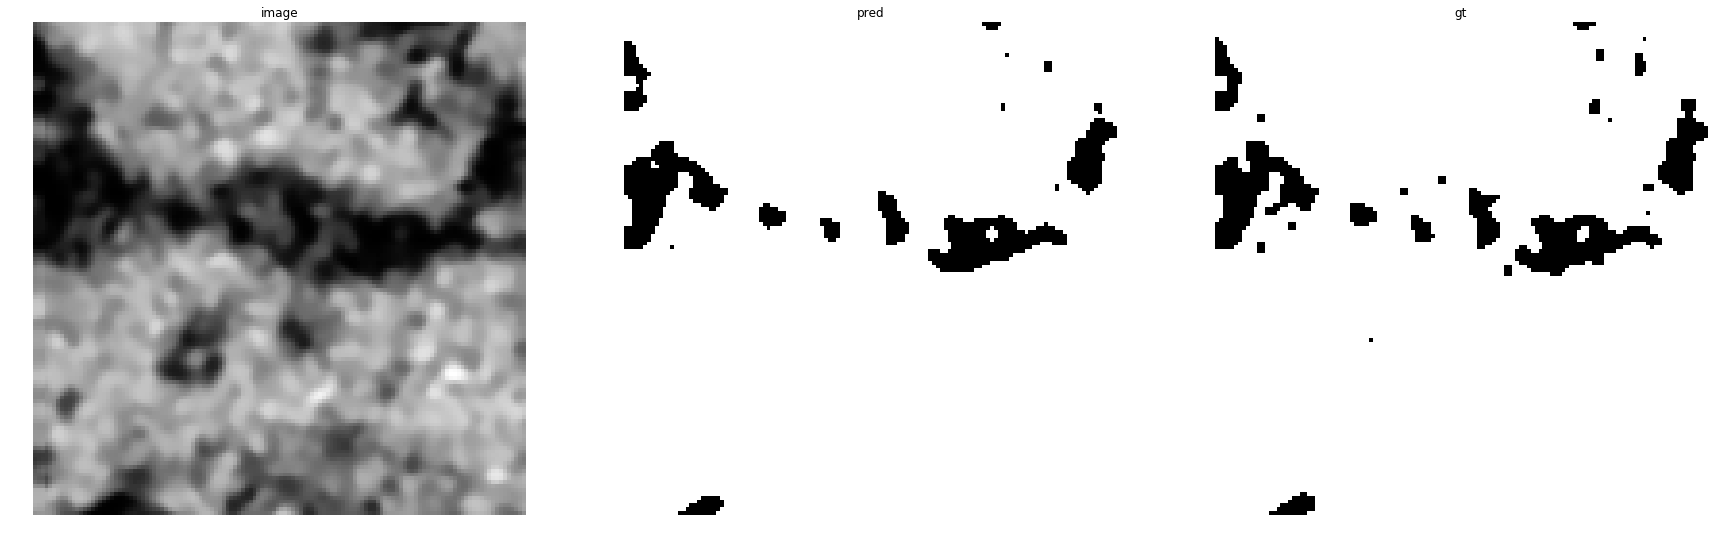

accuracy    : 0.98858642578125
precision   : 0.9893110864889526
recall      : 0.9984870411787923
f1          : 0.9938778850875757
pr_auc      : 0.999904005088256
iou         : 0.9878302746323051


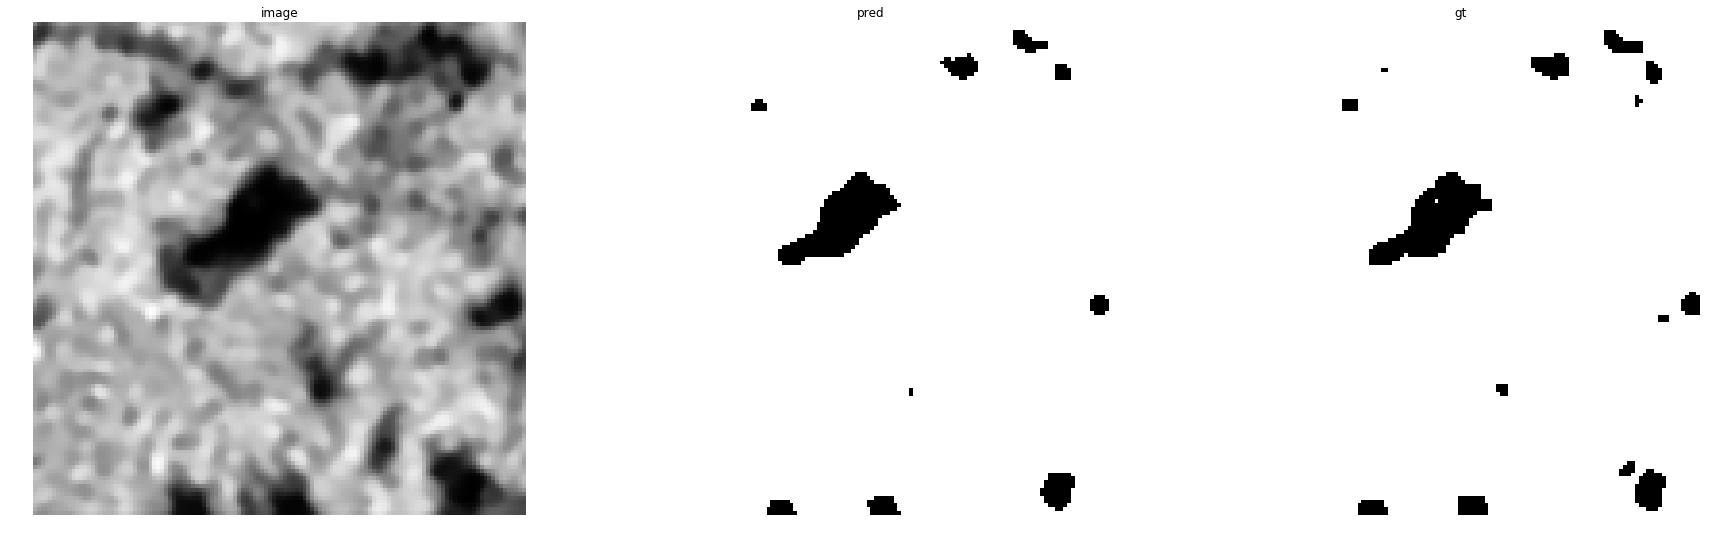

accuracy    : 0.99462890625
precision   : 0.9950611030203255
recall      : 0.9993640699523052
f1          : 0.9972079446665397
pr_auc      : 0.9999832629839829
iou         : 0.994431437068911


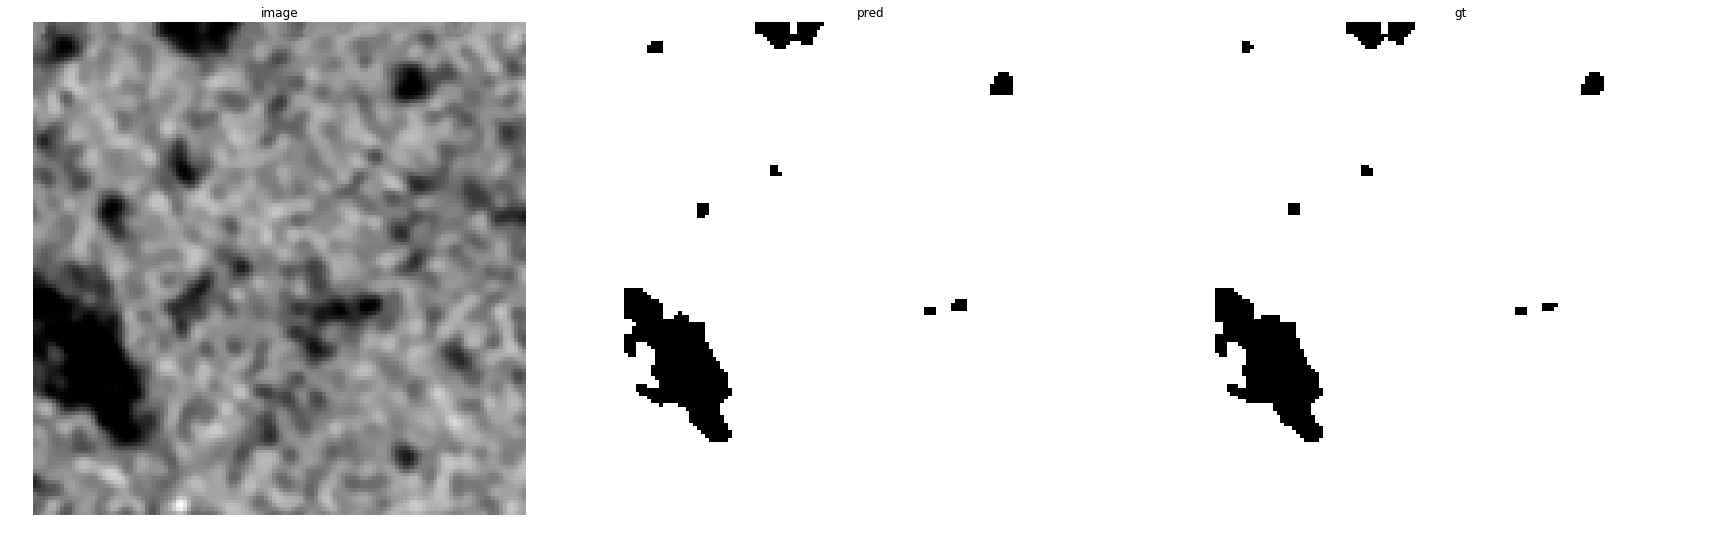

accuracy    : 0.99786376953125
precision   : 0.999169169808909
recall      : 0.9985947879407256
f1          : 0.9988818963038686
pr_auc      : 0.9999972781904154
iou         : 0.9977662901270024


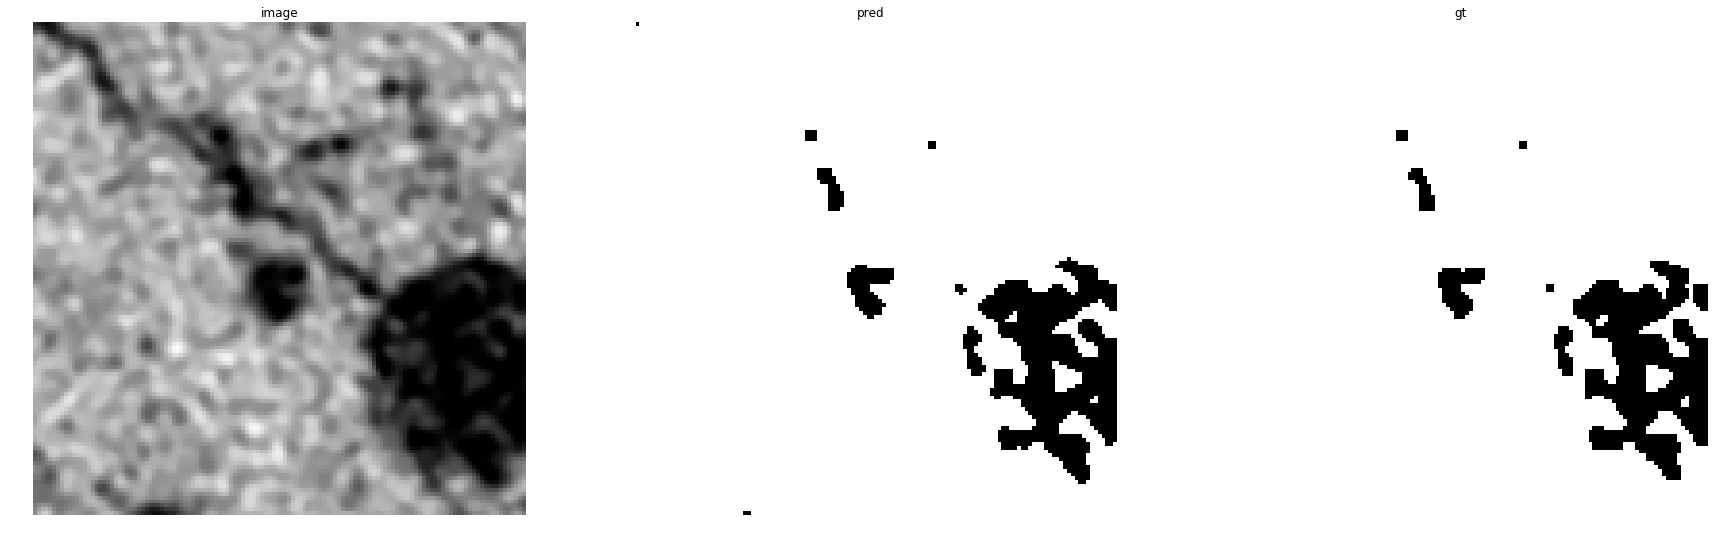

accuracy    : 0.994873046875
precision   : 0.9984732824427481
recall      : 0.995961067337615
f1          : 0.9972155926809865
pr_auc      : 0.9999820990130349
iou         : 0.9944466481554939


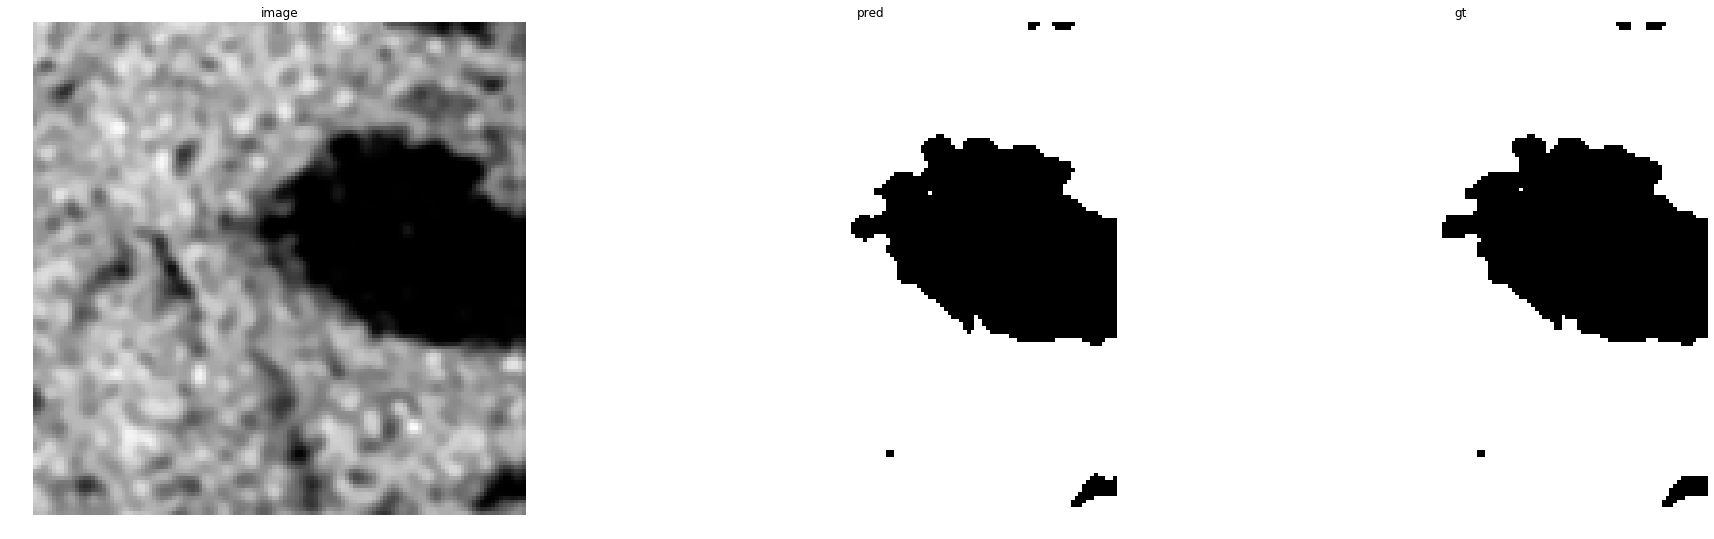

accuracy    : 0.9971923828125
precision   : 0.9981143022918479
recall      : 0.9985488318096067
f1          : 0.9983315197678636
pr_auc      : 0.9999924636121602
iou         : 0.9966685979142526


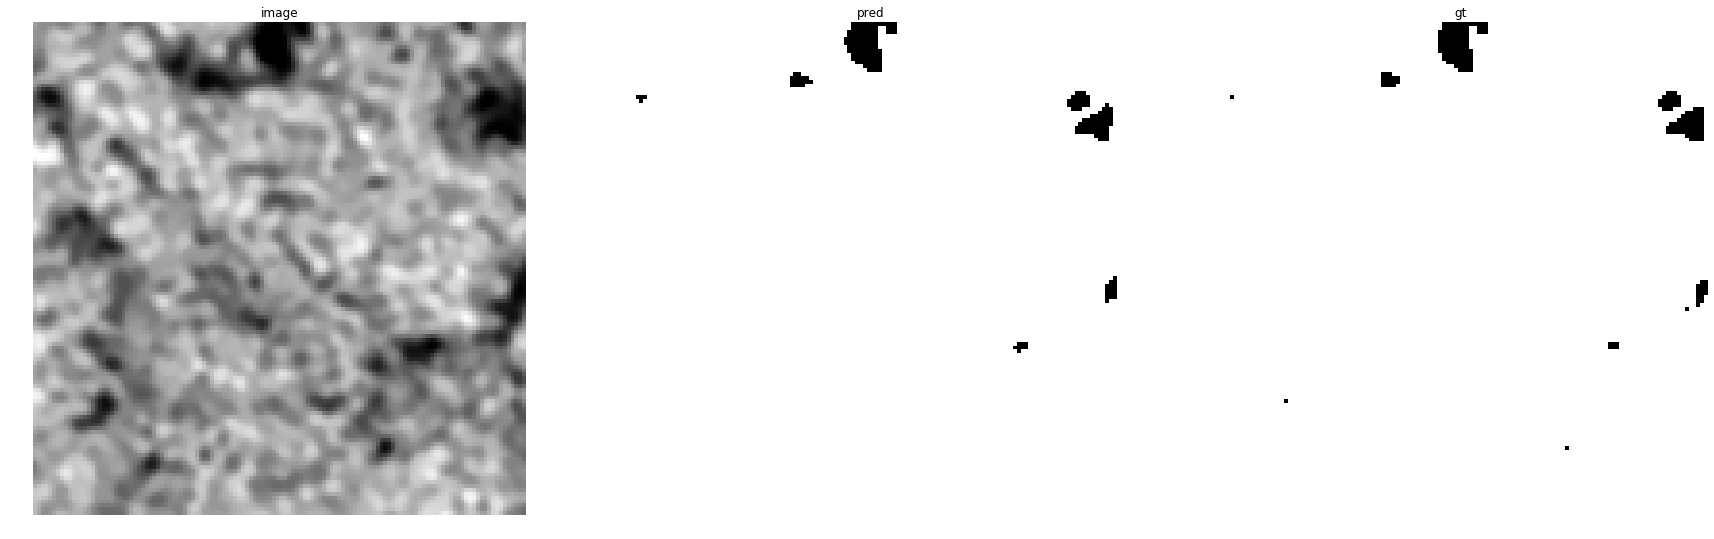

accuracy    : 0.99859619140625
precision   : 0.9993189697870233
recall      : 0.99925710394354
f1          : 0.9992880359077542
pr_auc      : 0.9999976633838599
iou         : 0.9985770848799802


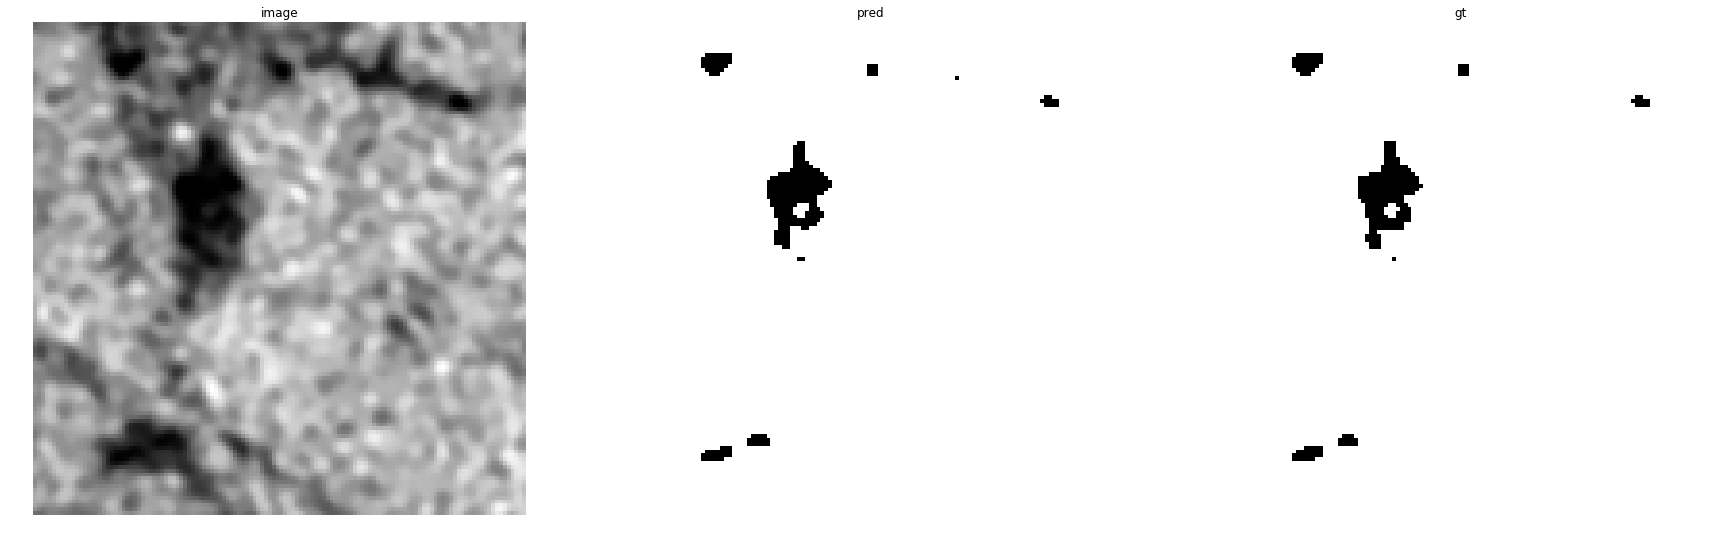

accuracy    : 0.998291015625
precision   : 0.9991901825204011
recall      : 0.9990657116163189
f1          : 0.9991279431917278
pr_auc      : 0.9999966134866795
iou         : 0.9982574060243963


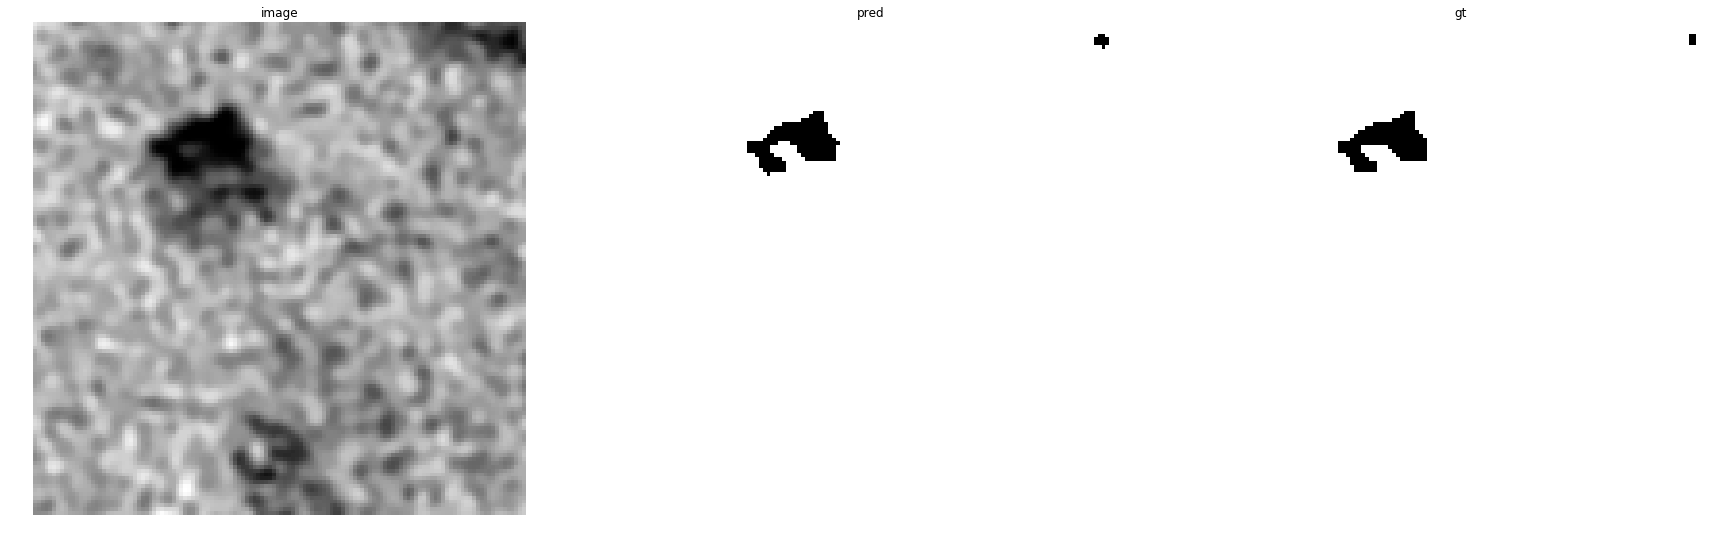

accuracy    : 0.998779296875
precision   : 0.9996291947345652
recall      : 0.9991352152696276
f1          : 0.9993821439604572
pr_auc      : 0.9999992979382991
iou         : 0.9987650509416487


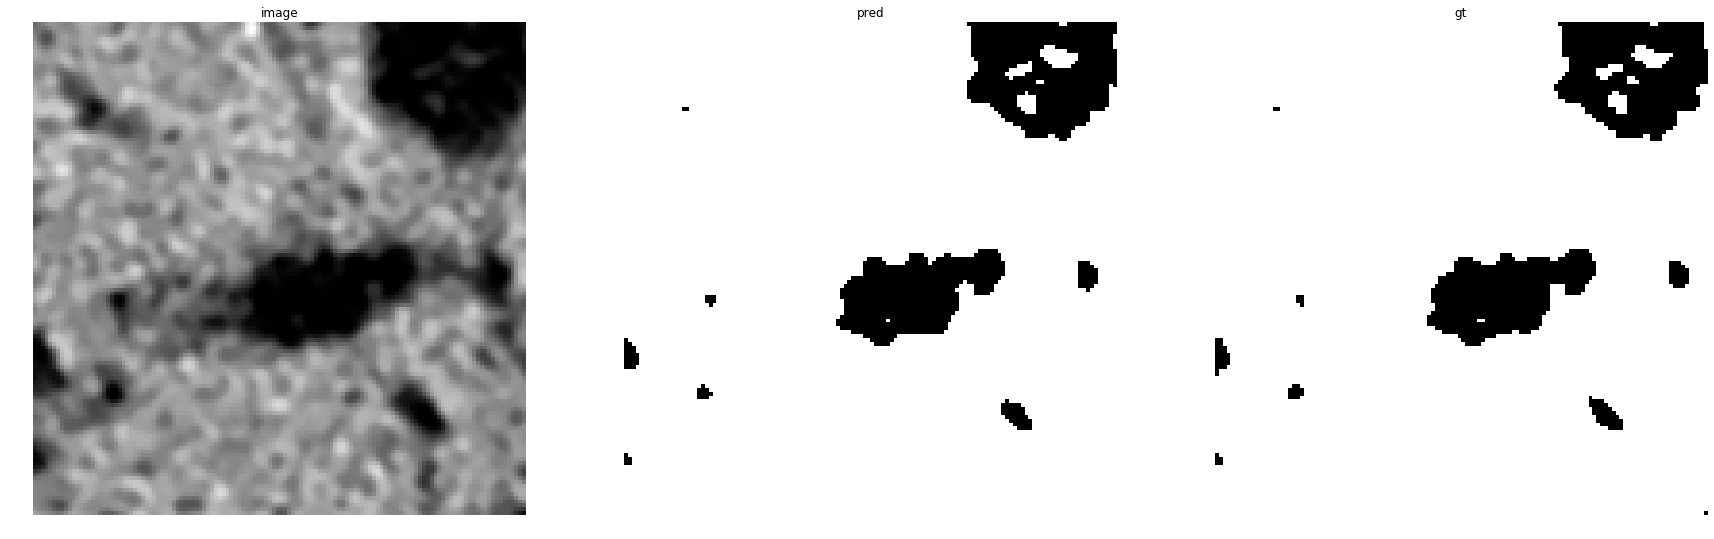

accuracy    : 0.99517822265625
precision   : 0.9971436343852013
recall      : 0.9974828219606776
f1          : 0.9973131993334013
pr_auc      : 0.9999810173486366
iou         : 0.9946407977749135


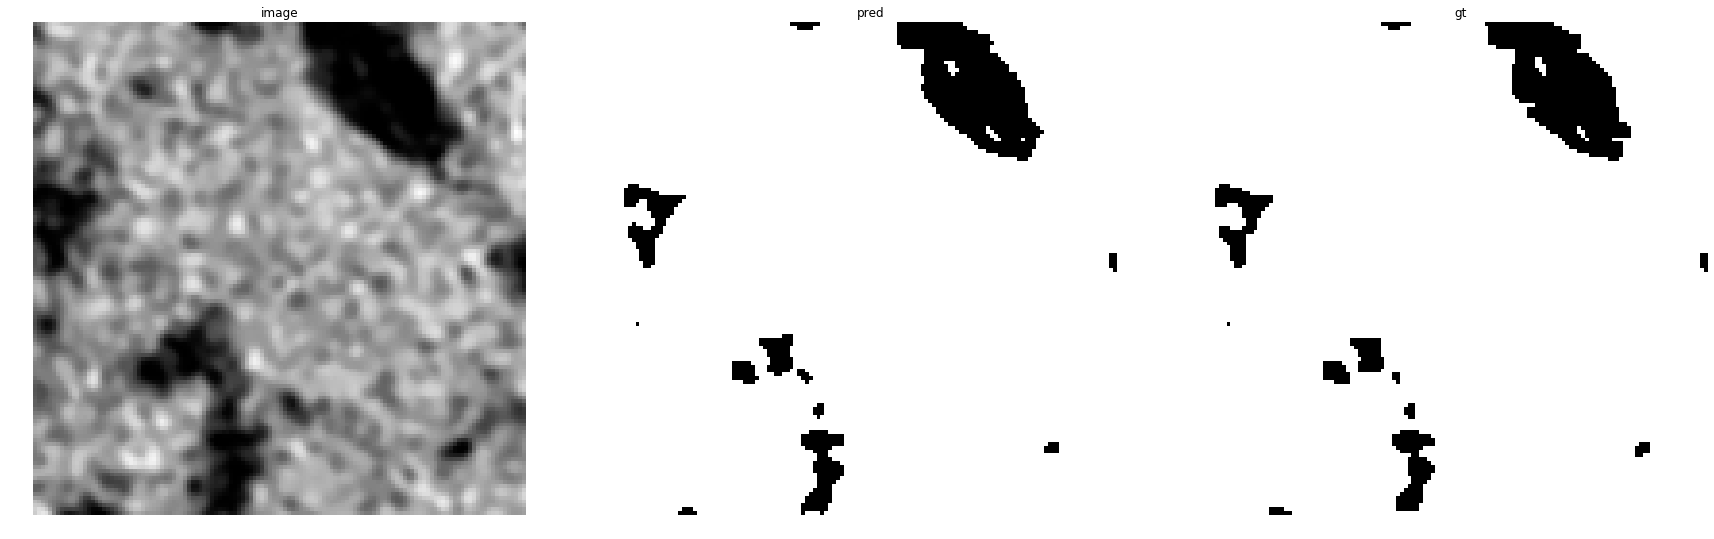

accuracy    : 0.99554443359375
precision   : 0.9983555877129514
recall      : 0.9968474977013004
f1          : 0.9976009727562523
pr_auc      : 0.9999804443457109
iou         : 0.995213428627631


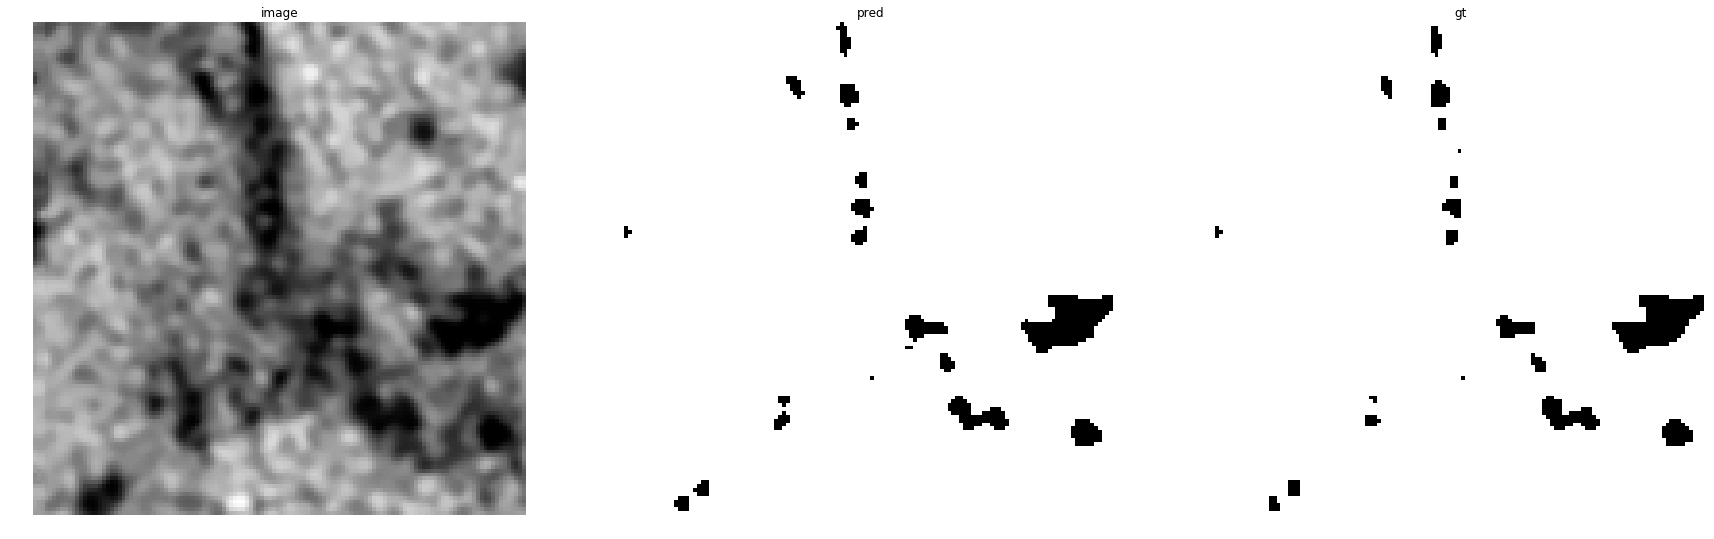

accuracy    : 0.9962158203125
precision   : 0.998989388580091
recall      : 0.9970999873912495
f1          : 0.9980437937780022
pr_auc      : 0.9999904895440741
iou         : 0.9960952260990049


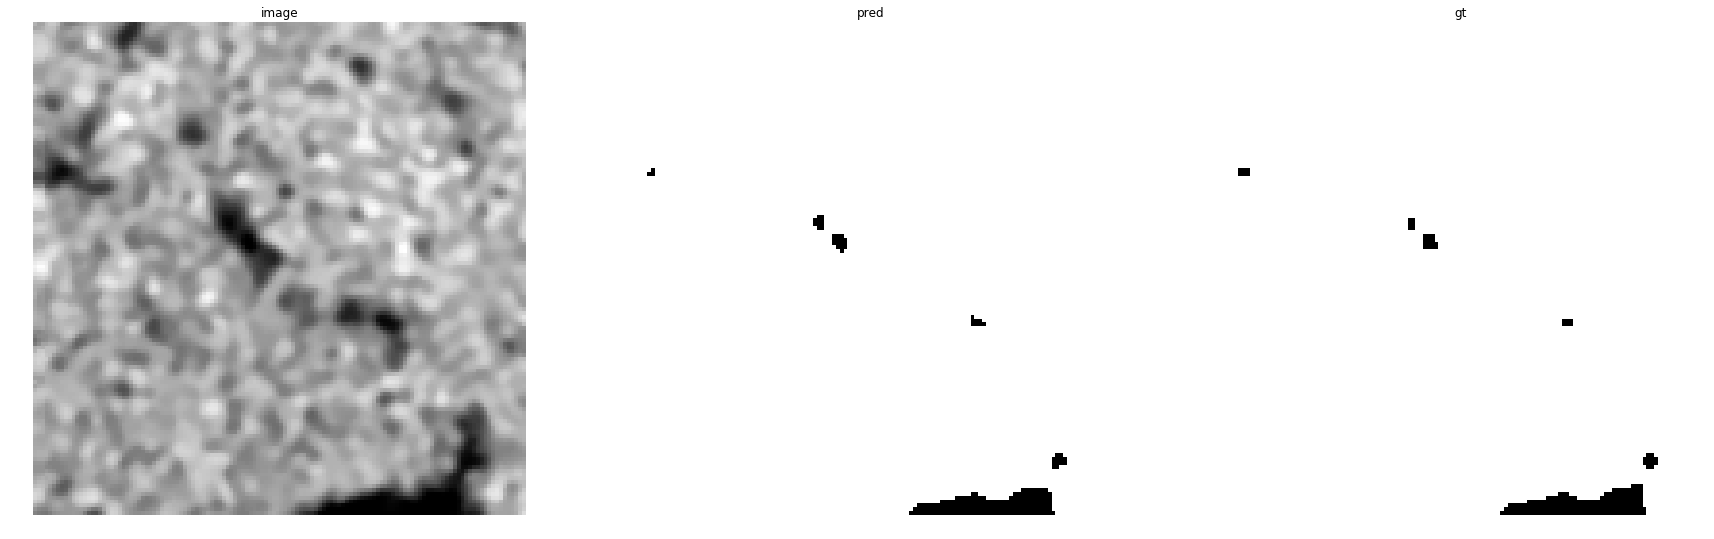

accuracy    : 0.99871826171875
precision   : 0.9992574257425743
recall      : 0.9994429658971343
f1          : 0.9993501872079711
pr_auc      : 0.9999987357150029
iou         : 0.9987012183808522


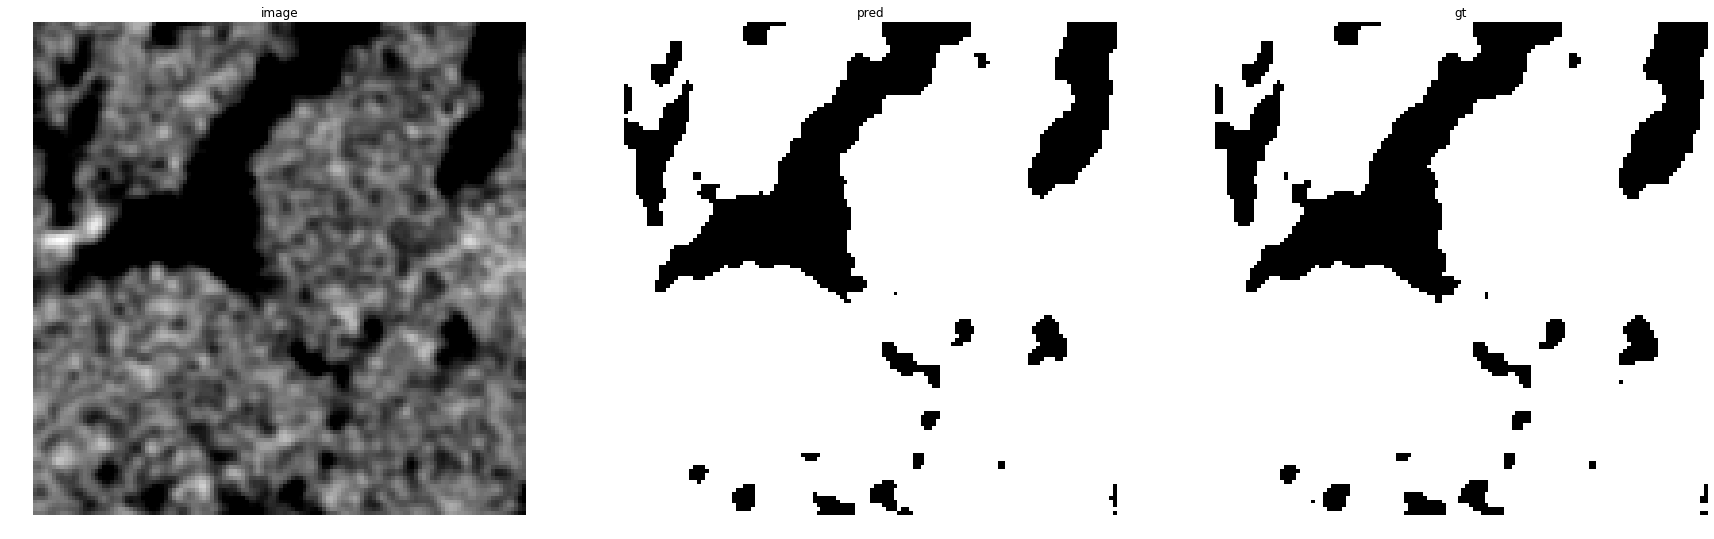

accuracy    : 0.99127197265625
precision   : 0.9903138609400811
recall      : 0.998939634931455
f1          : 0.9946080464537538
pr_auc      : 0.999944861494744
iou         : 0.9892739273927392


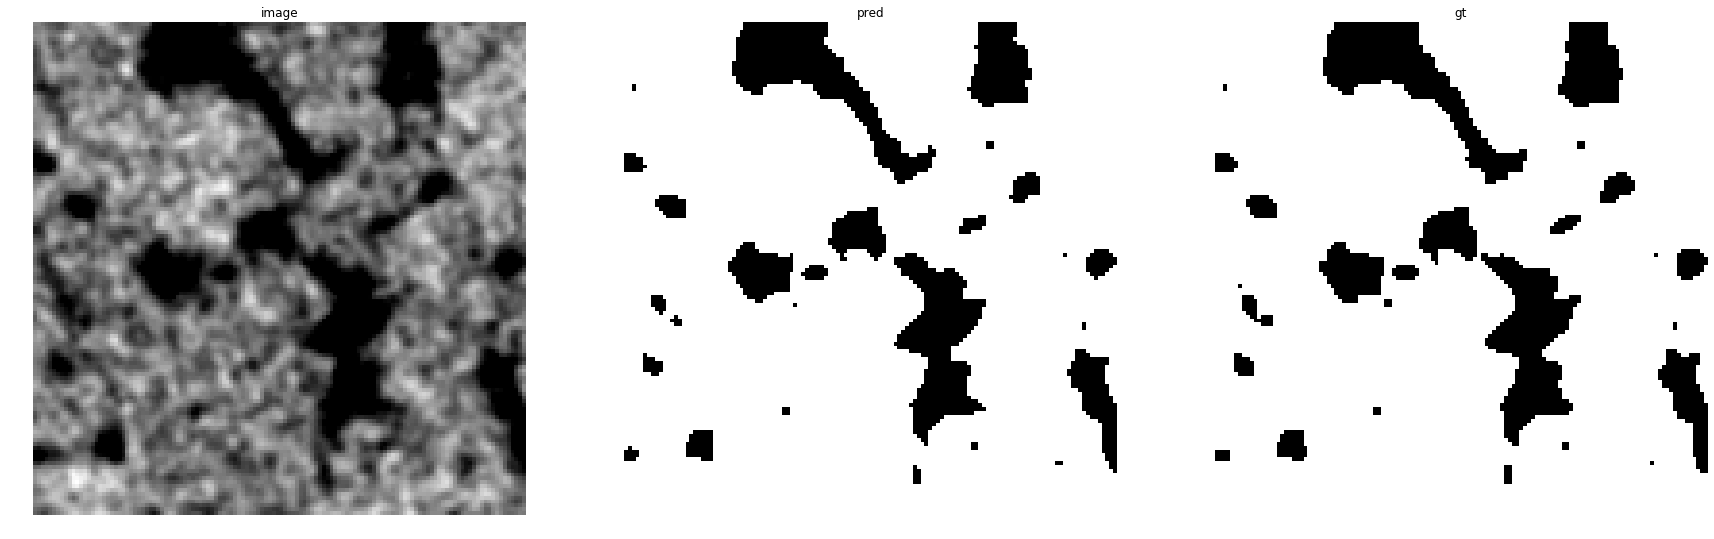

accuracy    : 0.9906005859375
precision   : 0.9903729587106895
recall      : 0.9986337815488603
f1          : 0.994486215538847
pr_auc      : 0.9999409348026989
iou         : 0.9890329012961117


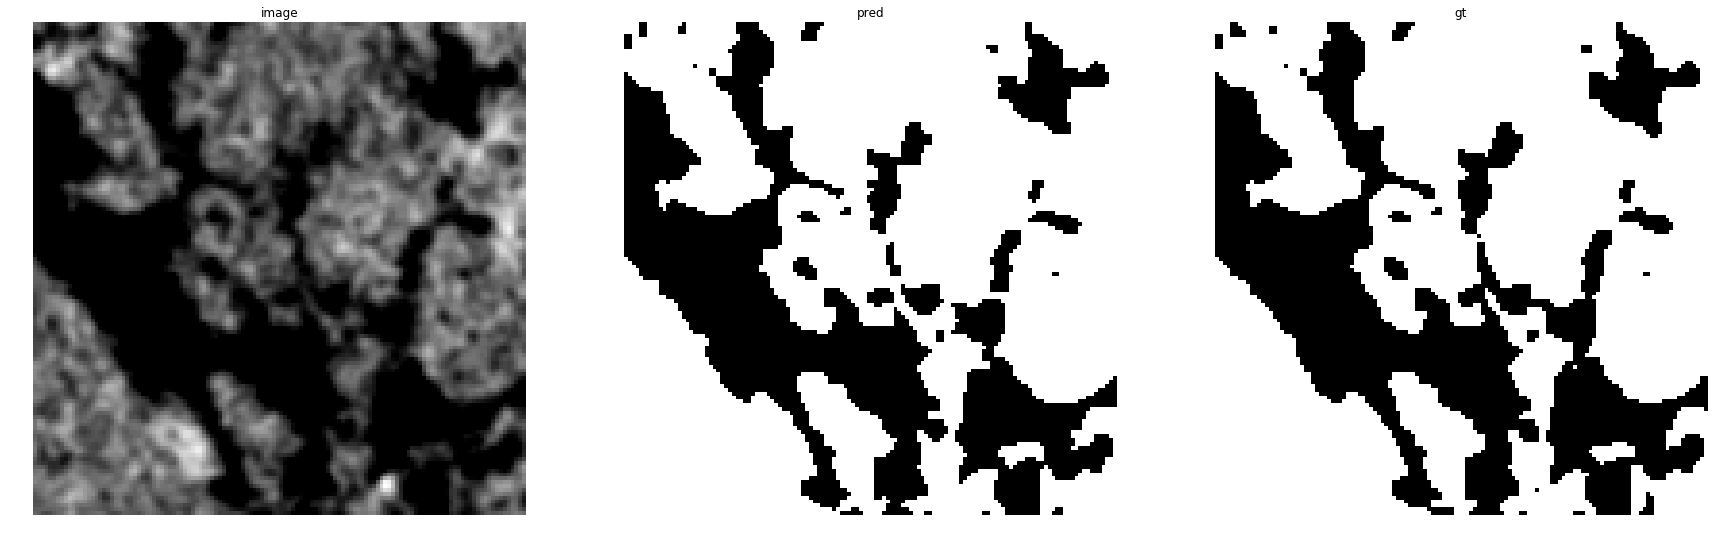

accuracy    : 0.981201171875
precision   : 0.9738687061822817
recall      : 0.9980404964075767
f1          : 0.9858064516129033
pr_auc      : 0.9996542146691855
iou         : 0.9720101781170484


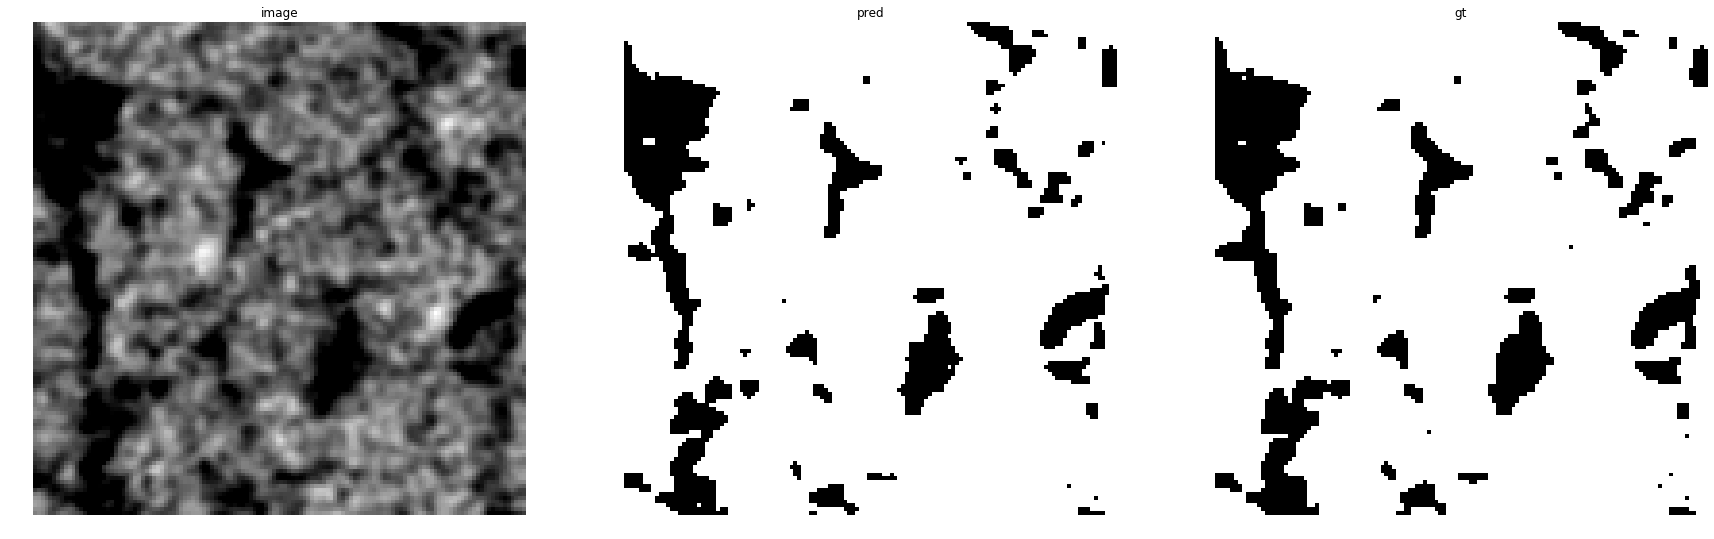

accuracy    : 0.9842529296875
precision   : 0.9821837435603893
recall      : 0.9993447874199185
f1          : 0.9906899538106236
pr_auc      : 0.9998561943241497
iou         : 0.9815516624955309


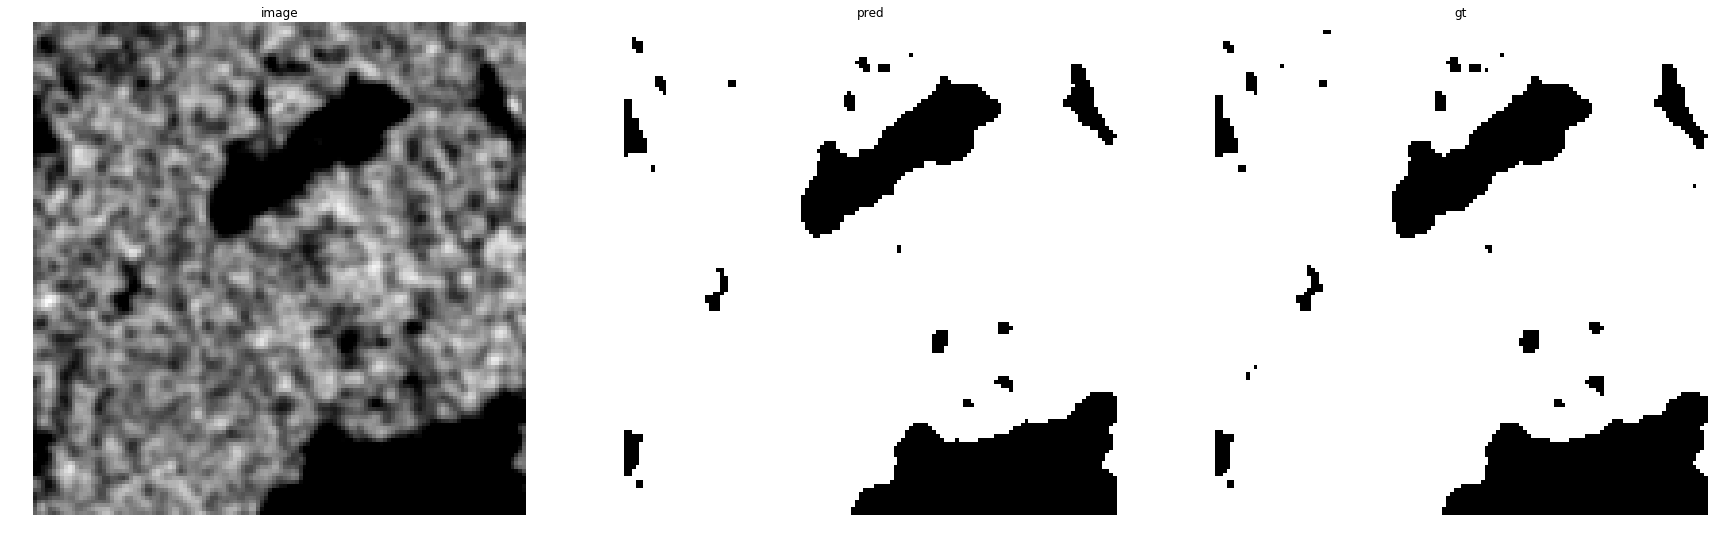

accuracy    : 0.99395751953125
precision   : 0.9932476584622086
recall      : 0.9995615957913196
f1          : 0.9963946247132088
pr_auc      : 0.99997999382466
iou         : 0.992815153494448


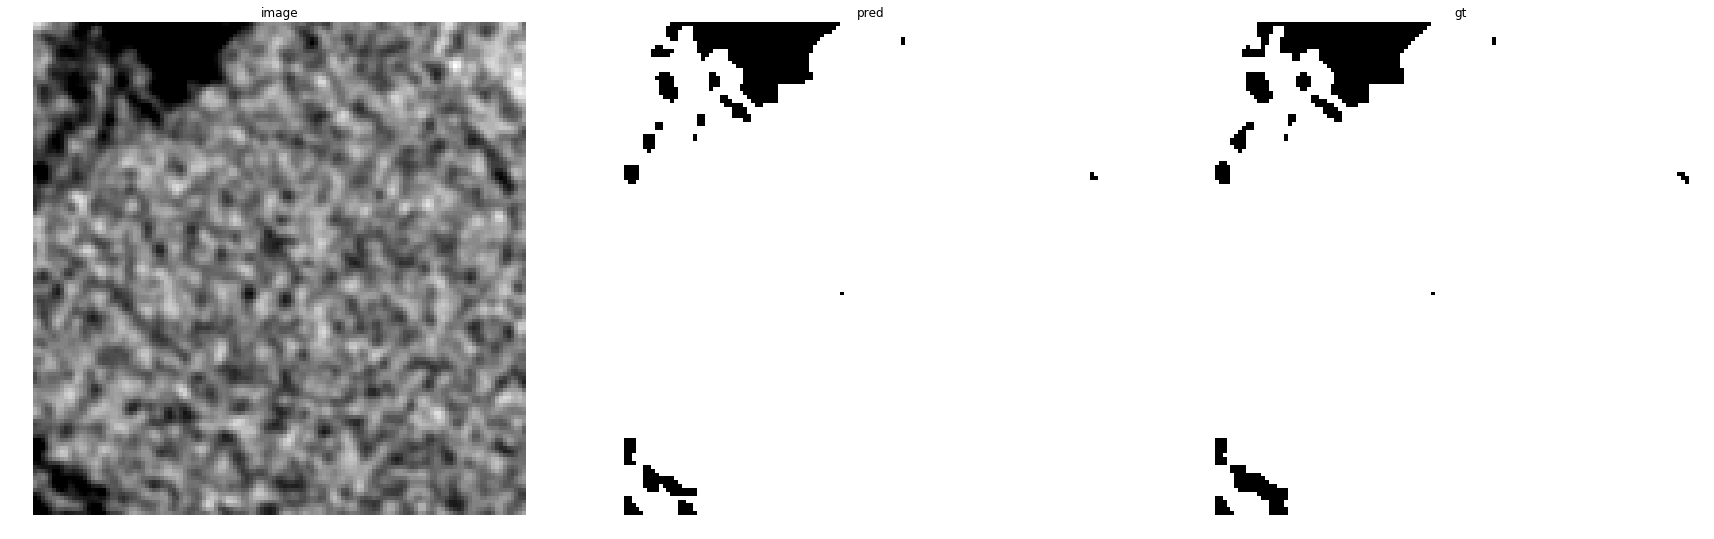

accuracy    : 0.9952392578125
precision   : 0.9952134788435765
recall      : 0.9998076553183305
f1          : 0.9975052772980235
pr_auc      : 0.9999941454639617
iou         : 0.9950229709035222


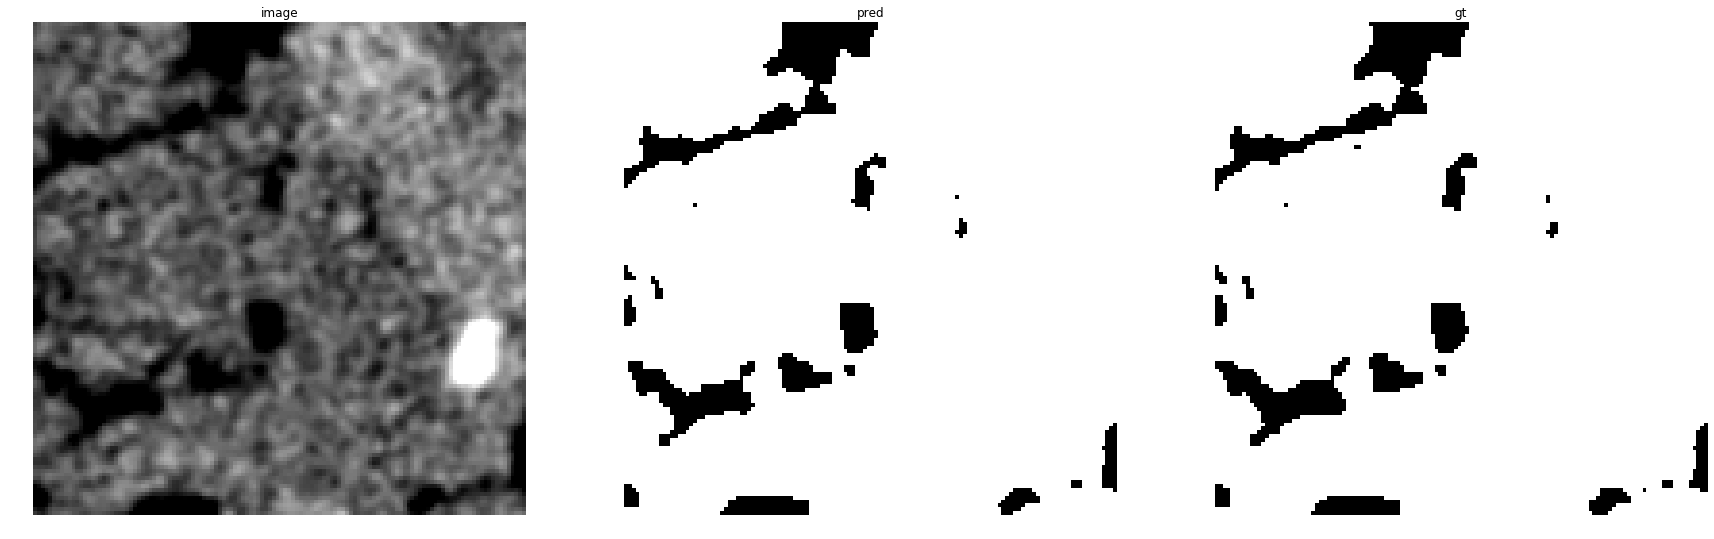

accuracy    : 0.99298095703125
precision   : 0.9929257875066738
recall      : 0.9993954456908712
f1          : 0.9961501121489069
pr_auc      : 0.9999805629309875
iou         : 0.9923297538851464


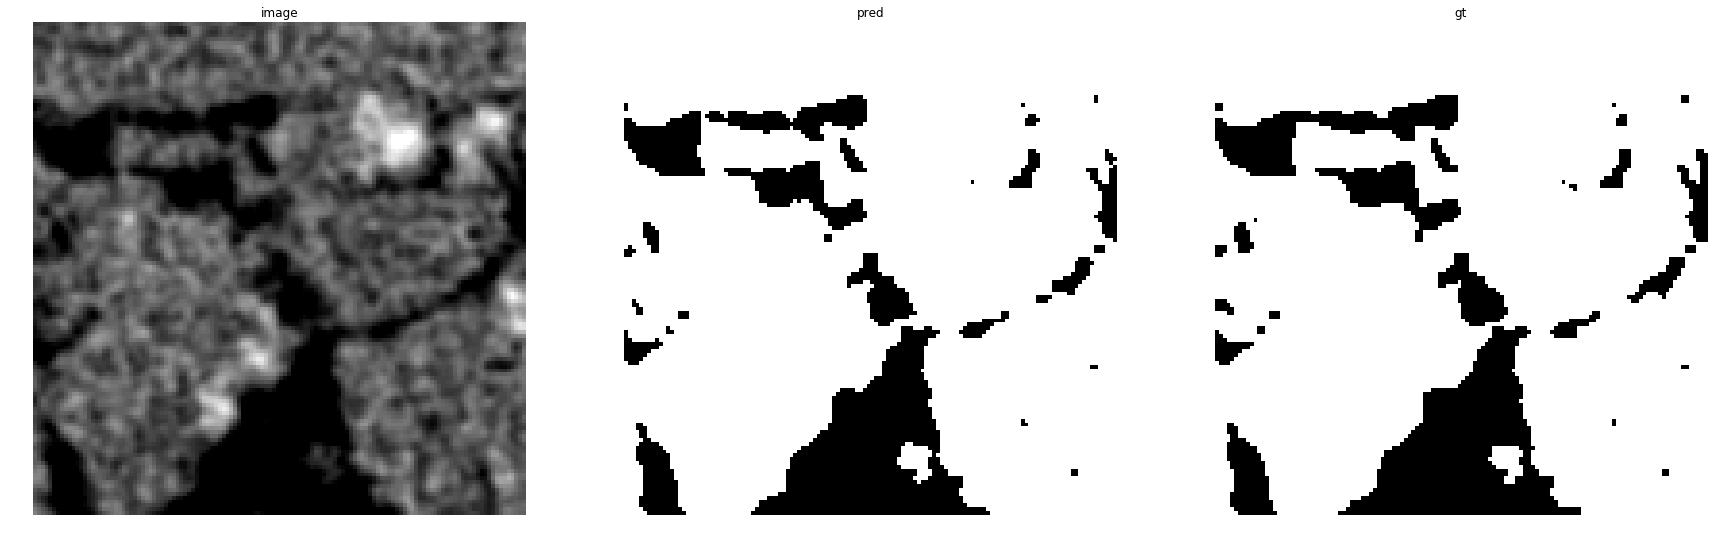

accuracy    : 0.989013671875
precision   : 0.9877422196124486
recall      : 0.9990348923533778
f1          : 0.9933564626854654
pr_auc      : 0.9999269482419397
iou         : 0.9868006159712547


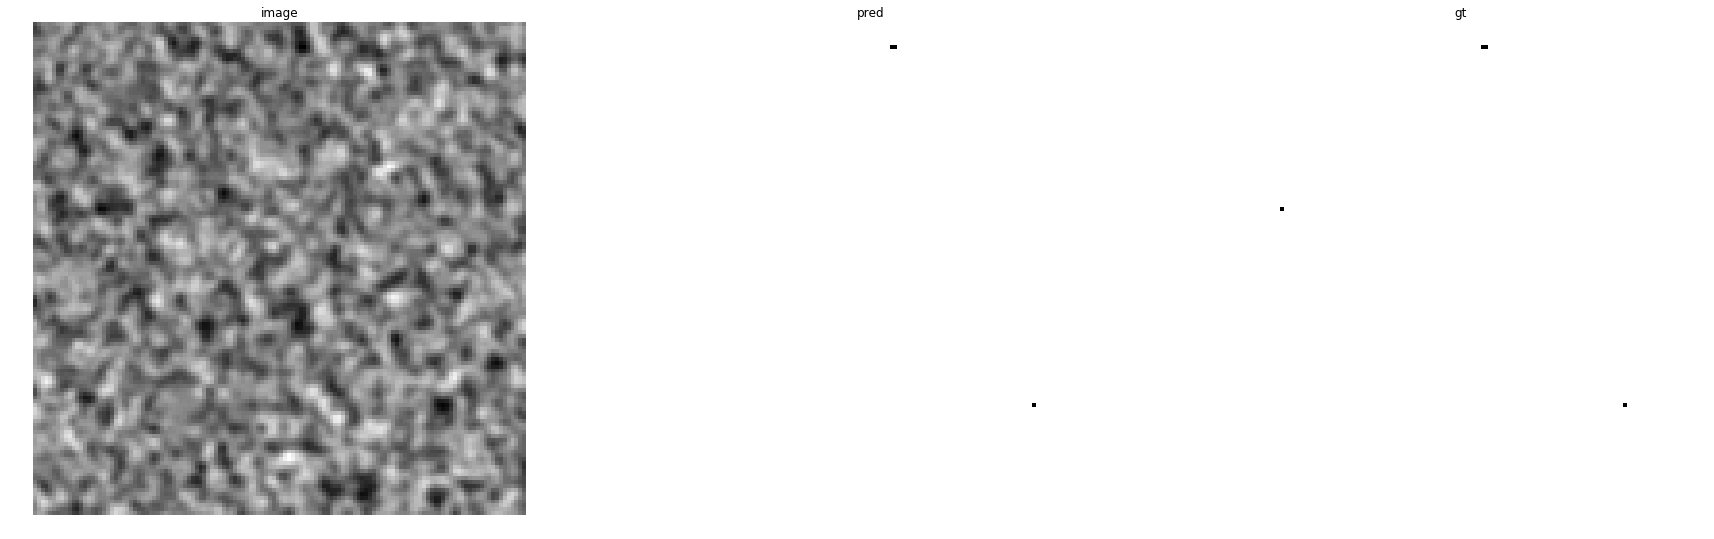

accuracy    : 0.99993896484375
precision   : 0.9999389536658324
recall      : 1.0
f1          : 0.9999694759012241
pr_auc      : 1.0
iou         : 0.9999389536658324


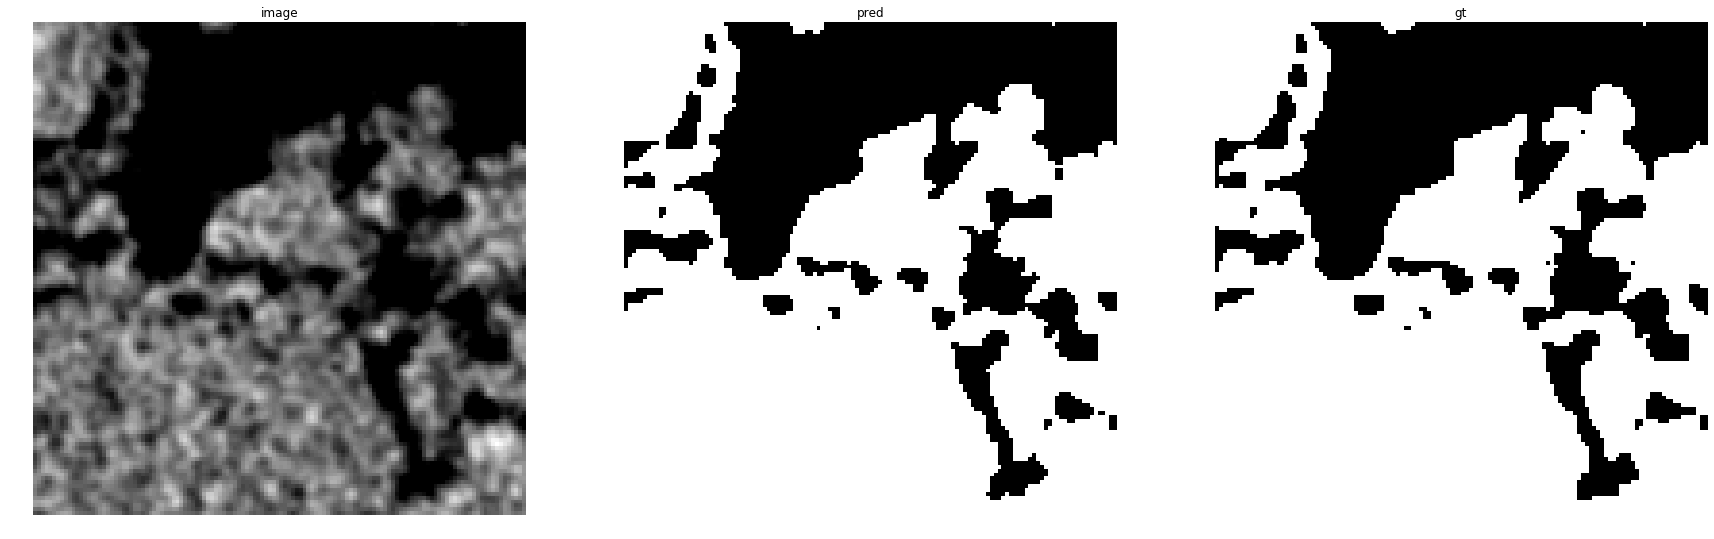

accuracy    : 0.98583984375
precision   : 0.9799908634079488
recall      : 0.9987894589812831
f1          : 0.9893008669987087
pr_auc      : 0.9998452332891767
iou         : 0.9788282533308998


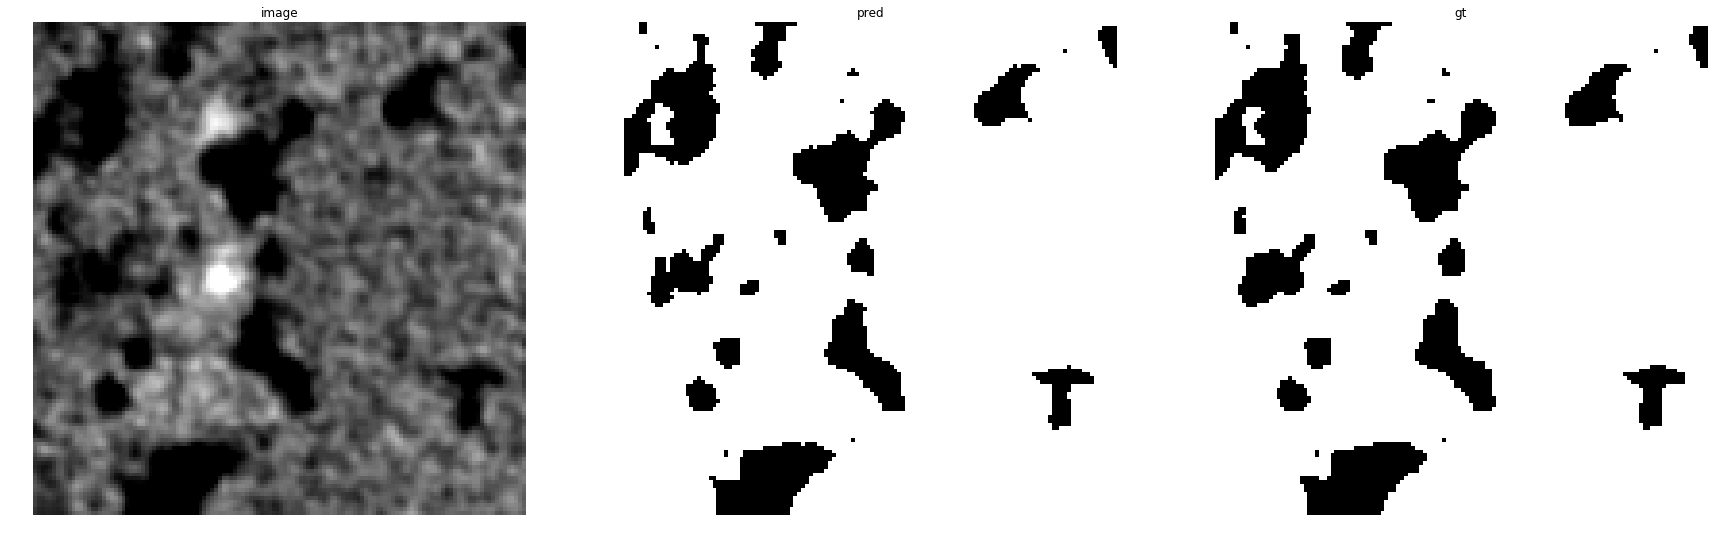

accuracy    : 0.98846435546875
precision   : 0.9871776707282516
recall      : 0.9994262353869325
f1          : 0.9932641933069603
pr_auc      : 0.9999296100038484
iou         : 0.9866185216652507


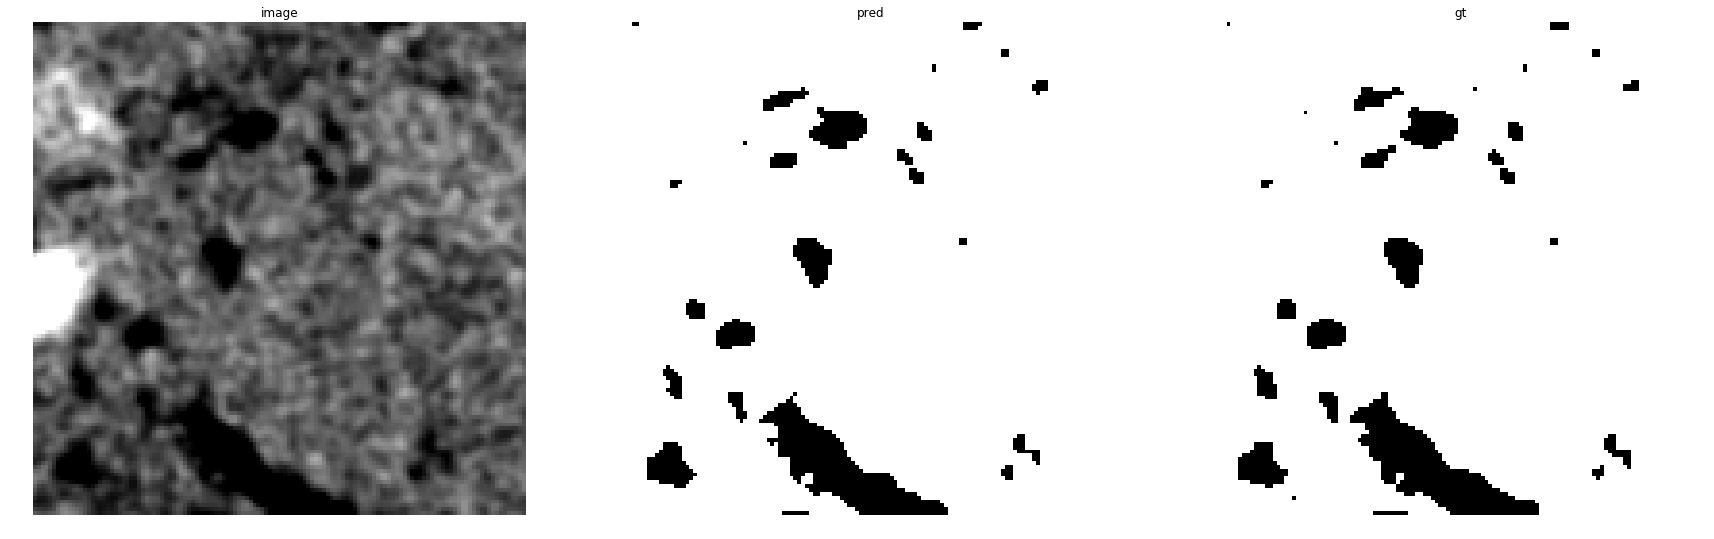

accuracy    : 0.99310302734375
precision   : 0.9935081967213115
recall      : 0.9990768216287504
f1          : 0.9962847279302975
pr_auc      : 0.9999761572416708
iou         : 0.9925969601677149


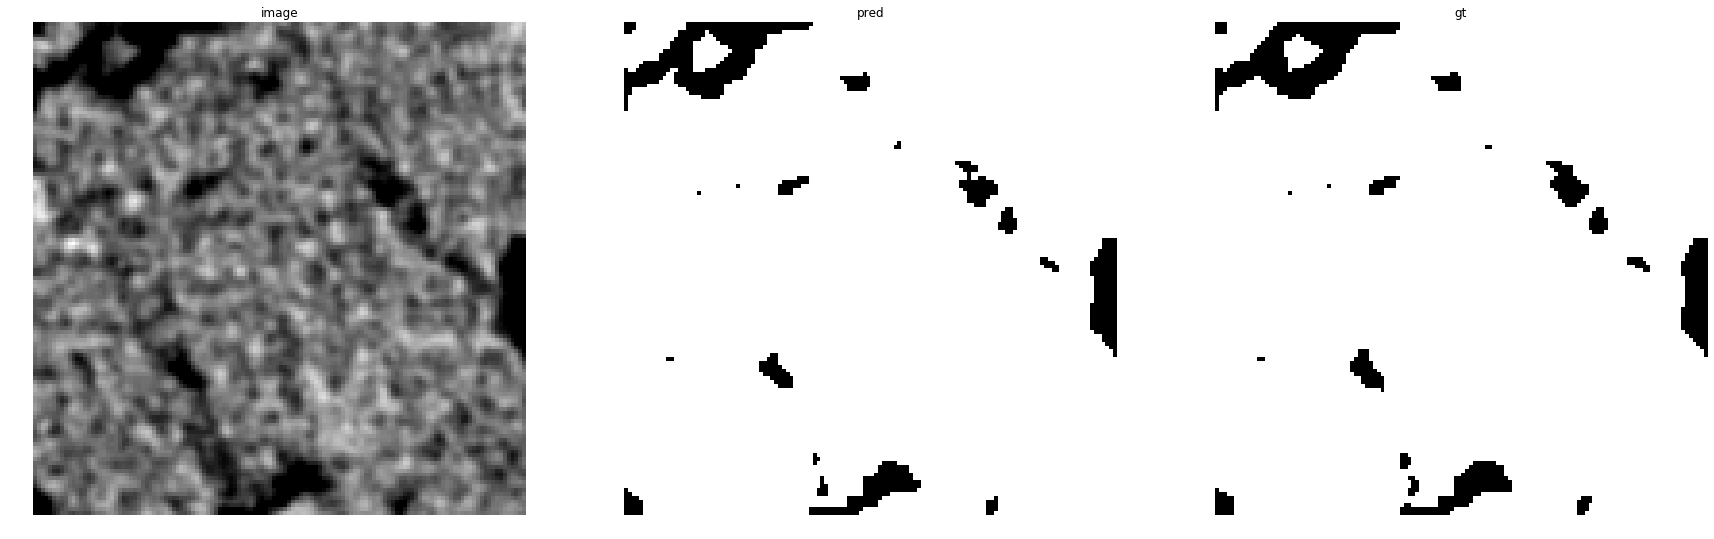

accuracy    : 0.994140625
precision   : 0.9942816297355254
recall      : 0.9994774315761971
f1          : 0.9968727604404196
pr_auc      : 0.9999841931455947
iou         : 0.9937650191595765


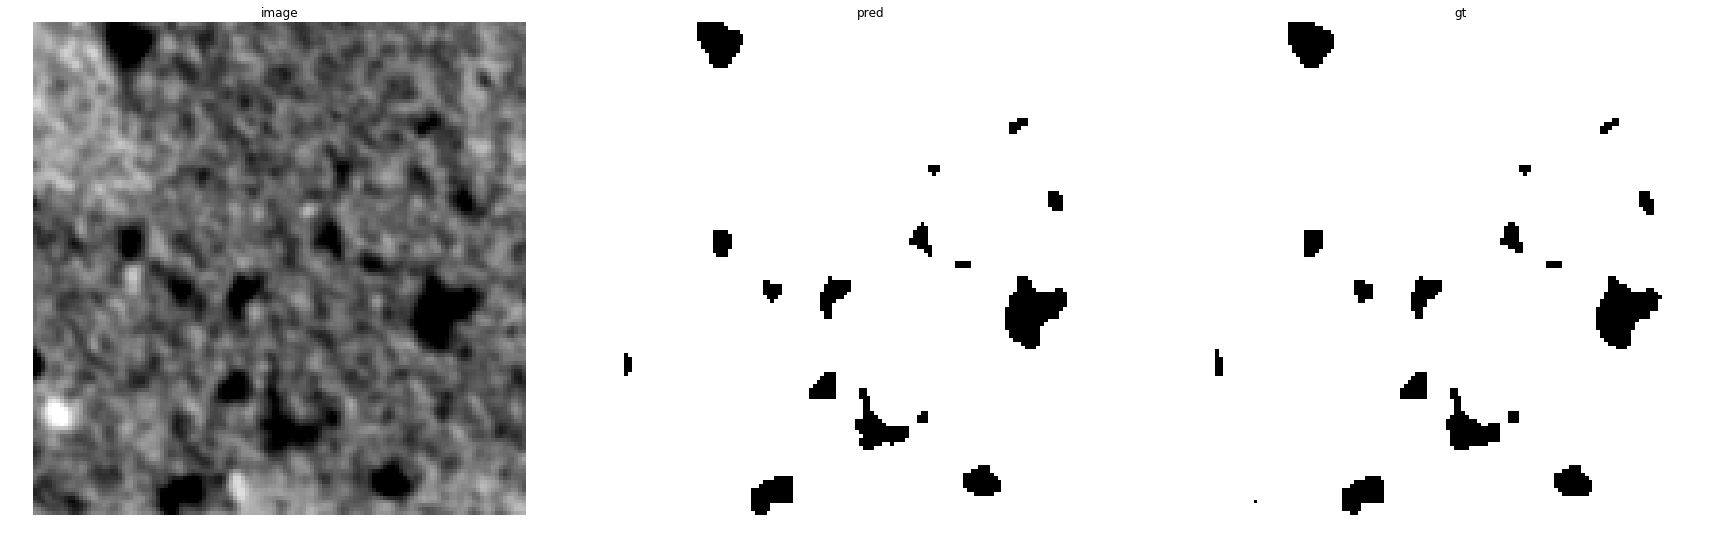

accuracy    : 0.99688720703125
precision   : 0.997377510553921
recall      : 0.9993590976094341
f1          : 0.9983673208054551
pr_auc      : 0.9999929759404693
iou         : 0.9967399642035285


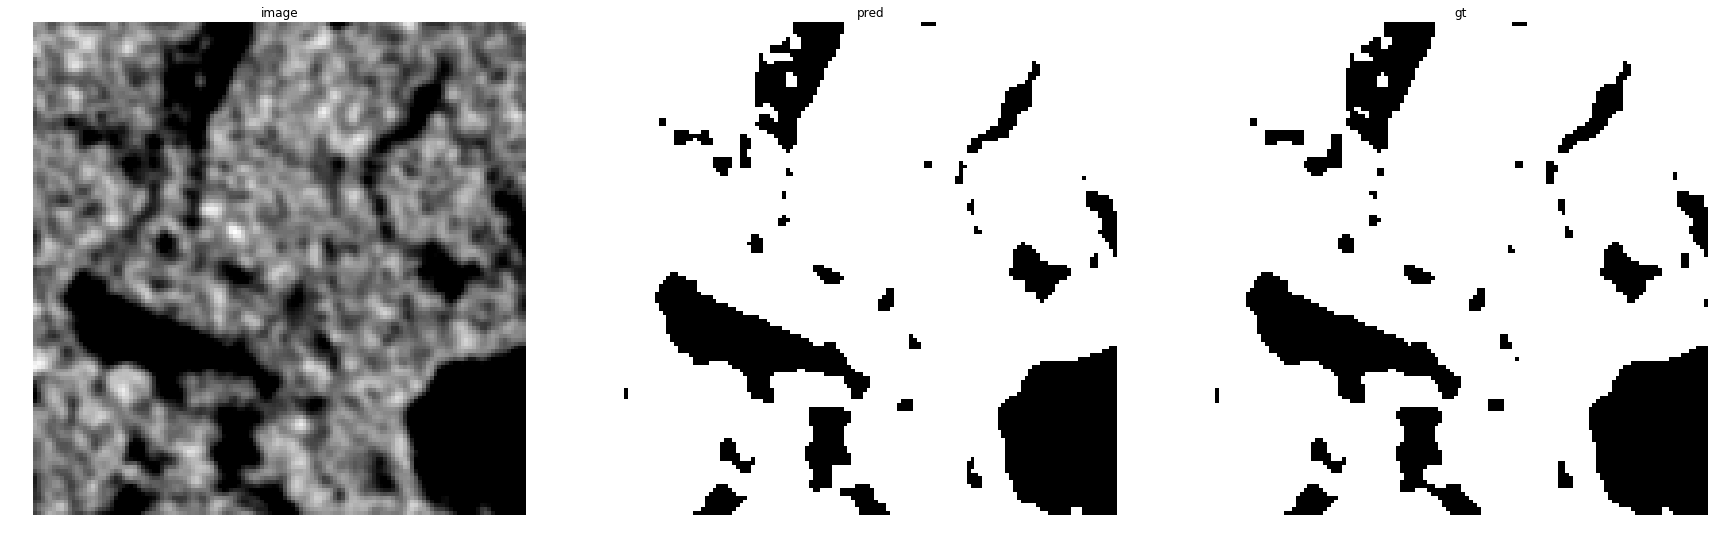

accuracy    : 0.99017333984375
precision   : 0.988558524651863
recall      : 0.9993151727286562
f1          : 0.9939077458659704
pr_auc      : 0.9999151220335284
iou         : 0.9878892733564014


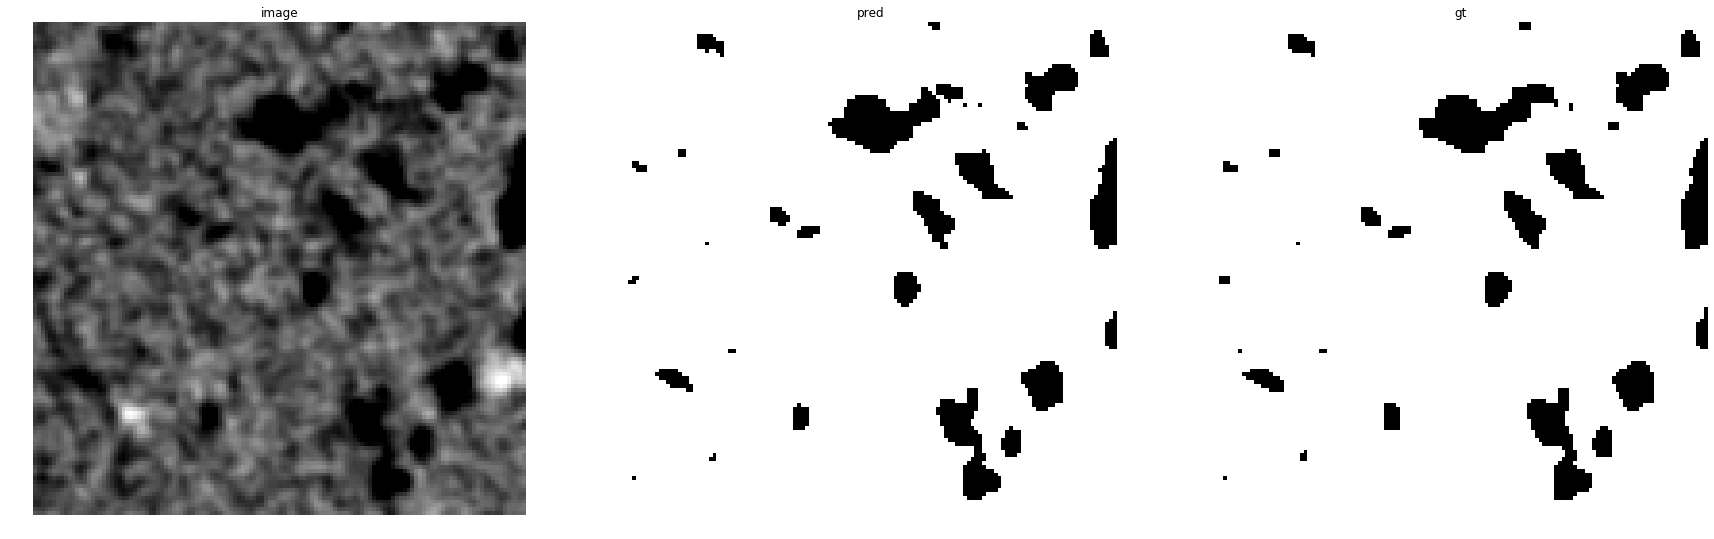

accuracy    : 0.99456787109375
precision   : 0.9942917828222487
recall      : 0.999799773076153
f1          : 0.9970381709873873
pr_auc      : 0.9999762227910893
iou         : 0.9940938350255492


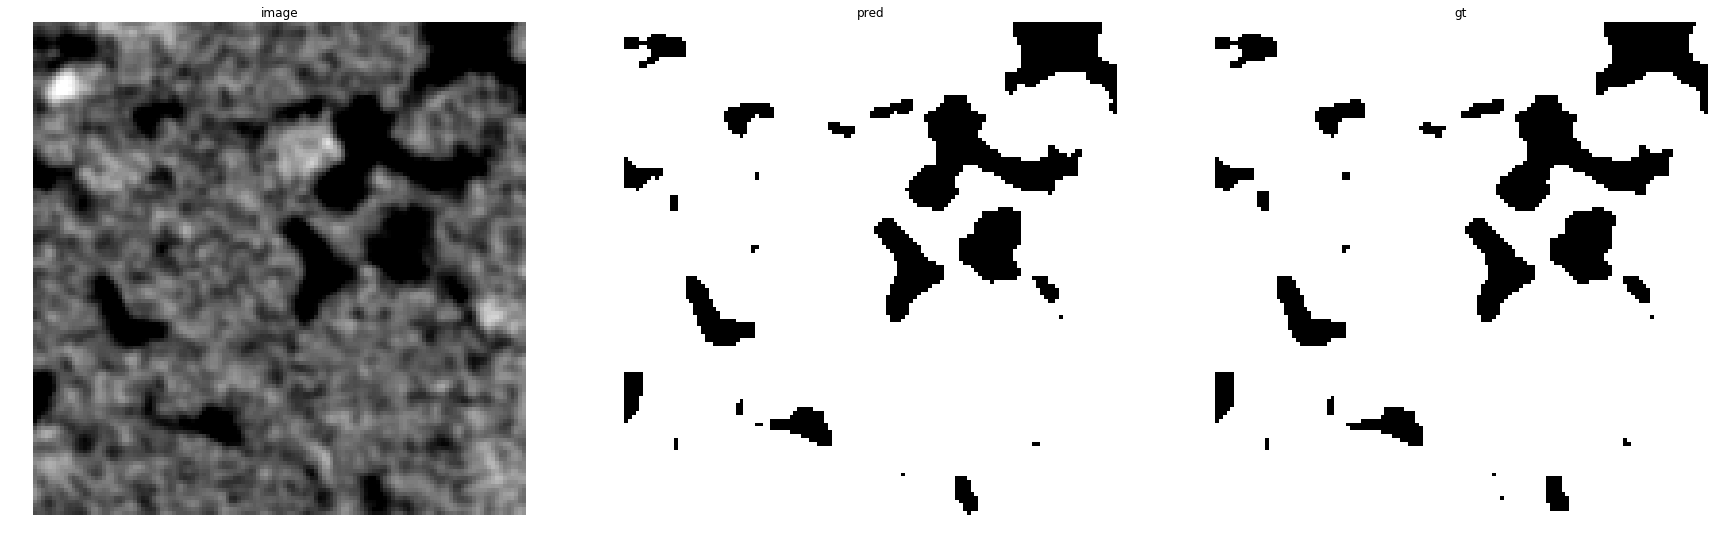

accuracy    : 0.9935302734375
precision   : 0.9931949170196515
recall      : 0.9994409894486759
f1          : 0.996308163833937
pr_auc      : 0.9999670249360675
iou         : 0.9926434867096954


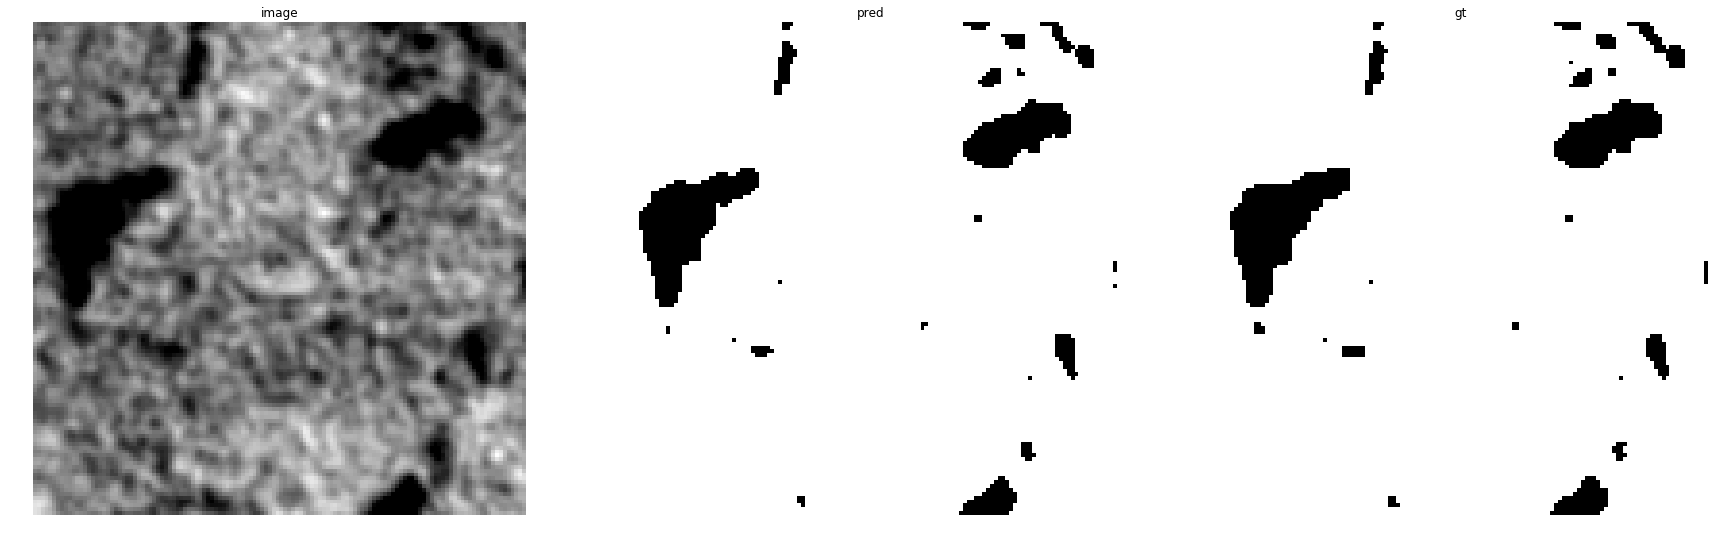

accuracy    : 0.99468994140625
precision   : 0.9952128008393993
recall      : 0.9990783410138249
f1          : 0.9971418246328722
pr_auc      : 0.9999799986348555
iou         : 0.9942999410338728


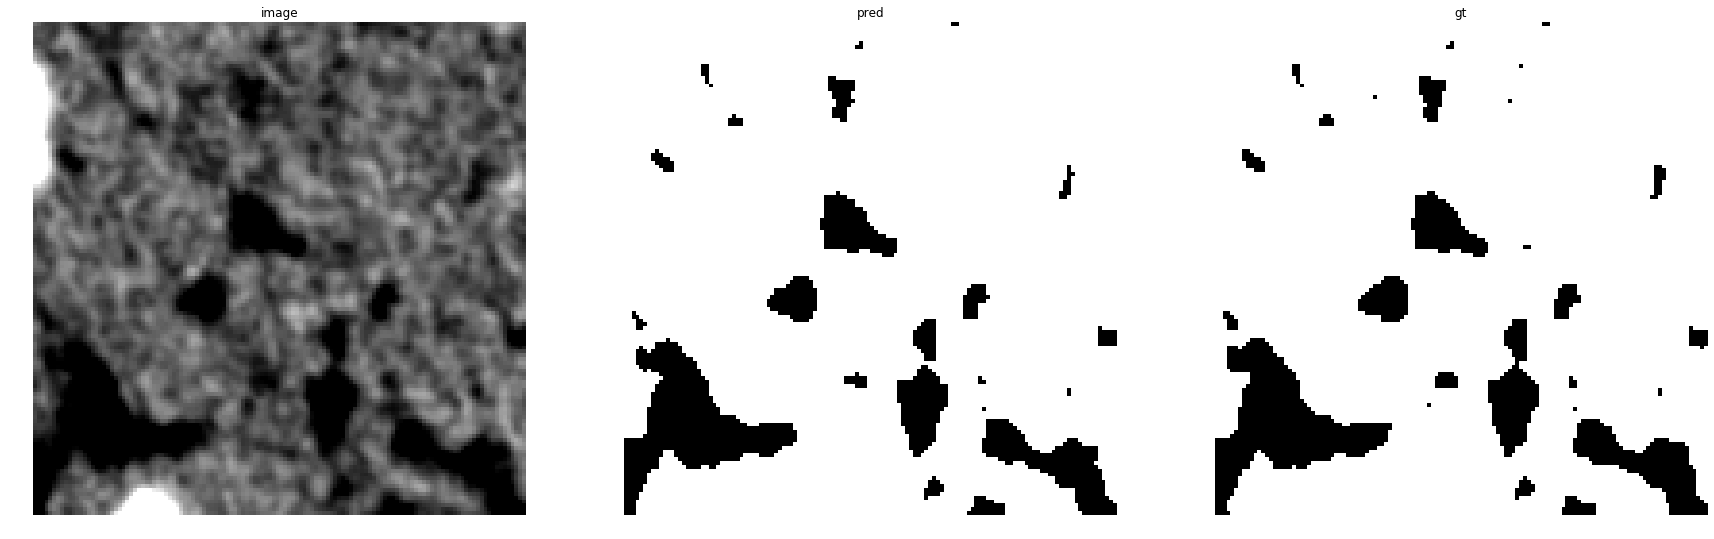

accuracy    : 0.99298095703125
precision   : 0.9928680238194156
recall      : 0.9991638213364922
f1          : 0.996005973674157
pr_auc      : 0.9999680022242748
iou         : 0.9920437249204372


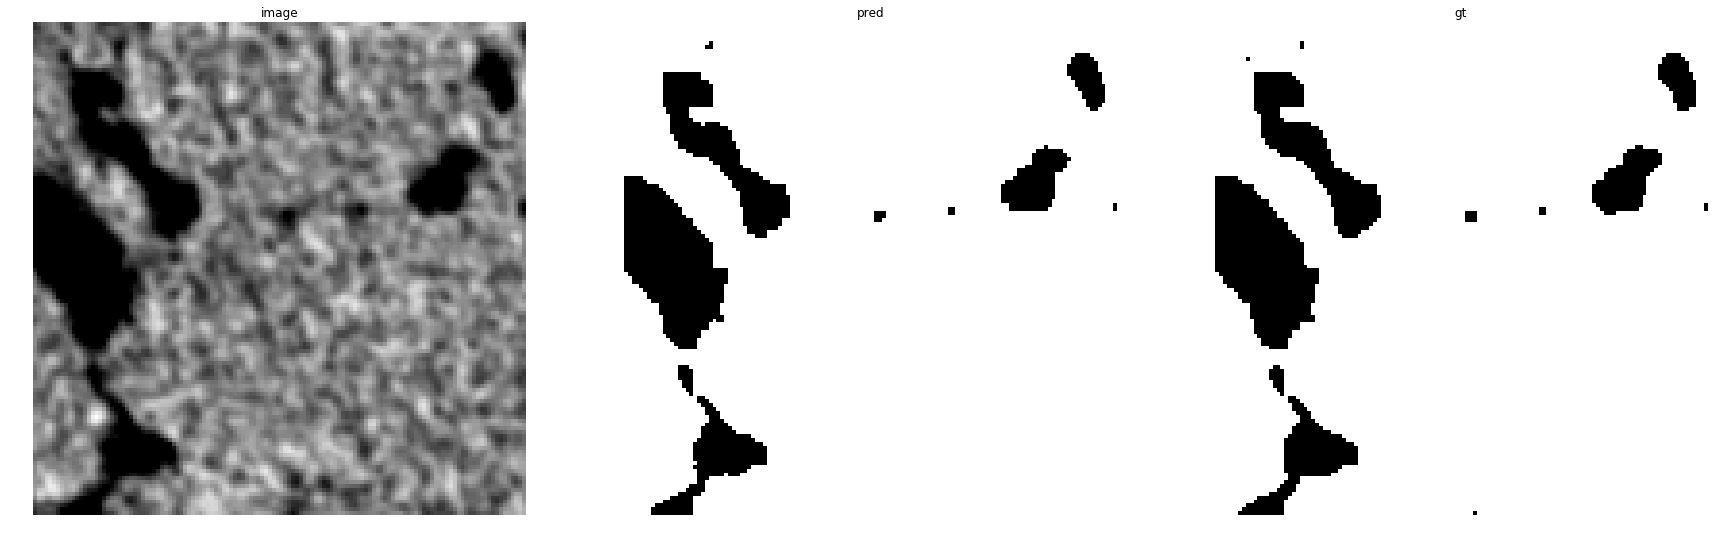

accuracy    : 0.99627685546875
precision   : 0.9960156625678368
recall      : 0.9997931319817956
f1          : 0.9979008224646408
pr_auc      : 0.9999931615722807
iou         : 0.9958104395604396


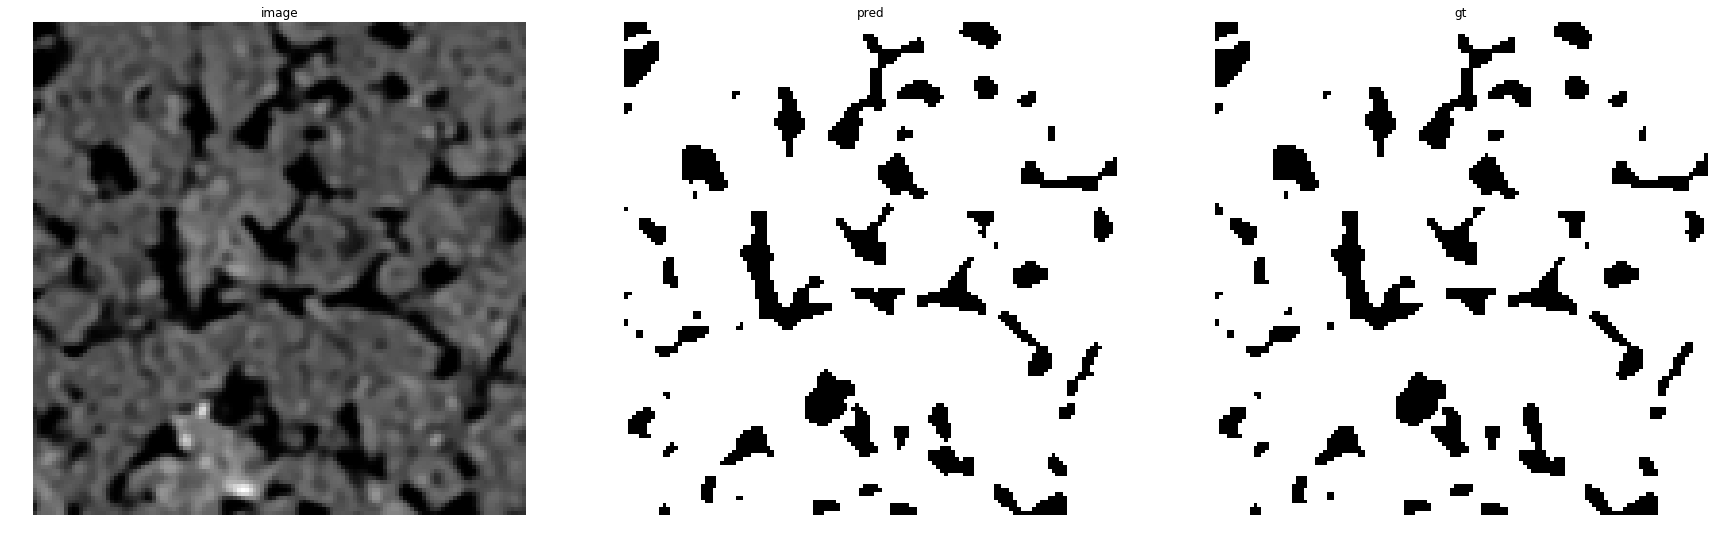

accuracy    : 0.99212646484375
precision   : 0.9947108603667136
recall      : 0.9961861713397839
f1          : 0.9954479692296835
pr_auc      : 0.9999310180558895
iou         : 0.9909371926373471


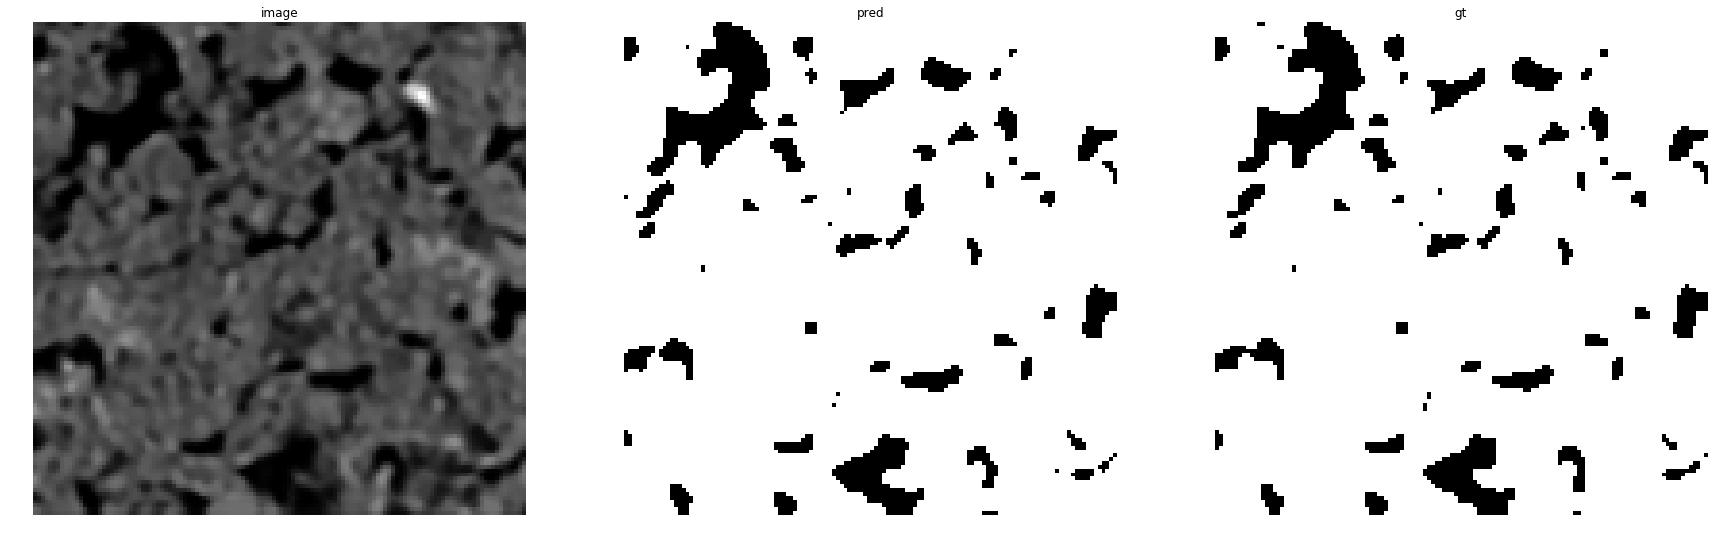

accuracy    : 0.9925537109375
precision   : 0.9951132218321976
recall      : 0.996484940381832
f1          : 0.9957986087196088
pr_auc      : 0.999940294720493
iou         : 0.9916323731138545


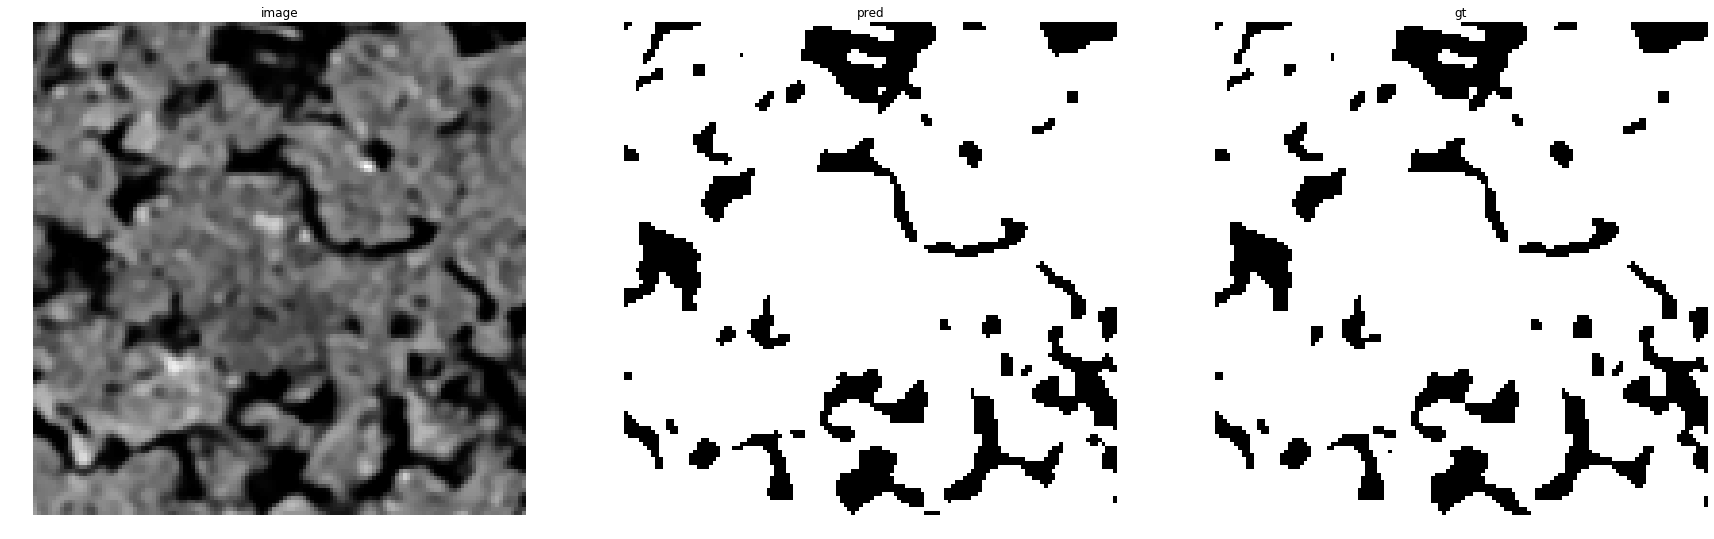

accuracy    : 0.9912109375
precision   : 0.995071355009563
recall      : 0.9943399000294031
f1          : 0.9947054930509597
pr_auc      : 0.9998853698717494
iou         : 0.989466754443713


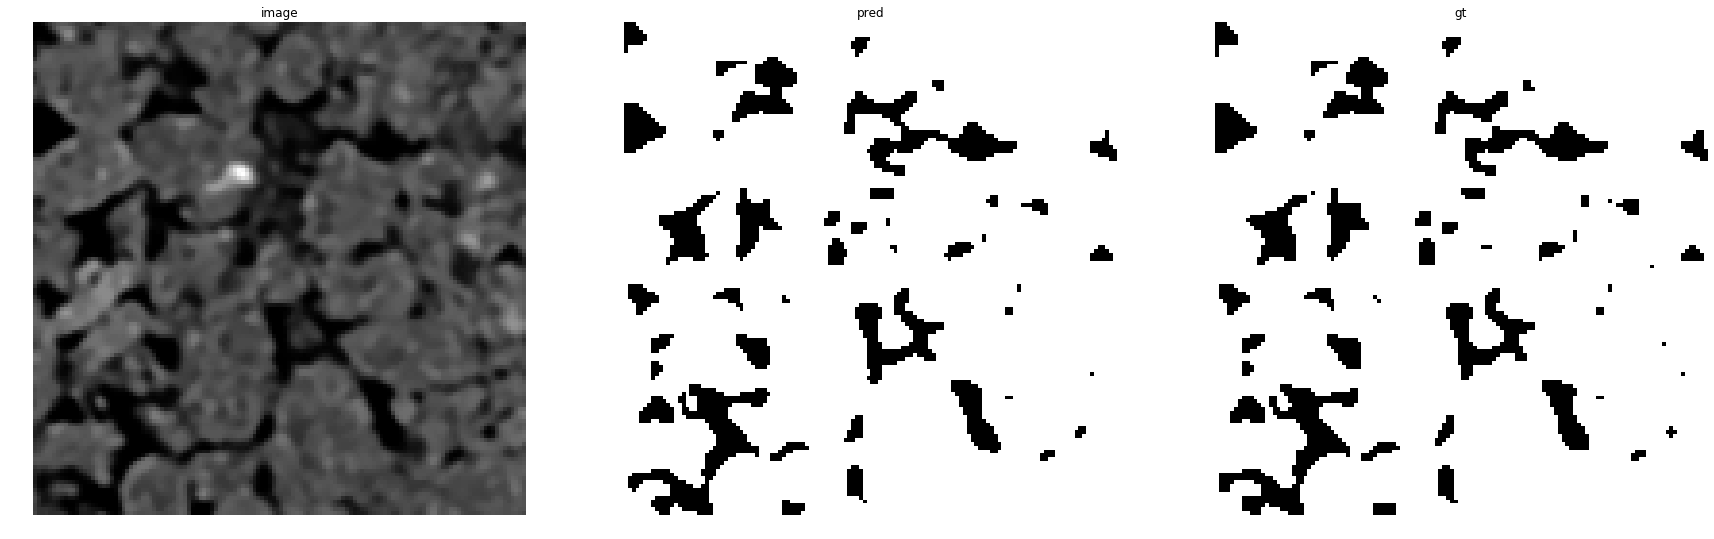

accuracy    : 0.99176025390625
precision   : 0.9955382041271612
recall      : 0.9950526095742457
f1          : 0.9952953476215369
pr_auc      : 0.9999262197270589
iou         : 0.9906347554630593


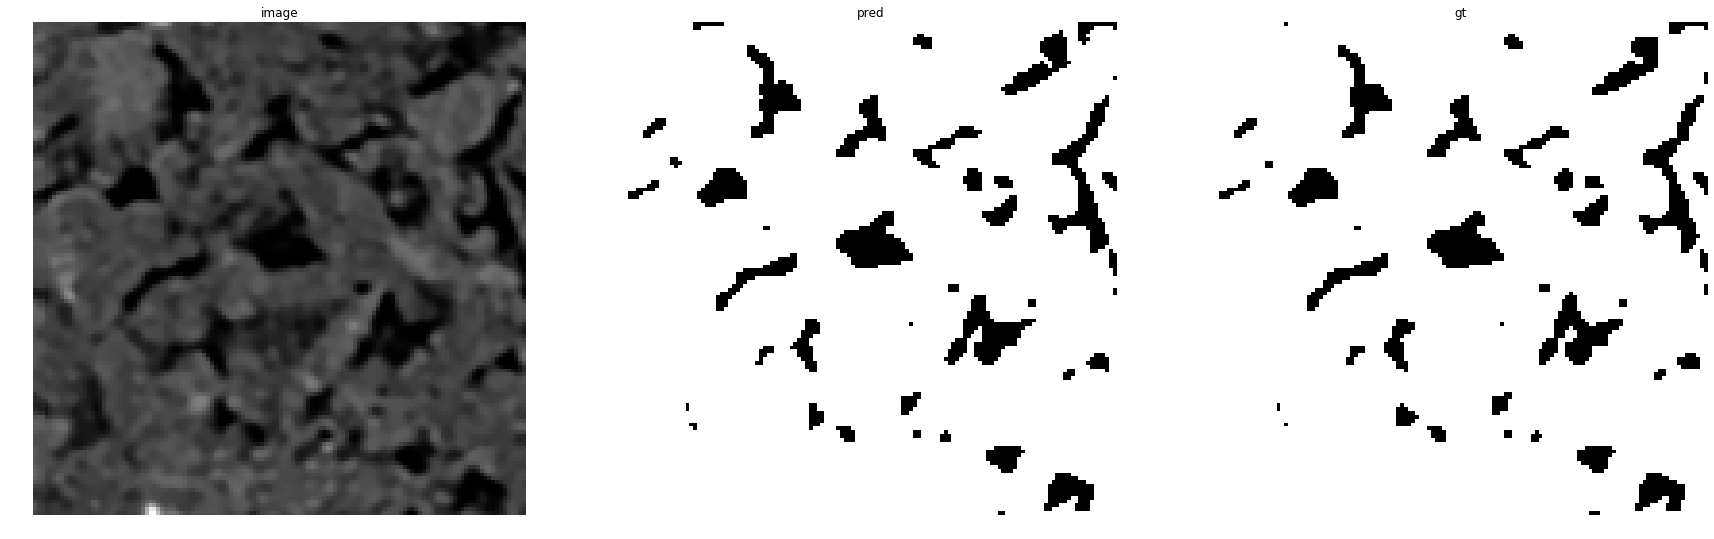

accuracy    : 0.992919921875
precision   : 0.9966172789391787
recall      : 0.9955396364127864
f1          : 0.9960781662046115
pr_auc      : 0.9999535199068137
iou         : 0.9921869737994208


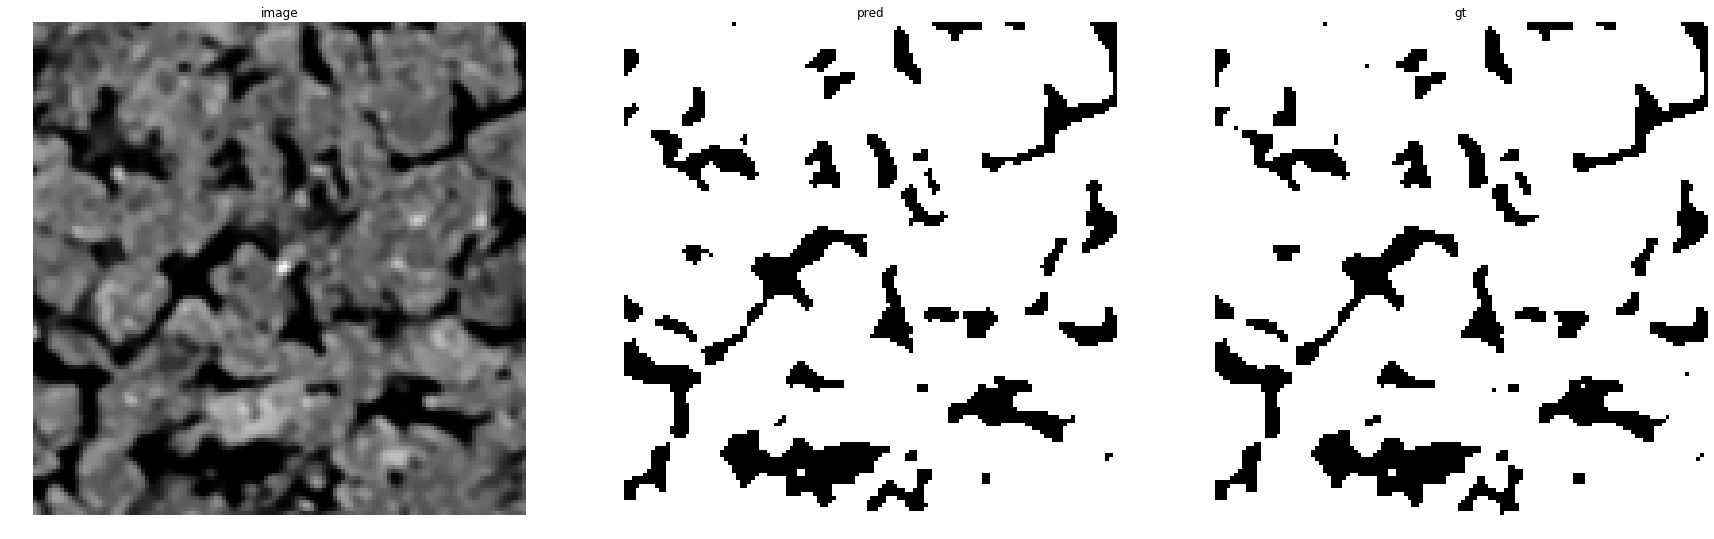

accuracy    : 0.98968505859375
precision   : 0.9932964150393472
recall      : 0.9943832518783281
f1          : 0.9938395363248642
pr_auc      : 0.9998700961826745
iou         : 0.9877545105427143


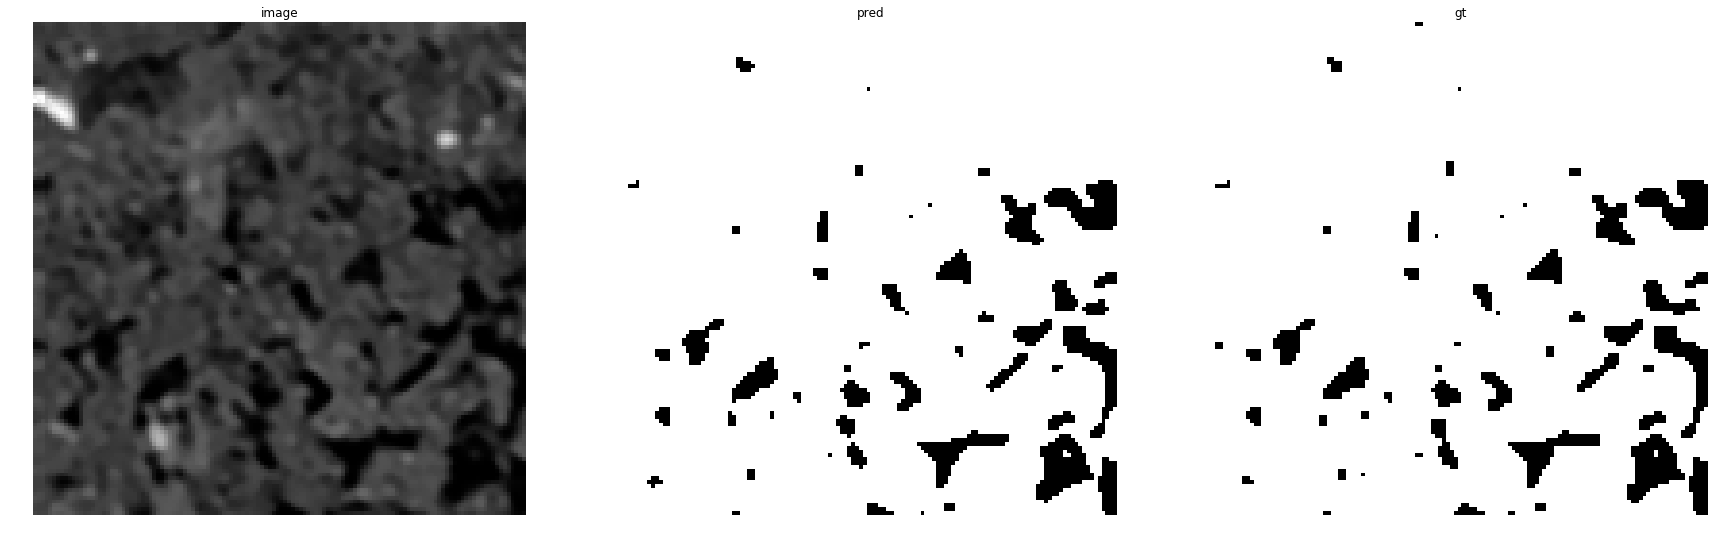

accuracy    : 0.9940185546875
precision   : 0.996003729852138
recall      : 0.9974653148345785
f1          : 0.9967339865360261
pr_auc      : 0.9999612076334263
iou         : 0.9934892373106564


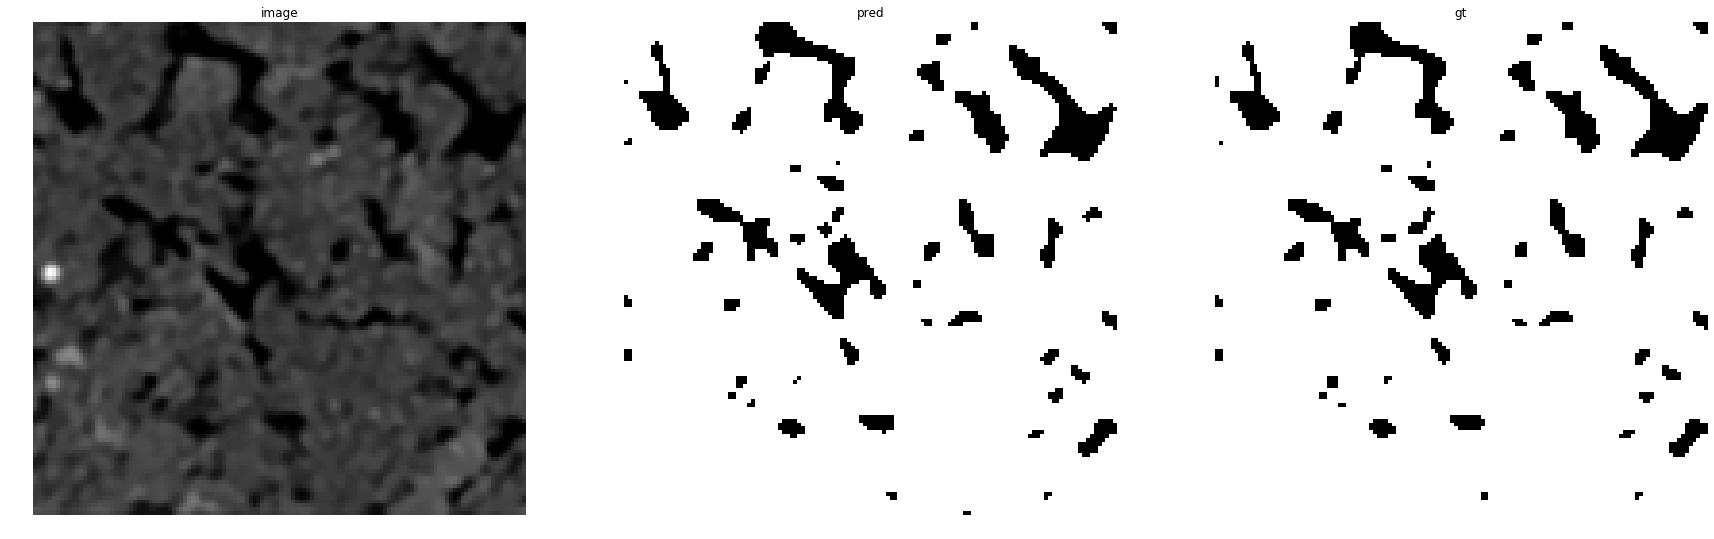

accuracy    : 0.993896484375
precision   : 0.9972237269772481
recall      : 0.9960097389422427
f1          : 0.9966163632672396
pr_auc      : 0.9999623184125533
iou         : 0.9932555473123356


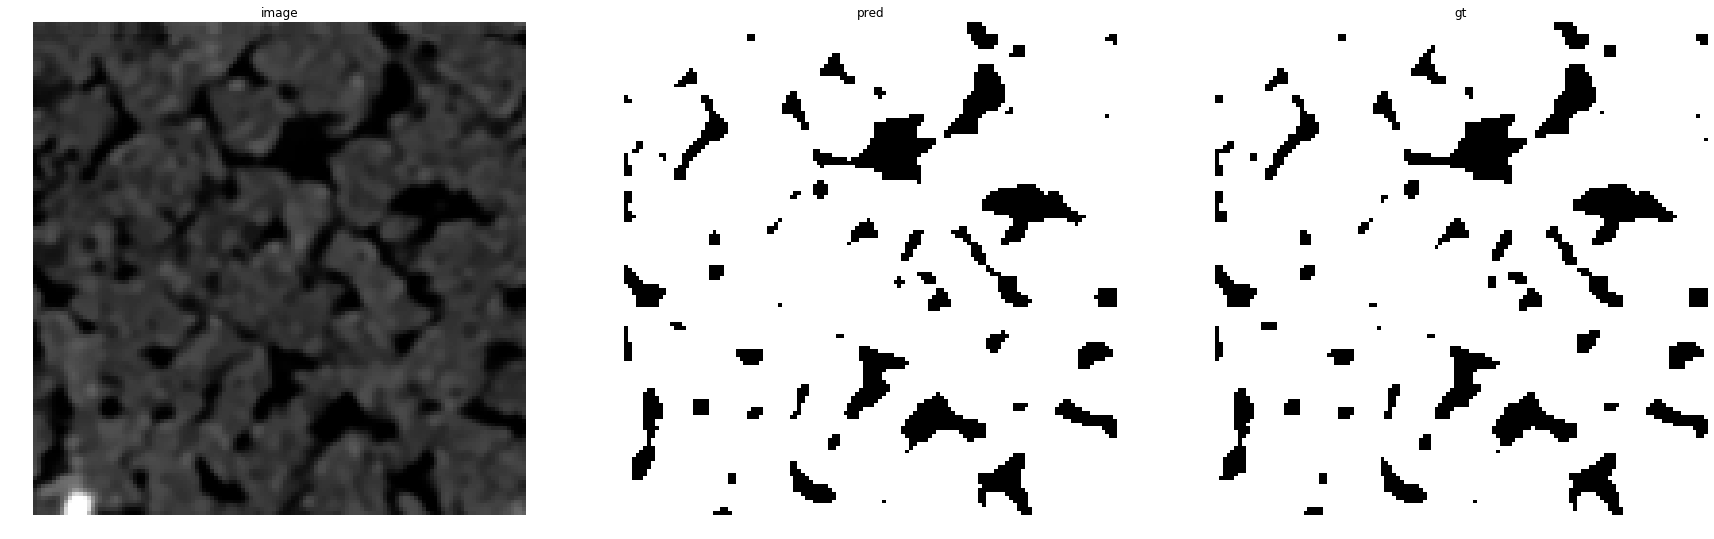

accuracy    : 0.9913330078125
precision   : 0.9935506241331484
recall      : 0.9965915414579856
f1          : 0.9950687595499376
pr_auc      : 0.9999316550265192
iou         : 0.9901859147142166


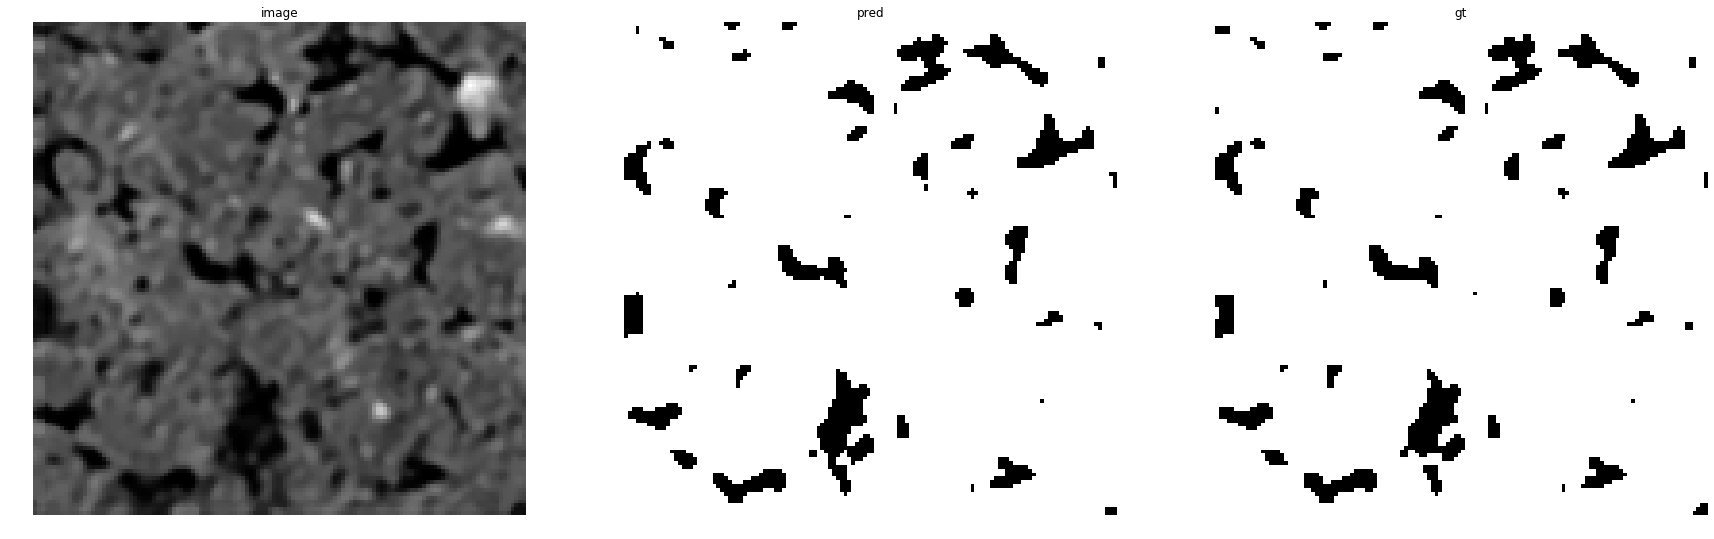

accuracy    : 0.994384765625
precision   : 0.9967489384288747
recall      : 0.9971458914111244
f1          : 0.9969473754064637
pr_auc      : 0.9999592718110855
iou         : 0.9939133311280185


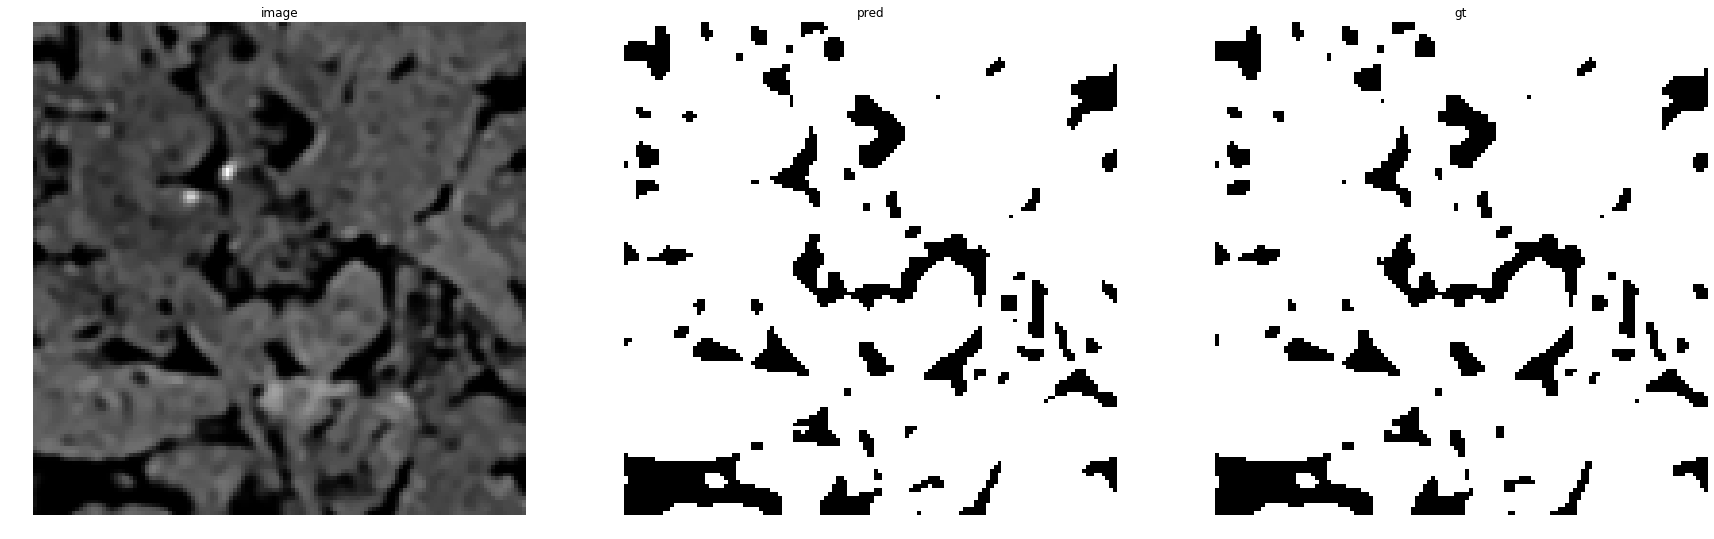

accuracy    : 0.9888916015625
precision   : 0.9946394110499607
recall      : 0.9923696783855095
f1          : 0.993503248375812
pr_auc      : 0.9998733827143329
iou         : 0.9870903674280039


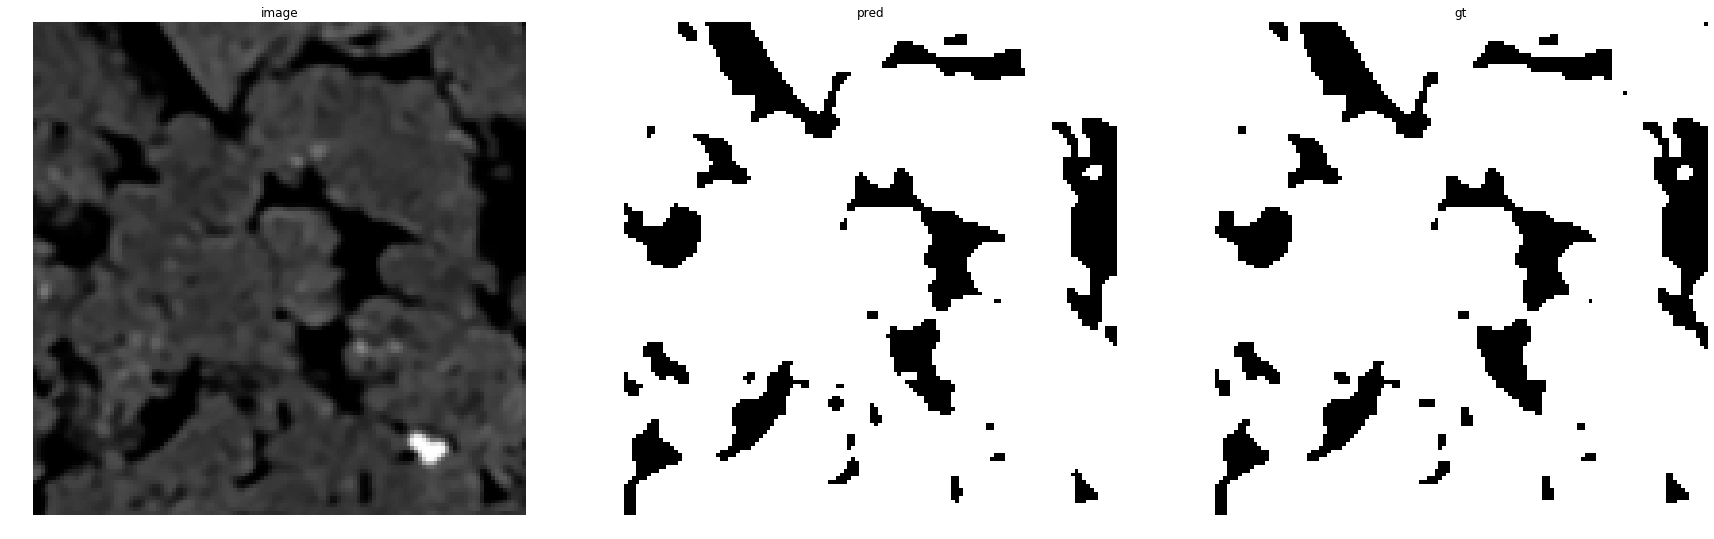

accuracy    : 0.99163818359375
precision   : 0.9956124314442413
recall      : 0.9943762781186094
f1          : 0.9949939708407937
pr_auc      : 0.9999211719208687
iou         : 0.9900378126817917


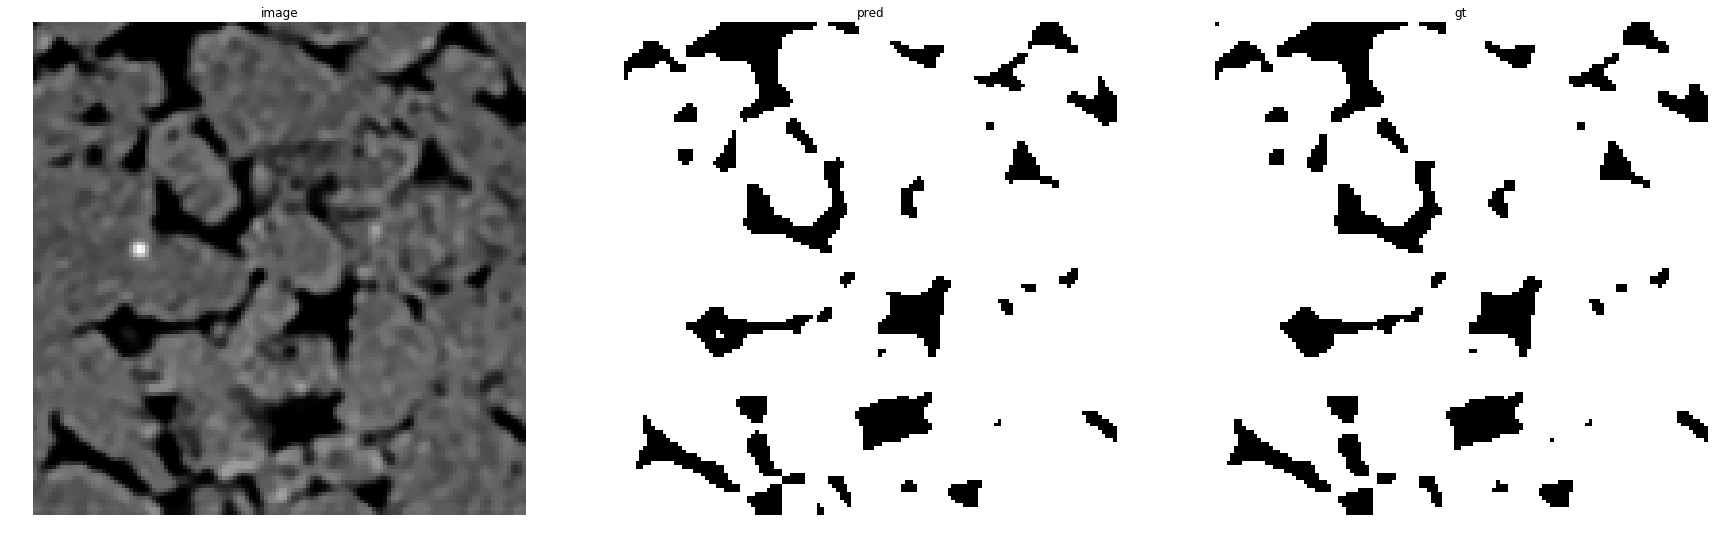

accuracy    : 0.9913330078125
precision   : 0.9953566905867455
recall      : 0.9946569178852643
f1          : 0.9950066812012096
pr_auc      : 0.9999323783118337
iou         : 0.9900629811056683


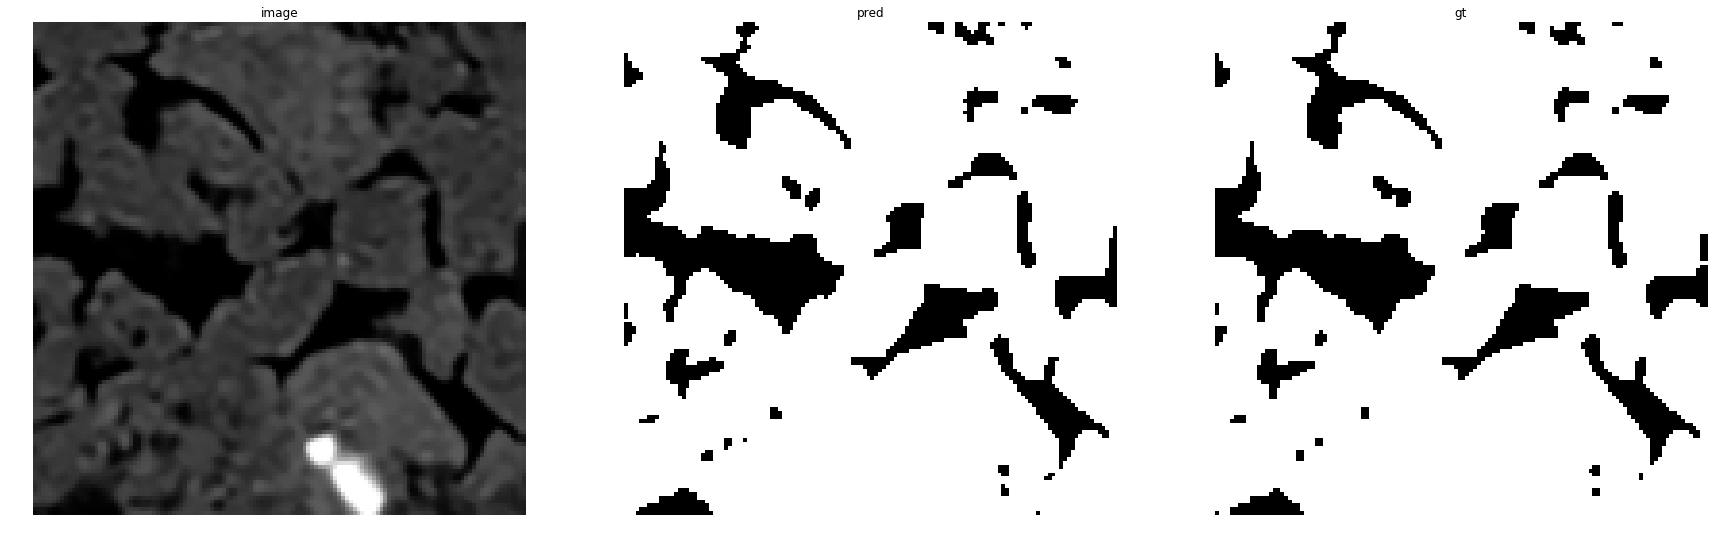

accuracy    : 0.99176025390625
precision   : 0.996426487747958
recall      : 0.9937449996363372
f1          : 0.9950839372200575
pr_auc      : 0.9999261072071345
iou         : 0.9902159733294681


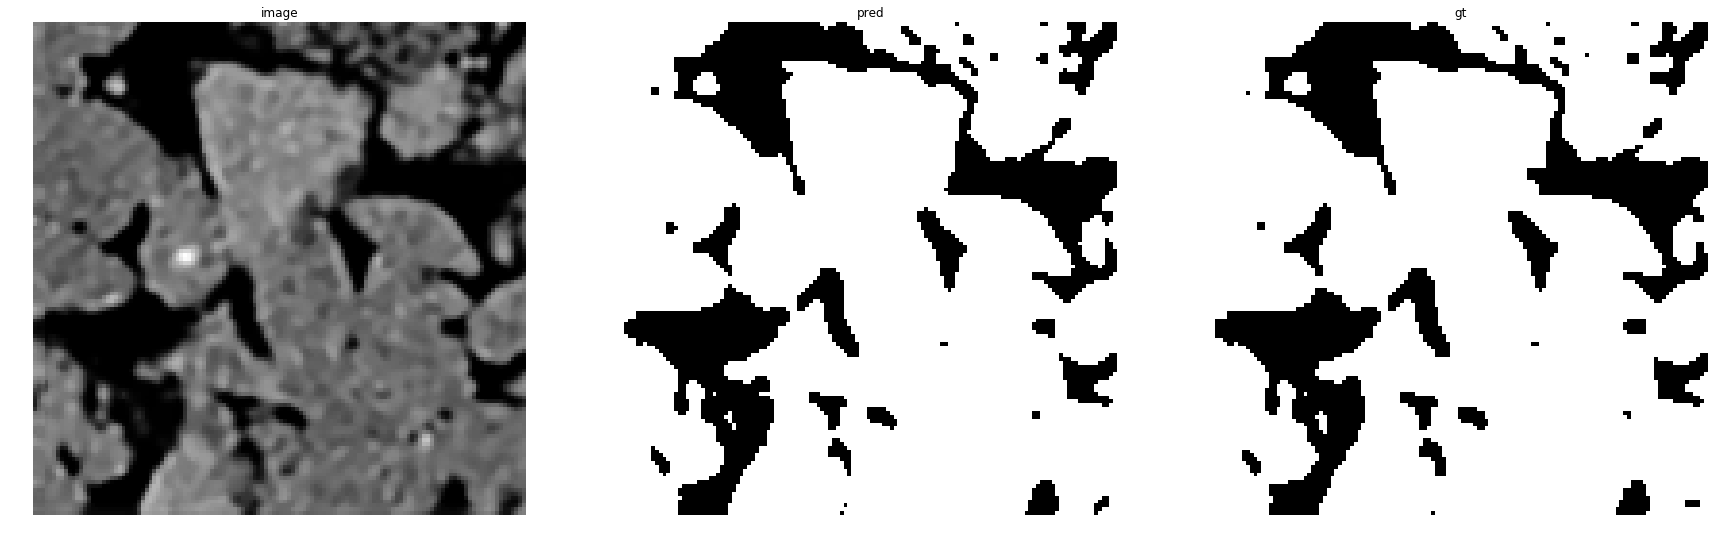

accuracy    : 0.98895263671875
precision   : 0.9937808961888056
recall      : 0.991803930930214
f1          : 0.9927914293679557
pr_auc      : 0.9998285047446658
iou         : 0.9856860419137999


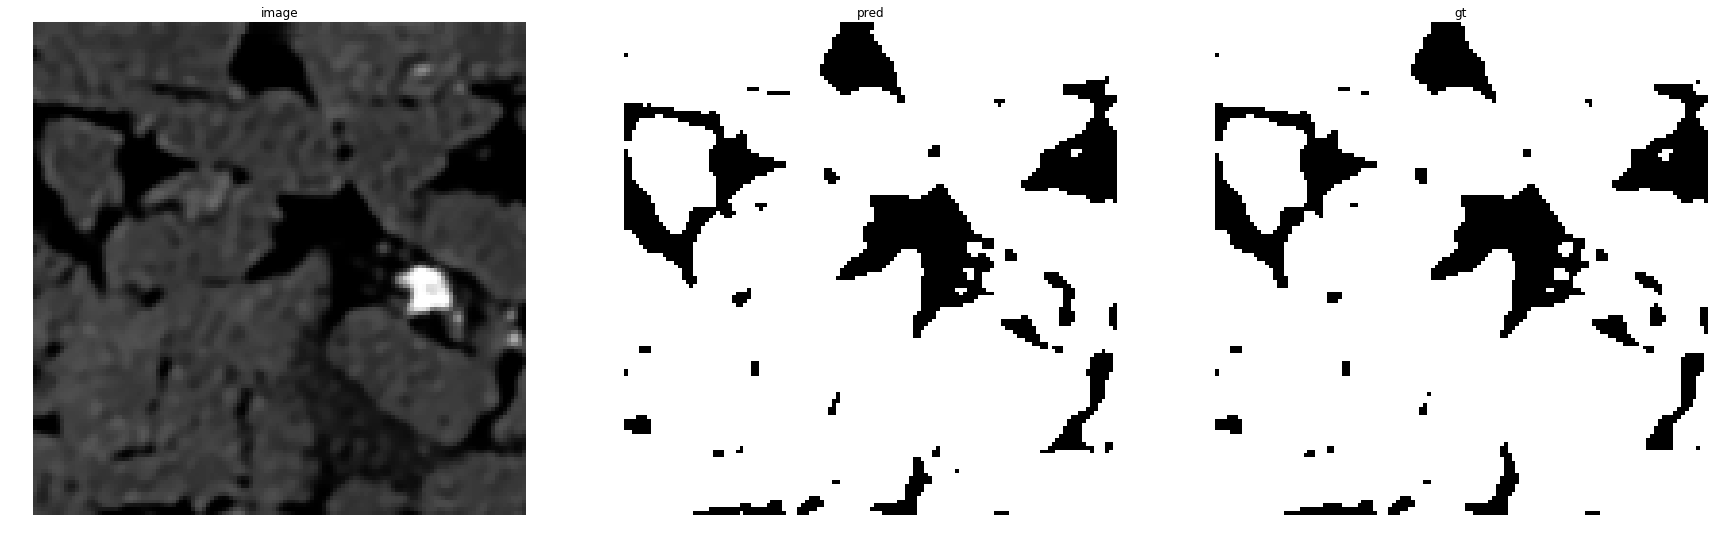

accuracy    : 0.98956298828125
precision   : 0.9961790786533055
recall      : 0.991532721010333
f1          : 0.9938504693062898
pr_auc      : 0.999900543678206
iou         : 0.9877761098005576


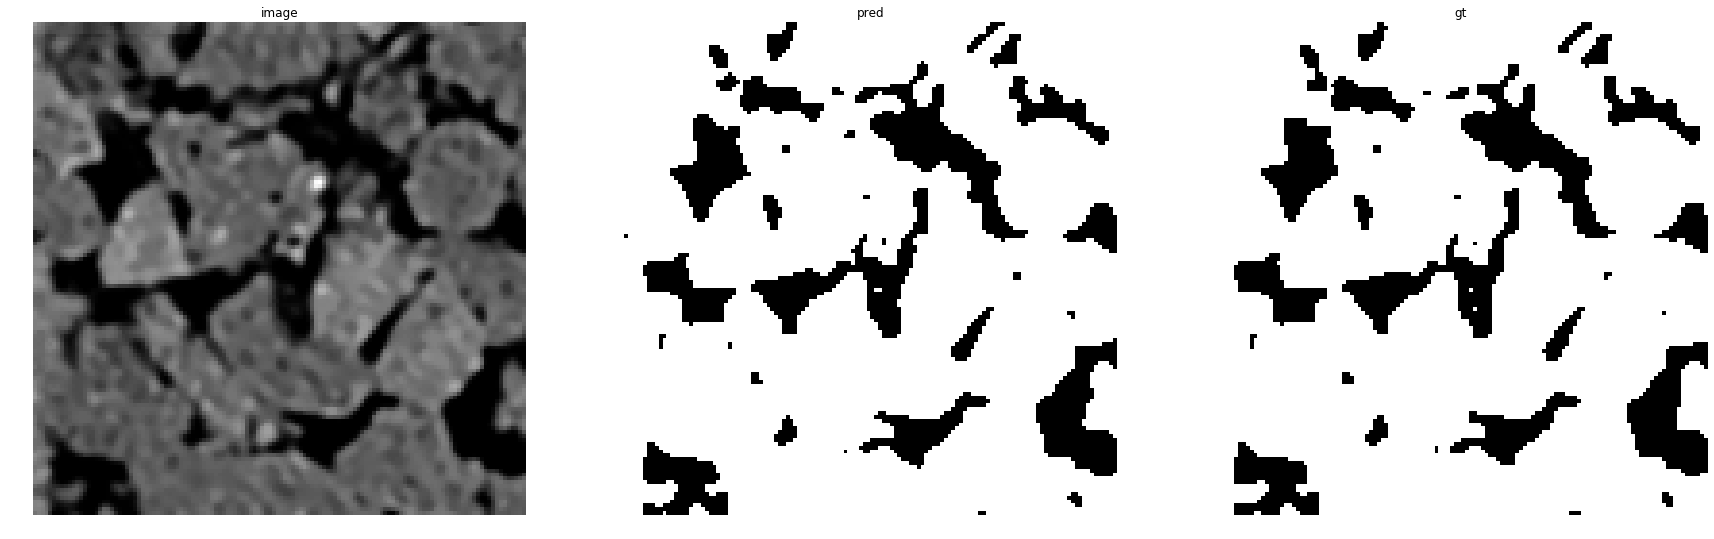

accuracy    : 0.990234375
precision   : 0.9949673251708856
recall      : 0.9930279631156759
f1          : 0.9939966981840013
pr_auc      : 0.9998855580387722
iou         : 0.988065045502014


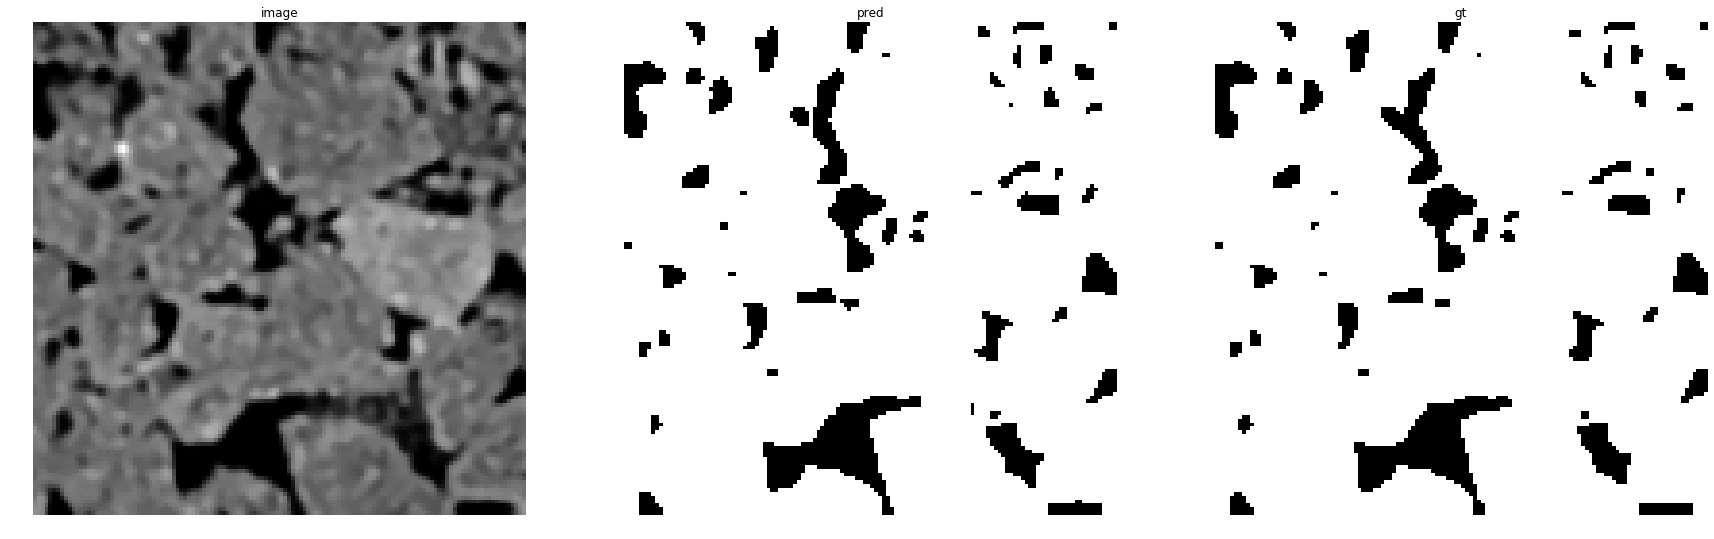

accuracy    : 0.9925537109375
precision   : 0.9968924798011187
recall      : 0.9946944119065665
f1          : 0.9957922328757673
pr_auc      : 0.9999538065229934
iou         : 0.9916197279846133


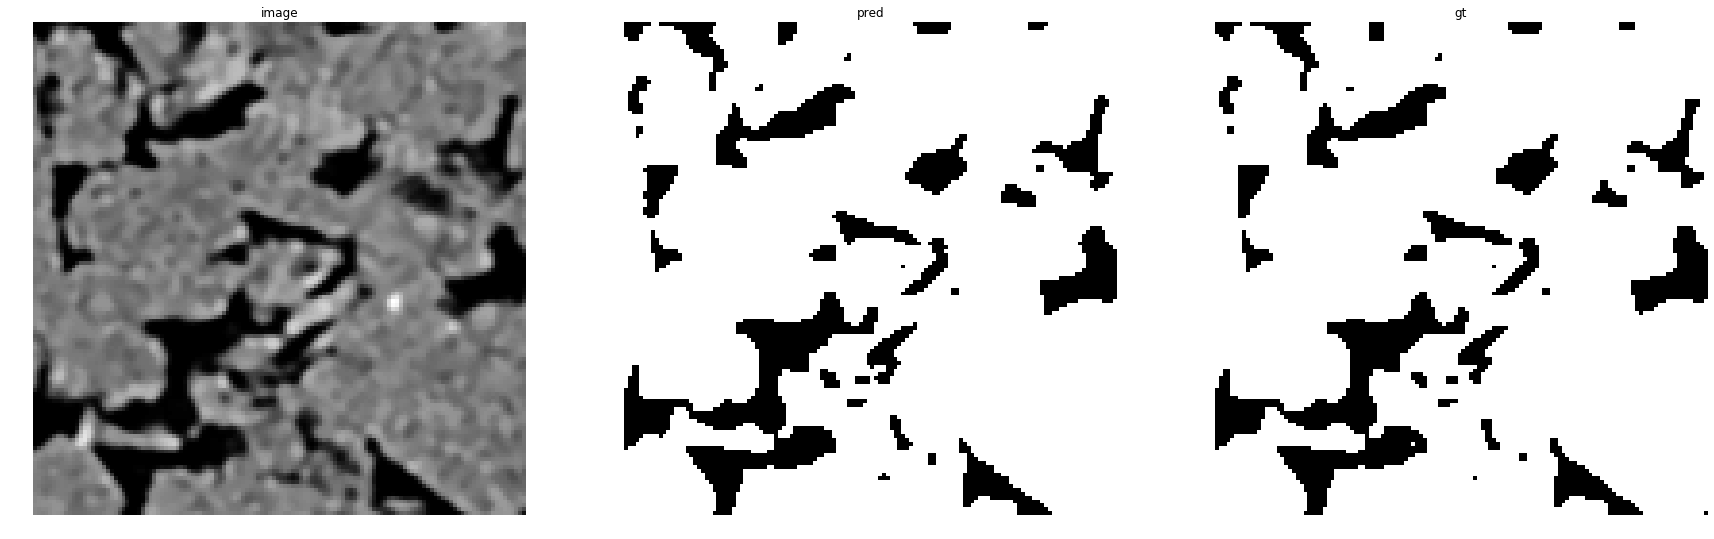

accuracy    : 0.9910888671875
precision   : 0.9968603971962616
recall      : 0.9925123582436755
f1          : 0.9946816261110301
pr_auc      : 0.9999195788742089
iou         : 0.9894195231538517


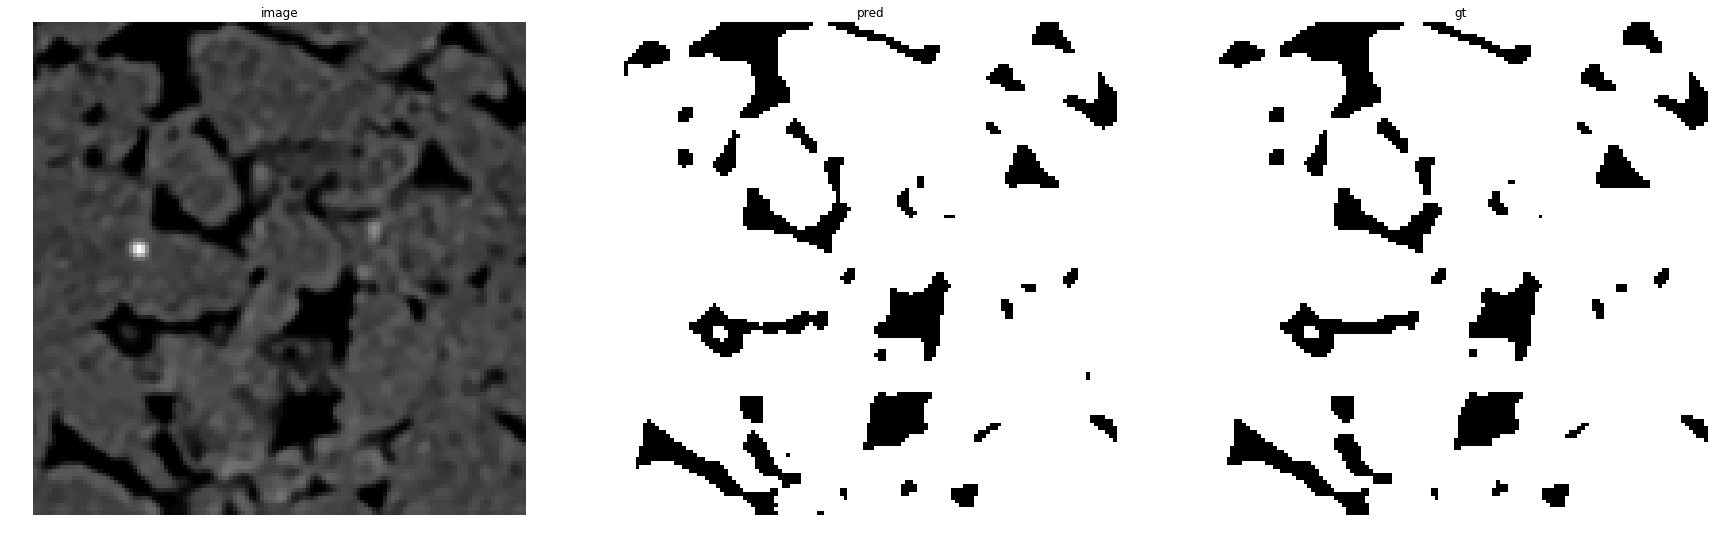

accuracy    : 0.9913330078125
precision   : 0.9953658194073866
recall      : 0.9946674150996352
f1          : 0.9950164947006387
pr_auc      : 0.9999352801084413
iou         : 0.9900824137449364


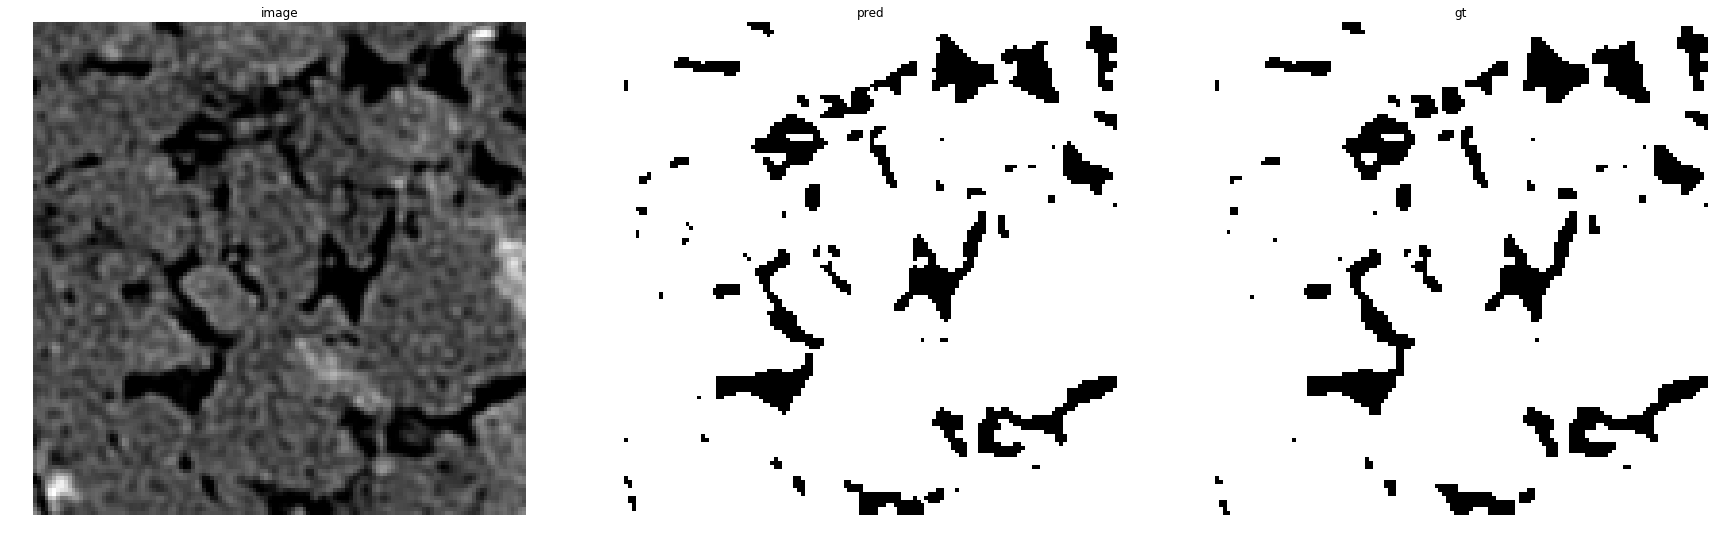

accuracy    : 0.98712158203125
precision   : 0.9914056002217909
recall      : 0.9939545549301647
f1          : 0.9926784413060827
pr_auc      : 0.9998396907535044
iou         : 0.9854633138132965


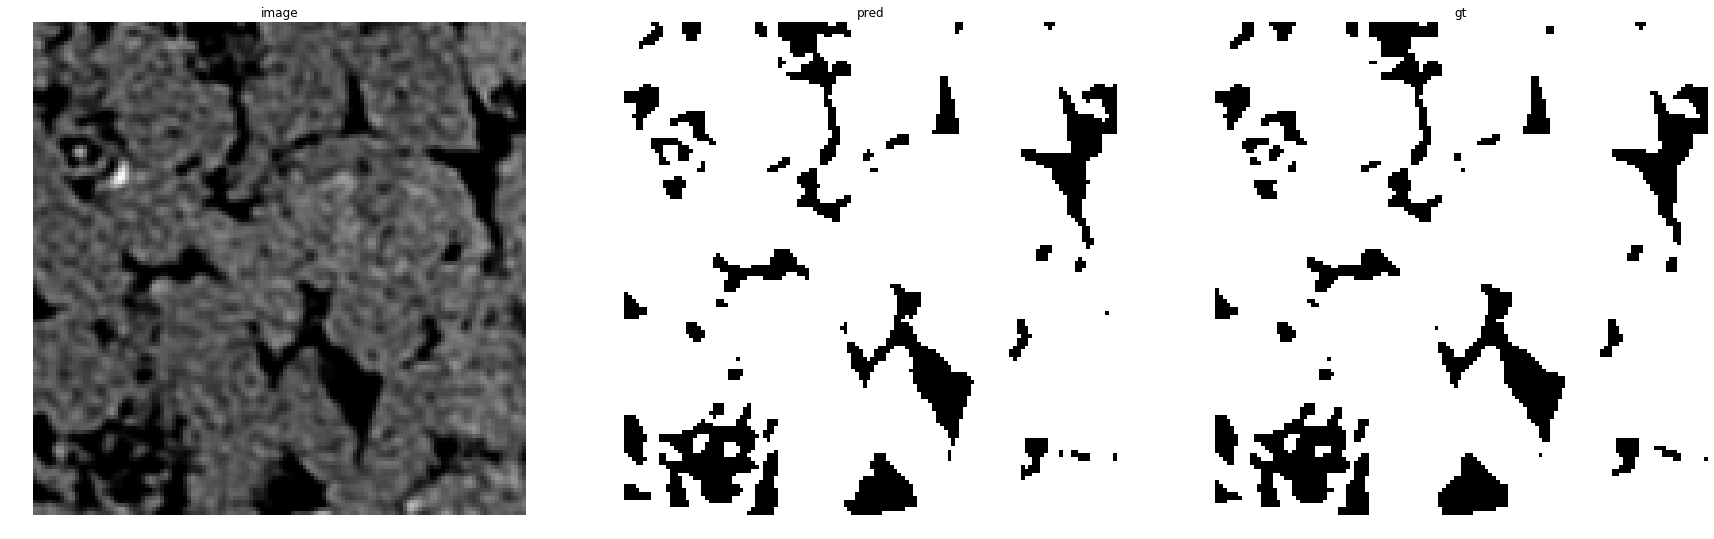

accuracy    : 0.9862060546875
precision   : 0.9903976100718401
recall      : 0.9935069568319658
f1          : 0.9919498468333688
pr_auc      : 0.9998030267868767
iou         : 0.9840282685512367


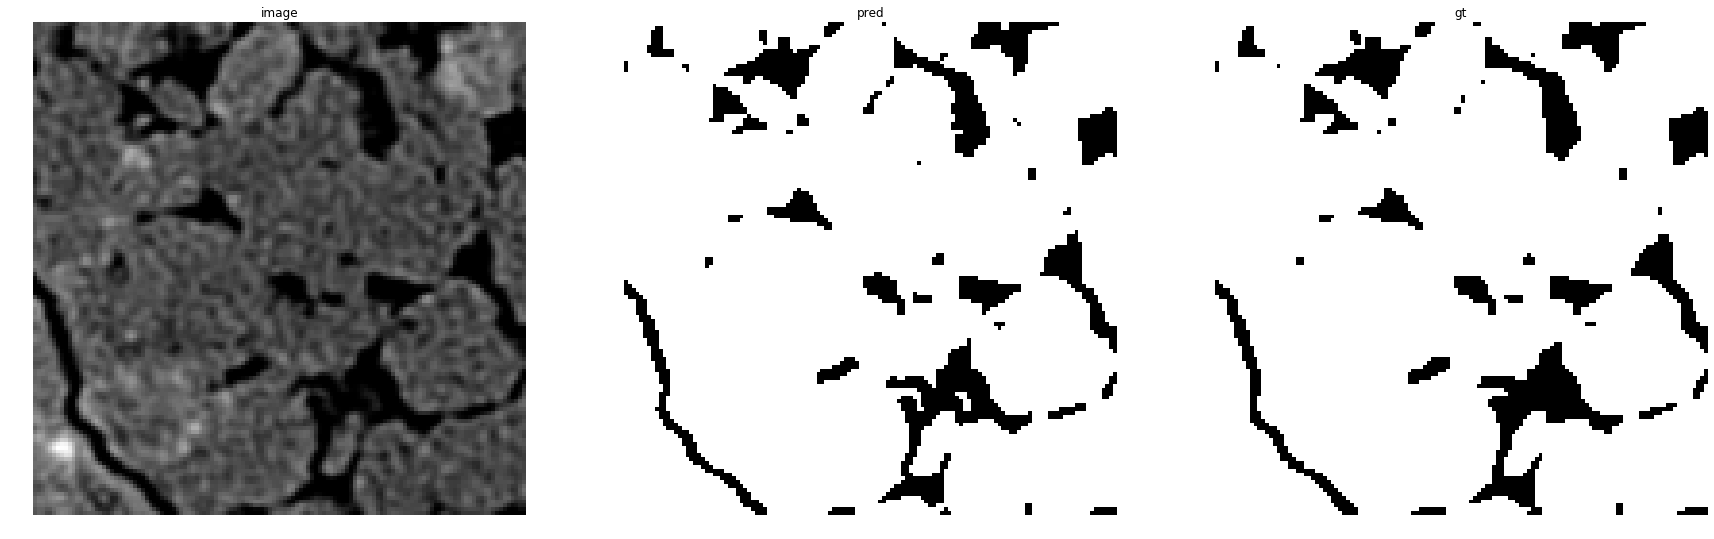

accuracy    : 0.98870849609375
precision   : 0.991500627002926
recall      : 0.9955928646379854
f1          : 0.9935425320255507
pr_auc      : 0.9998756884063565
iou         : 0.9871679267531387


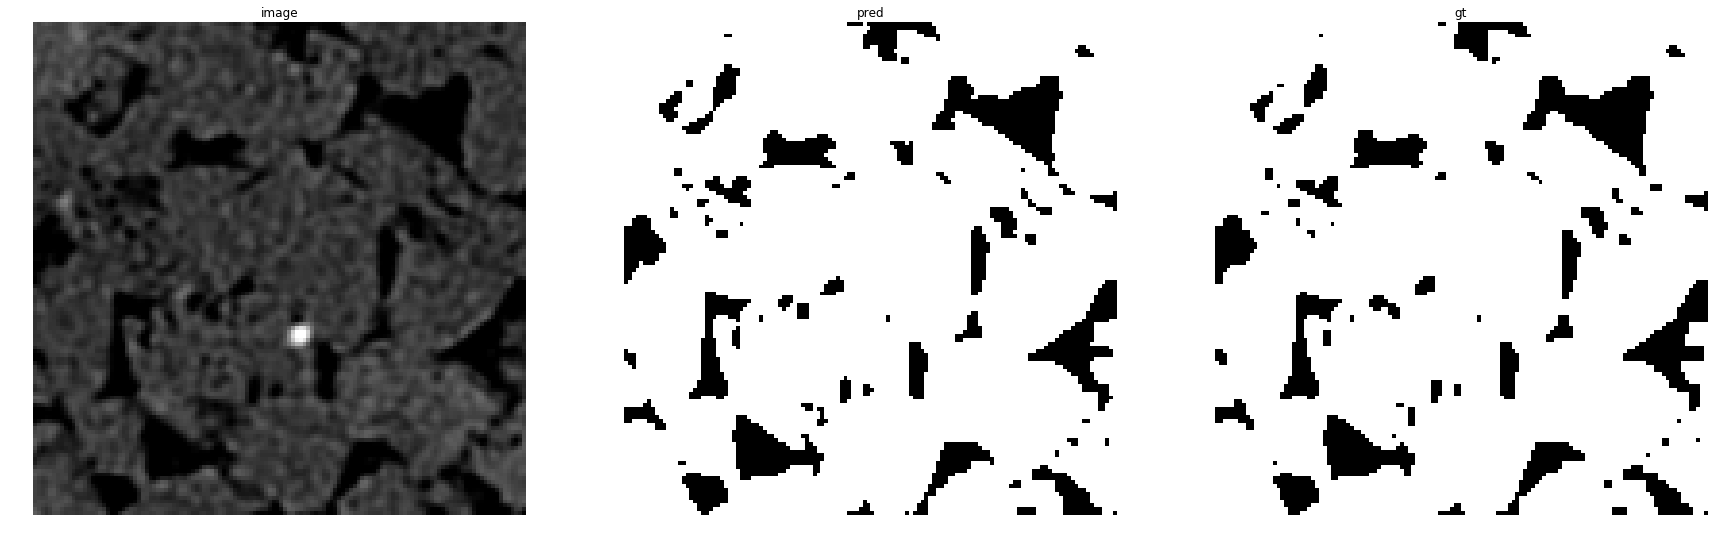

accuracy    : 0.9871826171875
precision   : 0.9930832857957786
recall      : 0.9919515669515669
f1          : 0.9925171037628278
pr_auc      : 0.9998282858763642
iou         : 0.9851453632312371


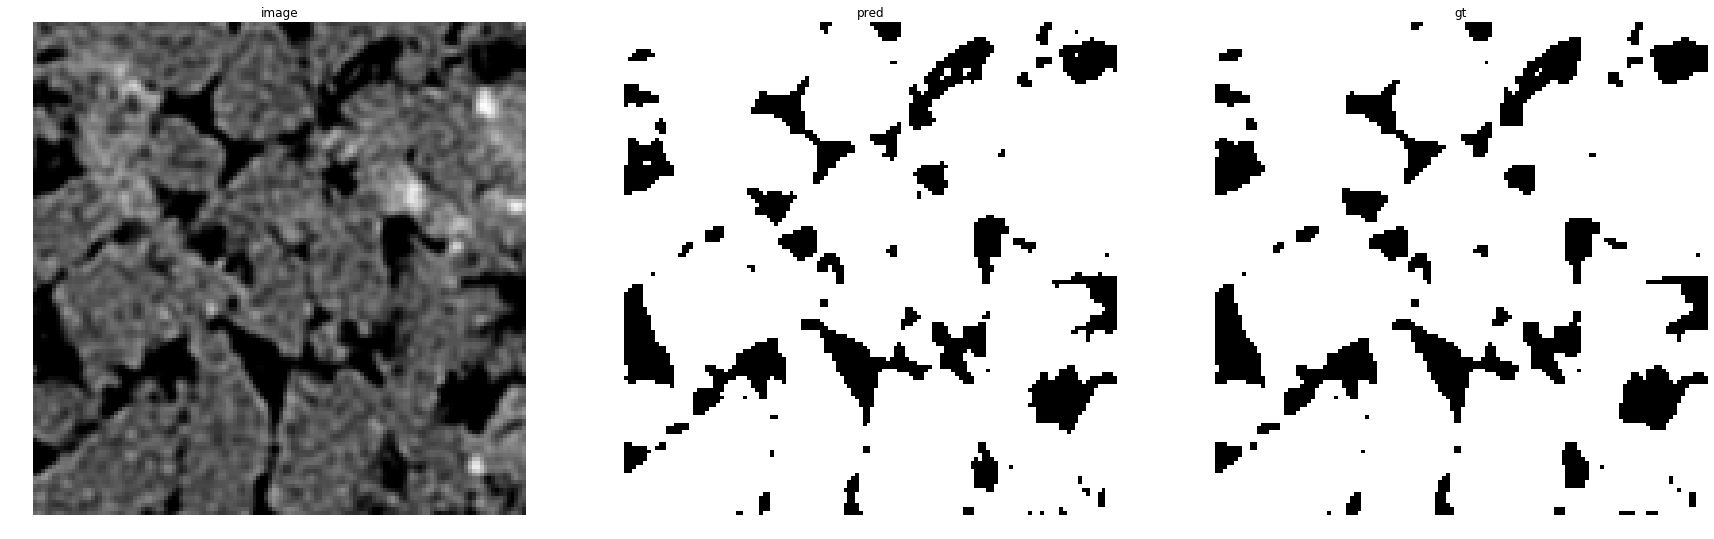

accuracy    : 0.98382568359375
precision   : 0.9886912050709501
recall      : 0.9921931473182015
f1          : 0.9904390807085903
pr_auc      : 0.9997598091445711
iou         : 0.9810592523765278


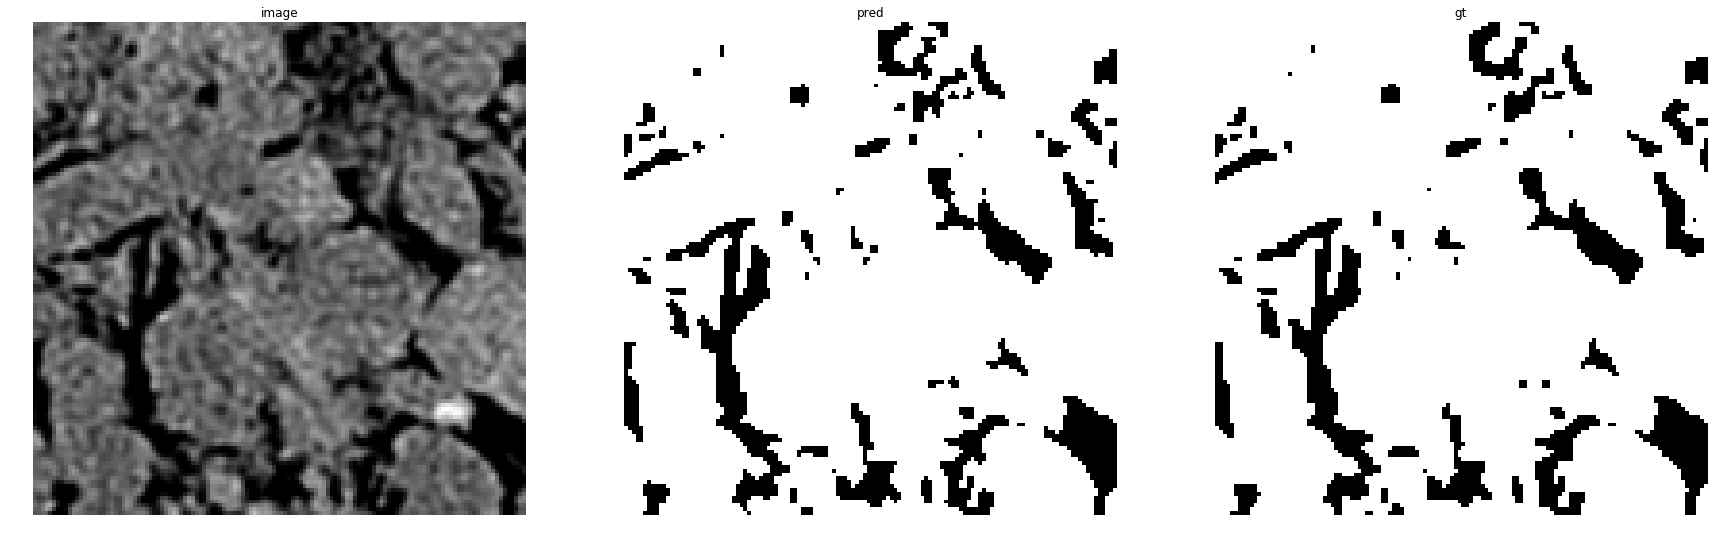

accuracy    : 0.98291015625
precision   : 0.989224912003448
recall      : 0.9906481548090066
f1          : 0.9899360218532096
pr_auc      : 0.9997042987353043
iou         : 0.9800725926980286


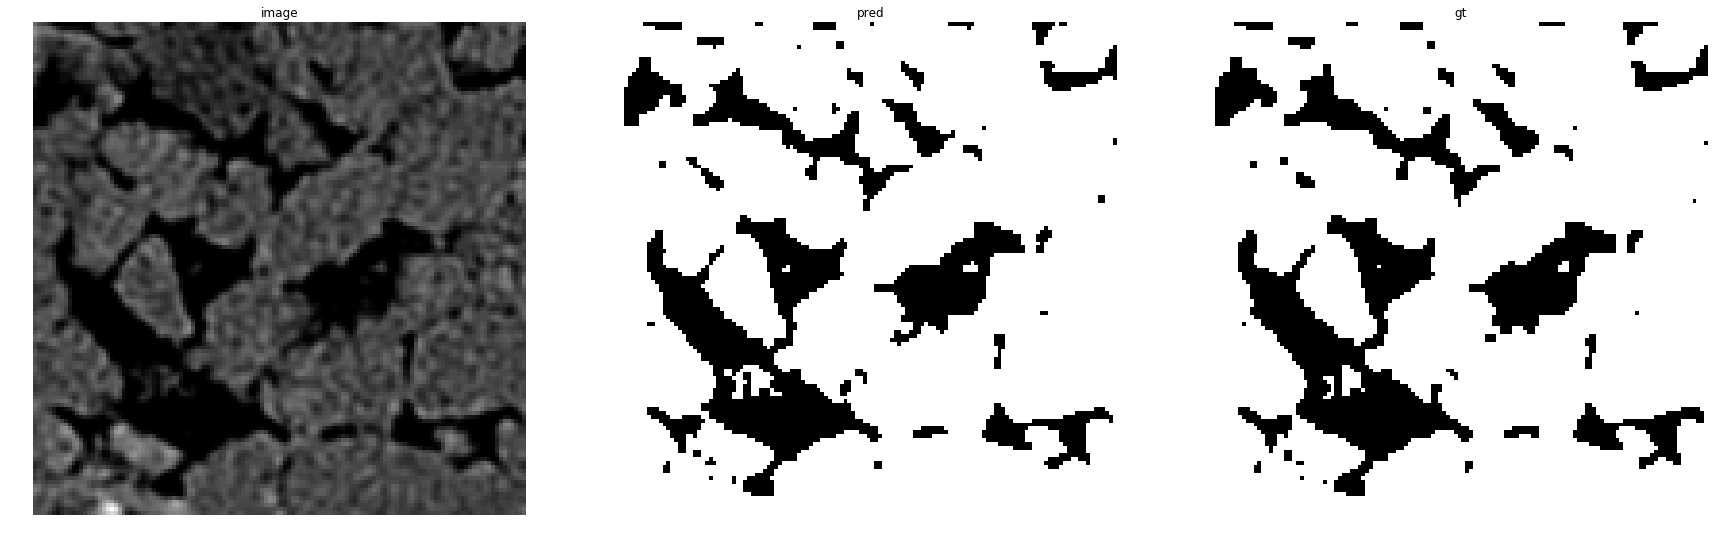

accuracy    : 0.983642578125
precision   : 0.9858204428268122
recall      : 0.9938082861947715
f1          : 0.9897982489531786
pr_auc      : 0.9997124811711603
iou         : 0.9798025472906775


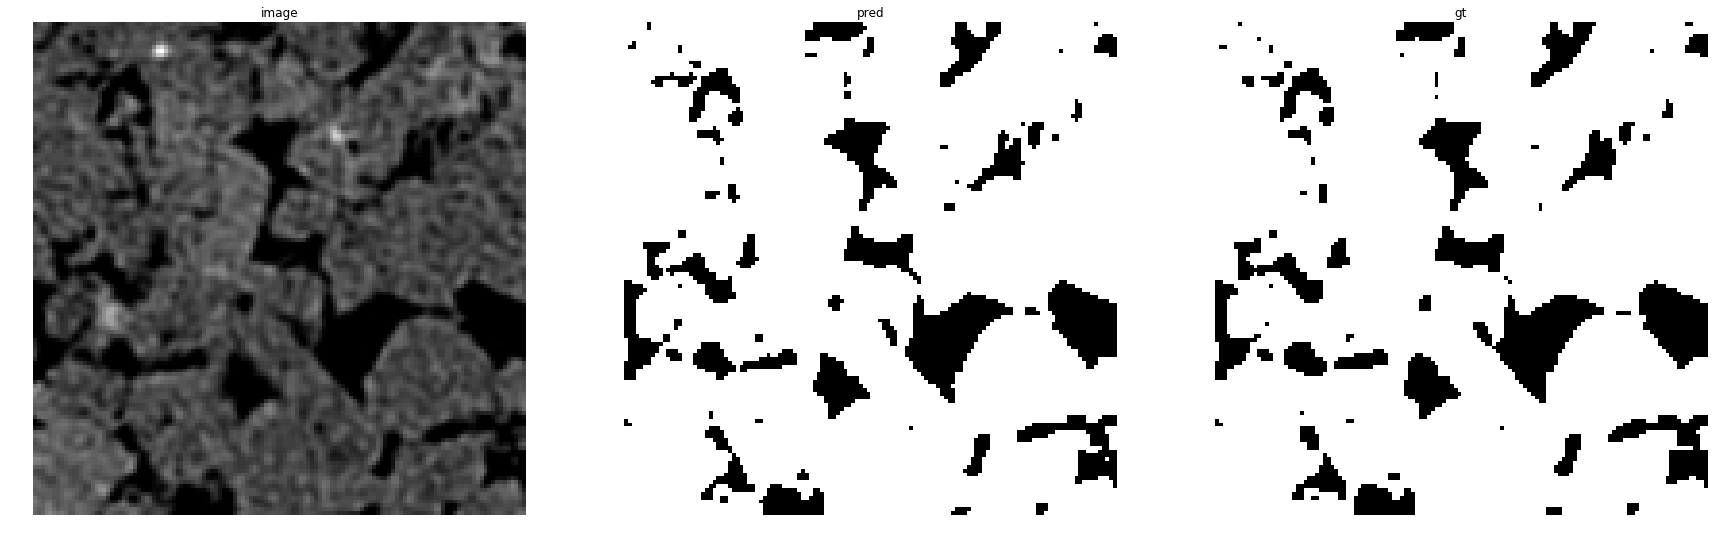

accuracy    : 0.9852294921875
precision   : 0.9893179357632623
recall      : 0.9931888993551192
f1          : 0.9912496384148105
pr_auc      : 0.9997705280443253
iou         : 0.9826510860993619


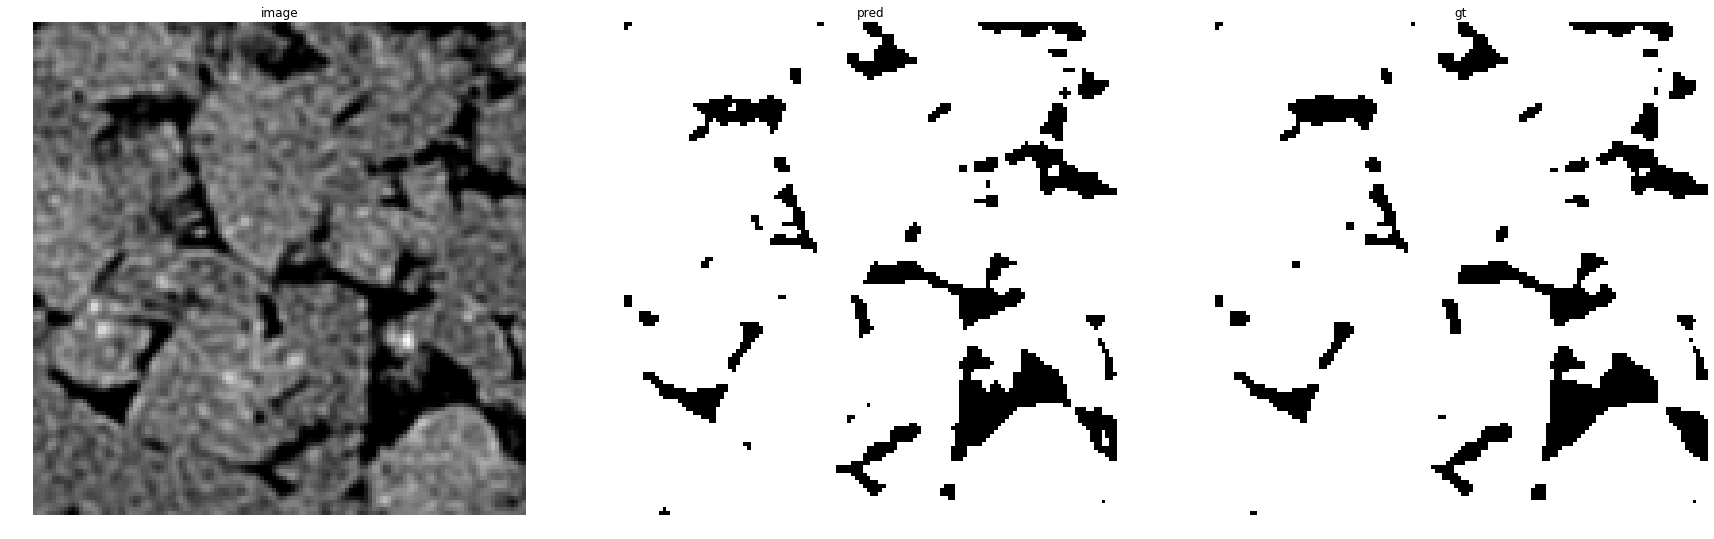

accuracy    : 0.98736572265625
precision   : 0.9930963065239903
recall      : 0.9926166160640353
f1          : 0.9928564033543845
pr_auc      : 0.9998737281173333
iou         : 0.9858141447368421


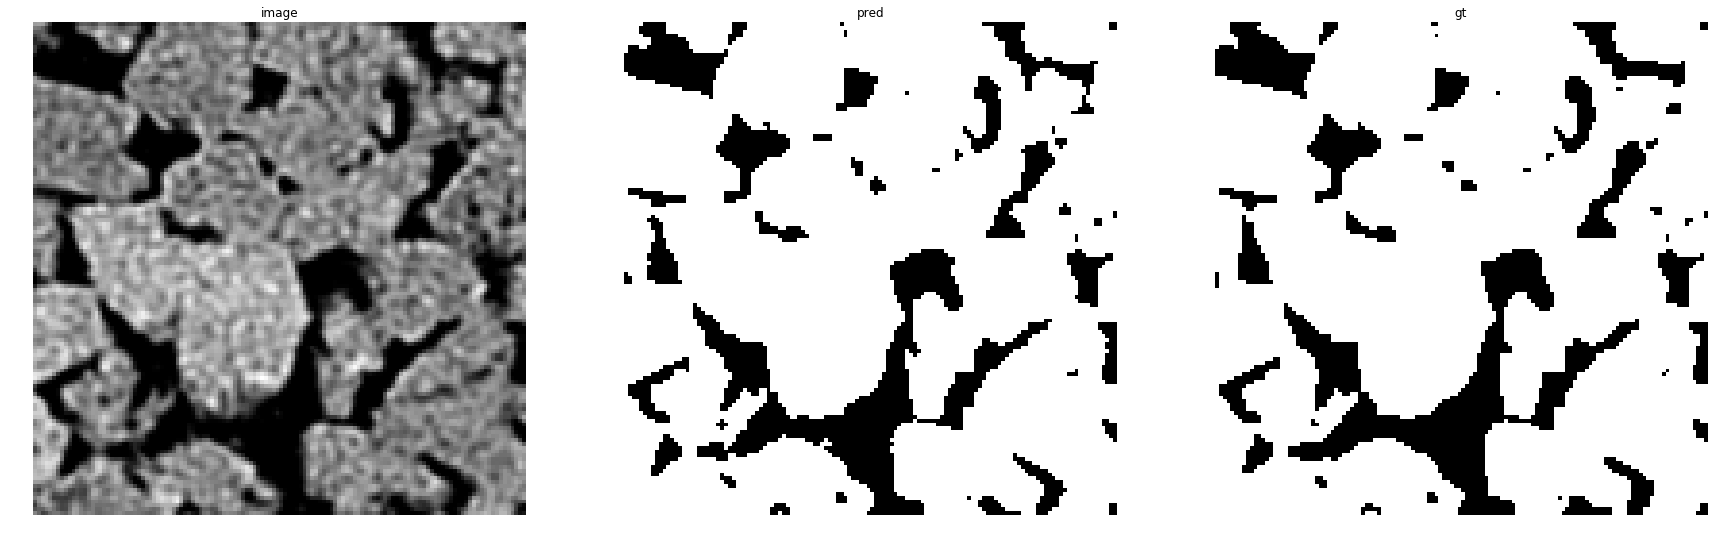

accuracy    : 0.9832763671875
precision   : 0.9853871648086773
recall      : 0.9939218963683331
f1          : 0.9896361298131477
pr_auc      : 0.999708033202021
iou         : 0.9794848757112908


In [32]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break